In [1]:
%%latex
\tableofcontents

<IPython.core.display.Latex object>

# Ambulance_Dispatch_2024_06_Analyze_Results

# Inputs

- The previous notebook build models and wrote the results in the "Big_Files" folder outside this repository
- The name of each results file looks like "BRFC_alpha_0_5_Hard_Run_0.csv"
- The results are four columns: 
    - Index (not really relevant)
    - y_test, the (binary) value of the target variable, HOSPITAL
        - 0 Didn't go to hospital
        - 1 Went to hospital
    - y_proba, the model's assessment, given the values of the other features in the sample, of the probability  in the real interval $y \in [0,1]$ that this person went to the hospital
    - y_pred, the model's prediction, using threshold $\theta = 0.5$, that this person went to the hospital.  This value is y_proba rounded.  (also not really relevant)
    
 |  | y_test | y_proba | y_pred |
 |---|---|---|---|
 | 0 | 0 | 0.17 | 0 |
 | 1 | 0 | 0.19 | 0 |
 | 2 | 0 | 0.44 | 0 |
 | 3 | 0 | 0.23 | 0 |
 | 4 | 0 | 0.25 | 0 |
 | 5 | 0 | 0.31 | 0 |
 | 6 | 0 | 0.35 | 0 |
 | 7 | 1 | 0.74 | 1 |
 | 8 | 0 | 0.13 | 0 |

# Understanding y_proba

- The y_proba value for a sample sounds like the probability that the sample belongs to the positive class, but alas, it is not.
- We have created a metric, Pos/(Neg + Pos), that calculates the probability in bands of y_proba.
- The y_proba values (generally) increase with the probability that the sample belongs to the positive class.  

# Outputs

## A Spreadsheet for each Model with Model Output in Bands
- The example table below is from BRFC_alpha_0_7_Hard_Run_0_1000_Slices.csv
    - Sorted by increasing y_proba
    - $\theta$ is the value of y_proba that we choose as the decision threshold, so we will use those two terms interchangeably.
    - Grouped into bands y_proba $\in$ [min, max] with at least one thousand samples from the negative class (HOSPITAL==0) and at least one thousand samples from the positive class (HOSPITAL==1).  Grouped from the bottom of the list with the top row perhaps having less than a thousand of each class.  
    - The choice of 1000 is rather arbitrary, but after trial and error we chose it to give detail while smoothing out the randomness of the distribution of negative and positive samples.
    - Having more than 1000 of both classes in a band indicates that more than one sample had the y_proba==min, because the grouping does not split samples with the same value.  If the min of one band is the max of the previous, that's due to rounding for this table.
    - min and max are the y_proba values at the ends of the band
    - Neg and Pos are the number of samples of the negative and positive clases in the band
    - Pos/(Neg+Pos) is one of our decision threshold metrics, the probability that a sample in this band is in the positive class.  If we set the decision threshold $\theta$ in this band of y_proba, we call this value the "marginal probability" or mProba, of a crash person needing an ambulance.
        - Bands 16-21 illustrate that mProb is not always an increasing function of $\theta$.  
        - At band 51, $\theta \in [0.77, 0.78)$, mProba = 50%, our target for this decision thresholds.
    - TN is the cumulative sum of Neg, and FN is the cumulative sum of Pos.
    - Precision = TP/(FP+TP) is another of our decision threshold metrics. 
        - Precision is the proportion of ambulances sent that are actually needed
        - Precision is not necessarily a nondecreasing function of $\theta$, but with the class imbalance, the distribution of the Neg towards y_proba==0 and Pos towards y_proba==1, and the large bands that smooth the distribution, precision is generally an increasing function of $\theta$.  
        - Index 54 is where Precision is closest to our target, Prec = 0.667.
        - This list has length 63 rows.  In index 62, FP and TP are zero, so Prec==NaN.  
    - Recall = TP/(FN+TP) = TP/P
        - Recall is the proportion of sent ambulances that are needed.
        - Recall is a nonincreasing function of $\theta$.
        - For each decision threshold metric, we will find the value of $\theta$ that gives the target value, then choose the model that give the highest recall.  
        - Choosing the highest recall is the same as choosing the highest TP, because N is the same in all of our models.
    - FP/P is the last of our decision threshold metrics. 
        - FP/P is the increase in number of ambulances sent if a locality implements immediate ambulance dispatch.
        - FP/P is a nonincreasing function of $\theta$.  
        - At Index 58, FP/P is closest to its target value, 0.05.  Setting $\theta$ there would cap the cost increase at 5%.
    - The length of this list is 63 rows.  
    
    
    | Index | min | max | Neg | Pos | Pos/(Neg+Pos) | TN | FP | FN | TP | Prec | Rec | FP/P	| 
    |---|---|---|---|---|---|---|---|---|---|---|---|---|
    | 0 | 0 | 0.0995 | 18729 | 156 | 0.0083 | 18729 | 657715 | 156 | 126100 | 0.1609 | 0.9988 | 5.2094 |
    | 1 | 0.1 | 0.1791 | 56799 | 1045 | 0.0181 | 75528 | 600916 | 1201 | 125055 | 0.1723 | 0.9905 | 4.7595 |
    | 2 | 0.18 | 0.2194 | 41326 | 1150 | 0.0271 | 116854 | 559590 | 2351 | 123905 | 0.1813 | 0.9814 | 4.4322 |
    | 3 | 0.22 | 0.2498 | 35354 | 1216 | 0.0333 | 152208 | 524236 | 3567 | 122689 | 0.1896 | 0.9717 | 4.1522 |
    | 4 | 0.25 | 0.2698 | 25635 | 1021 | 0.0383 | 177843 | 498601 | 4588 | 121668 | 0.1962 | 0.9637 | 3.9491 |
    | 5 | 0.27 | 0.2896 | 26768 | 1279 | 0.0456 | 204611 | 471833 | 5867 | 120389 | 0.2033 | 0.9535 | 3.7371 |
    | ... |  |  |  |  |  |  |  |  |  |  |  |  |
    | 16 | 0.42 | 0.4298 | 13318 | 1454 | 0.0984 | 399220 | 277224 | 20630 | 105626 | 0.2759 | 0.8366 | 2.1957 |
    | 17 | 0.43 | 0.44 | 13124 | 1579 | 0.1074 | 412344 | 264100 | 22209 | 104047 | 0.2826 | 0.8241 | 2.0918 |
    | 18 | 0.44 | 0.4498 | 13054 | 1540 | 0.1055 | 425398 | 251046 | 23749 | 102507 | 0.2899 | 0.8119 | 1.9884 |
    | 19 | 0.45 | 0.46 | 12661 | 1721 | 0.1197 | 438059 | 238385 | 25470 | 100786 | 0.2972 | 0.7983 | 1.8881 |
    | 20 | 0.46 | 0.4696 | 12252 | 1643 | 0.1182 | 450311 | 226133 | 27113 | 99143 | 0.3048 | 0.7853 | 1.7911 |
    | 21 | 0.47 | 0.4798 | 12181 | 1792 | 0.1282 | 462492 | 213952 | 28905 | 97351 | 0.3127 | 0.7711 | 1.6946 |
    | ... |  |  |  |  |  |  |  |  |  |  |  |  |
    | 50 | 0.76 | 0.7698 | 2364 | 2289 | 0.4919 | 656972 | 19472 | 94826 | 31430 | 0.6175 | 0.2489 | 0.1542 |
    | 51 | 0.77 | 0.78 | 2307 | 2372 | 0.5069 | 659279 | 17165 | 97198 | 29058 | 0.6286 | 0.2302 | 0.136 |
    | 52 | 0.78 | 0.7898 | 2072 | 2210 | 0.5161 | 661351 | 15093 | 99408 | 26848 | 0.6401 | 0.2126 | 0.1195 |    
    | ... |  |  |  |  |  |  |  |  |  |  |  |  |
    | 54 | 0.8 | 0.8099 | 1802 | 2157 | 0.5448 | 665048 | 11396 | 103790 | 22466 | 0.6635 | 0.1779 | 0.0903 |
    | 55 | 0.81 | 0.8198 | 1626 | 2170 | 0.5717 | 666674 | 9770 | 105960 | 20296 | 0.675 | 0.1608 | 0.0774 |
    | ... |  |  |  |  |  |  |  |  |  |  |  |  |
    | 56 | 0.82 | 0.8298 | 1429 | 2045 | 0.5887 | 668103 | 8341 | 108005 | 18251 | 0.6863 | 0.1446 | 0.0661 |
    | 57 | 0.83 | 0.8398 | 1362 | 1975 | 0.5918 | 669465 | 6979 | 109980 | 16276 | 0.6999 | 0.1289 | 0.0553 |
    | 58 | 0.84 | 0.8495 | 1165 | 1929 | 0.6235 | 670630 | 5814 | 111909 | 14347 | 0.7116 | 0.1136 | 0.046 |
    | 59 | 0.85 | 0.8696 | 1959 | 3571 | 0.6458 | 672589 | 3855 | 115480 | 10776 | 0.7365 | 0.0854 | 0.0305 |
    | 60 | 0.87 | 0.889 | 1462 | 2940 | 0.6679 | 674051 | 2393 | 118420 | 7836 | 0.7661 | 0.0621 | 0.019 |
    | 61 | 0.89 | 0.9199 | 1388 | 3566 | 0.7198 | 675439 | 1005 | 121986 | 4270 | 0.8095 | 0.0338 | 0.008 |
    | 62 | 0.92 | 1 | 1005 | 4270 | 0.8095 | 676444 | 0 | 126256 | 0 | nan | 0 | 0 |

    <br><br>
- The table below is from LogReg_alpha_balanced_Medium_Run_0_1000_Slices.csv.
    - Note that the last row has FP=0 and TP=0, because we're not sending any ambulances, so Precision is NaN.
    - Precision is a generally increasing function of the decision threshold $\theta$, so the next to last row gives the maximum value of Prec = 0.5667, telling us that, with this model algorithm with these hyperparameters on the Medium features, there is no decision threshold where the target of Prec = 0.667 is achieved.
    - If we cut it into smaller bands, we might get a band with Prec $\approx$ 0.667, but the model would immediately dispatch so few ambulances that the benefit would not be worth the project overhead.

| Index | min | max | Neg | Pos | Pos/(Neg+Pos) | TN | FP | FN | TP | Prec | Rec | FP/P	| 
|---|---|---|---|---|---|---|---|---|---|---|---|---|
| 0 | 0.0397 | 0.1794 | 24475 | 773 | 0.0306 | 24475 | 651969 | 773 | 125483 | 0.1614 | 0.9939 | 5.1639 |
| 1 | 0.1794 | 0.2167 | 23510 | 1000 | 0.0408 | 47985 | 628459 | 1773 | 124483 | 0.1653 | 0.986 | 4.9777 |
| 2 | 0.2167 | 0.24 | 18987 | 1000 | 0.05 | 66972 | 609472 | 2773 | 123483 | 0.1685 | 0.978 | 4.8273 |
| ... |||||||||||||
| 123 | 0.8777 | 0.8893 | 1000 | 1038 | 0.5093 | 674444 | 2000 | 123816 | 2440 | 0.5495 | 0.0193 | 0.0158 |
| 124 | 0.8893 | 0.9057 | 1000 | 1132 | 0.531 | 675444 | 1000 | 124948 | 1308 | 0.5667 | 0.0104 | 0.0079 |
| 125 | 0.9057 | 0.9606 | 1000 | 1308 | 0.5667 | 676444 | 0 | 126256 | 0 | nan | 0 | 0 |

## One Spreadsheet for each Decision Threshold Metric
- The table below is from ../Analyze_Proba/Run_0/Prec_0_667.csv
    - One row for each model, showing the decision threshold $\theta$ where the model gets the decision metric closest to the target.
    - It has been filtered (outside this notebook; we did it in Excel) to only show rows whose Prec is within 0.02 of 0.667, because many models fail to even get close to the target value of the decision threshold metric.  See at the bottom of the table the Logistic Regression model on the Medium feature set that only got to Prec = 0.531; that model would send no ambulances.
    - It was then sorted by decreasing recall, Rec = TP/(TP+FN) = TP/P, which is the same as decreasing TP because P is the same in all of these models
    - The first row shows that for the Balanced Random Forest Classifier with $\alpha = 0.7$ on the Hard features, for y_pred $\in [0.8, 0.8099]$, there were 1.802 negative samples (y_test==0) and 2,157 positive samples (y_test==1).
    - If we put the decision threshold here around 0.8, we will 
        - Correctly not send ambulances to 665,048 people who do no need them (TN), 
        - Incorrectly send ambulances to 11,396 people who do not need them (FP), 
        - Incorrectly not immediately send ambulances to 103,790 people who need them (FN), but will send the ambulance later after an eyewitness report, 
        - Correctly immediately send ambulances to 22,466 people who need them (TP)

        Index | len | Filename | min | max | Neg | Pos | Pos/(Neg+Pos) | TN | FP | FN | TP | Prec | Rec | FP/P	| 
        |---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
        | 54 | 63 | BRFC_alpha_0_7_Hard_Run_0 | 0.8 | 0.8099 | 1,802 | 2,157 | 0.5448 | 665,048 | 11,396 | 103,790 | 22,466 | 0.6635 | 0.1779 | 0.0903 |
        | 53 | 62 | BRFC_alpha_0_5_Hard_Run_0 | 0.8 | 0.8097 | 1,778 | 2,251 | 0.5587 | 665,260 | 11,184 | 104,033 | 22,223 | 0.6652 | 0.176 | 0.0886 |
        | 55 | 64 | BRFC_alpha_0_9_Hard_Run_0 | 0.8 | 0.8099 | 1,760 | 2,079 | 0.5415 | 665,328 | 11,116 | 104,539 | 21,717 | 0.6614 | 0.172 | 0.088 |
        | 55 | 64 | BRFC_alpha_balanced_Hard_Run_0 | 0.81 | 0.8199 | 1,685 | 2,203 | 0.5666 | 666,074 | 10,370 | 105,504 | 20,752 | 0.6668 | 0.1644 | 0.0821 |
        | 54 | 63 | BRFC_alpha_0_6_Hard_Run_0 | 0.81 | 0.82 | 1,696 | 2,169 | 0.5612 | 666,442 | 10,002 | 105,693 | 20,563 | 0.6728 | 0.1629 | 0.0792 |
        | 56 | 65 | BRFC_alpha_0_85_Hard_Run_0 | 0.81 | 0.82 | 1,607 | 2,202 | 0.5781 | 666,215 | 10,229 | 105,732 | 20,524 | 0.6674 | 0.1626 | 0.081 |
        | 56 | 64 | BRFC_alpha_0_95_Hard_Run_0 | 0.81 | 0.8199 | 1,633 | 2,115 | 0.5643 | 666,391 | 10,053 | 106,101 | 20,155 | 0.6672 | 0.1596 | 0.0796 |
        | ... | ||||||||||||||
        | 124 | 126 | LogReg_alpha_balanced_Medium_Run_0 | 0.8893 | 0.9057 | 1,000 | 1,132 | 0.531 | 675,444 | 1,000 | 124,948 | 1,308 | 0.5667 | 0.0104 | 0.0079 |![image-4.png](attachment:image-4.png)
        <br>
        - At this decision threshold, 
        $$\text{Precision} = \frac{\text{TP}}{\text{TP}+\text{FP}} = \frac{22,466}{11,396 + 22,466} = 0.6635$$
        <br>
        - In this interval, the marginal probability that a crash person goes to the hospital is Pos/(Neg+Pos) = 0.8099 = 81%, so if marginal probability were our decision threshold metric with a target of 50%, we would choose a lower decision threshold.  A different spreadsheet, mProb_0_5.csv, gives for each model the decision threshold $\theta$ where mProb is closest to 0.5.
        - In this interval, the increase in ambulance runs is 0.0903 or 9%. If capping the cost increase at 5% were our goal, we would choose a higher decision threshold.  The spreadsheet FP_P_0_05.csv gives for each model the decision threshold where FP/P is closest to 0.05.


## A Spreadsheet of ROC AUC of each Model
- ROC_AUC.csv
- The Area Under the Curve of the Receiver Operating Characteristic is a common way to measure how well the model has separated the positive and negative classes over the entire interval y_proba $\in$ [0,1].

| Filename | ROC_AUC |
|---|---|
| BRFC_alpha_0_5_Hard_Run_0 | 0.80416 |
| BRFC_alpha_0_5_Medium_Run_0 | 0.731991 |
| BRFC_alpha_0_5_Easy_Run_0 | 0.659317 |
|...|...|
| BRFC_alpha_balanced_Hard_Run_0 | 0.804689 |
| BRFC_alpha_balanced_Medium_Run_0 | 0.730274 |
| BRFC_alpha_balanced_Easy_Run_0 | 0.640688 |
| EEC_Hard_Run_0 | 0.696535 |
| EEC_Medium_Run_0 | 0.676361 |
| EEC_Easy_Run_0 | 0.642414 |
| KBFC_alpha_0_5_gamma_0_0_Hard_Run_0 | 0.777131 |
| KBFC_alpha_0_5_gamma_0_0_Medium_Run_0 | 0.710634 |
| KBFC_alpha_0_5_gamma_0_0_Easy_Run_0 | 0.656663 |
|...|...|


## A Spreadsheet of Number of Unique Values in FPR and TPR
- The metrics False Positive Rate and True Positive Rate are the $x$- and $y$-values, respectively, on the ROC curve.  
- This spreadsheet checks the granularity of the data going into the ROC graph and the calculation of the area under the curve.  
- Note the severe disparity between the 287,423 unique pairs of (fpr, tpr) in one model and only 121 in another.
- This information tells us that when we give the AUC ROC of a model, we must be careful about how much accuracy we can claim, and when we compare the AUC ROC of different models, "close" is "the same within the accuracy of measurement."

| Filename | len(y_proba) | nUnique(y_proba) | len(fpr) | nUnique(fpr) | len(tpr) | nUnique(tpr) | len(fpr tpr) | nUnique(fpr tpr) |
|---|---|---|---|---|---|---|---|---|
| BRFC_alpha_0_5_Hard_Run_0 | 802,700 | 3,304 | 2,773 | 2,380 | 2,773 | 1,445 | 2,773 | 2,773 |
| BRFC_alpha_0_5_Medium_Run_0 | 802,700 | 40,636 | 32,145 | 28,721 | 32,145 | 13,776 | 32,145 | 32,145 |
| BRFC_alpha_0_5_Easy_Run_0 | 802,700 | 164,126 | 144,660 | 132,449 | 144,660 | 64,668 | 144,660 | 144,660 |
| EEC_Hard_Run_0 | 802,700 | 1,265 | 1,248 | 1,241 | 1,248 | 915 | 1,248 | 1,248 |
| EEC_Medium_Run_0 | 802,700 | 1,430 | 1,422 | 1,387 | 1,422 | 1,244 | 1,422 | 1,422 |
| EEC_Easy_Run_0 | 802,700 | 120 | 121 | 121 | 121 | 121 | 121 | 121 |
| KBFC_alpha_0_5_gamma_2_0_Hard_Run_0 | 802,700 | 763,738 | 225,027 | 141,371 | 225,027 | 91,270 | 225,027 | 225,027 |
| KBFC_alpha_0_5_gamma_2_0_Medium_Run_0 | 802,700 | 703,317 | 287,423 | 205,851 | 287,423 | 99,493 | 287,423 | 287,423 |
| KBFC_alpha_0_5_gamma_2_0_Easy_Run_0 | 802,700 | 175,484 | 151,887 | 138,127 | 151,887 | 65,516 | 151,887 | 151,887 |
| BalBag_Hard_Run_0 | 802,700 | 232 | 217 | 199 | 217 | 139 | 217 | 217 |
| BalBag_Medium_Run_0 | 802,700 | 2,507 | 2,249 | 2,084 | 2,249 | 1,176 | 2,249 | 2,249 |
| BalBag_Easy_Run_0 | 802,700 | 56,388 | 54,977 | 53,220 | 54,977 | 36,490 | 54,977 | 54,977 |

## A Spreadsheet of Value Counts of y_proba in each Model
- The sample below only shows a few of the rows and a few of the columns, which also have 95%, 80%, B[20], B[200], and the numbers as proportions of n.
- How to read the sample:  For each model, 
    - Number of samples (all 802,700)
    - Number of unique values of y_proba
    - 90% of the set can be how few unique values?
    - The sum of the value counts of the ten most common values
    - The sum of the value counts of the hundred most common values
    - The min and max values of y_proba
| Filename | n | nUnique | 90% | B[10] | B[100] | min | max |
|---|---|---|---|---|---|---|---|
| BRFC_alpha_0_5_Hard_Run_0 | 802,700 | 3,304 | 74 | 156,568 | 761,777 | 0 | 1 |
| BRFC_alpha_0_5_Medium_Run_0 | 802,700 | 40,636 | 4534 | 52,940 | 313,930 | 0 | 1 |
| BRFC_alpha_0_5_Easy_Run_0 | 802,700 | 164,126 | 95649 | 7,512 | 20,605 | 0 | 1 |
| EEC_Hard_Run_0 | 802,700 | 1,265 | 274 | 188,139 | 557,236 | 0.4064 | 0.5366 |
| EEC_Medium_Run_0 | 802,700 | 1,430 | 261 | 181,646 | 590,940 | 0.4603 | 0.5582 |
| EEC_Easy_Run_0 | 802,700 | 120 | 54 | 279,933 | 796,193 | 0.469 | 0.5363 |
| KBFC_alpha_0_5_gamma_0_0_Hard_Run_0 | 802,700 | 781,300 | 701030 | 105 | 414 | 0.0001 | 0.9741 |
| KBFC_alpha_0_5_gamma_0_0_Medium_Run_0 | 802,700 | 727,334 | 647064 | 127 | 701 | 0.0013 | 0.9326 |
| KBFC_alpha_0_5_gamma_0_0_Easy_Run_0 | 802,700 | 177,660 | 103156 | 2,176 | 14,856 | 0.0096 | 0.6521 |
| RUSBoost_Hard_Run_0 | 802,700 | 797,100 | 716830 | 99 | 386 | 0.4984 | 0.5013 |
| RUSBoost_Medium_Run_0 | 802,700 | 746,852 | 666582 | 131 | 722 | 0.4992 | 0.5008 |
| RUSBoost_Easy_Run_0 | 802,700 | 178,670 | 103945 | 2,177 | 14,830 | 0.4995 | 0.5005 |
| BalBag_Hard_Run_0 | 802,700 | 232 | 8 | 796,774 | 802,454 | 0 | 1 |
| BalBag_Medium_Run_0 | 802,700 | 2,507 | 23 | 653,178 | 780,153 | 0 | 1 |
| BalBag_Easy_Run_0 | 802,700 | 56,388 | 30332 | 67,762 | 126,464 | 0 | 1 |

<br><br>
- Note the wide disparities between models.  
    - RUSBoost_Hard has 797,100 different values of y_proba $\in$ [0.4984,0.5013]
    - BalBag_Hard has y_proba ranging from 0 to 1, but eight values account for 90% of the set.  In BalBag_Hard, almost all of the y_proba values are rounded to one decimal place.

## Images
- The code automatically generates these eight images for each of the models.  
- All images come in two versions:
    - .png, an image file
    - .pgf, a TikZ file that inputs seamlessly into LaTeX.  

### Histogram of the $p$ values for the negative (white) and positive (black) samples with 11 bars for each
- Model name + '_Pred.png' and '_Pred.pgf'
- This example is the RUSBoost_Hard_Run_0 model that only gives $p$ values in a tight range.  We have chosen it to illustrate the utility of the `Zoom' images later.


- BRFC_alpha_0_5_Hard_Run_0_Pred_Zoom.png
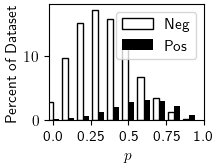


- RUSBoost_Hard_Run_0_Pred.png
- The RUSBoost model on the Hard features only gives $p$ values in a tight range.  We have chosen it to illustrate the utility of the `Zoom' images later.

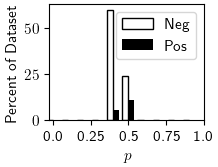

### Histogram, wider, with 21 bars for each.
- Model name + '_Pred_Wide.png' and '_Pred_Wide.pgf'
- BRFC_alpha_0_5_Hard_Run_0_Pred_Wide.png
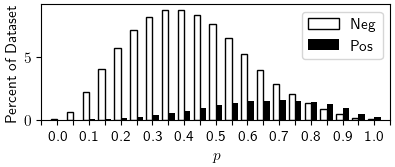



- RUSBoost_Hard_Run_0_Pred_Wide.png
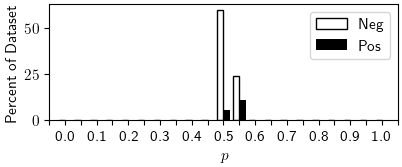

### Histogram Zoomed in from min to max $p$
- Model name + '_Pred_Wide_Zoom.png' or '.pgf'
- The code automatically chooses the number of significant digits based on the range from min to max.

- RUSBoost_Hard_Run_0_Pred_Zoom_Wide.png

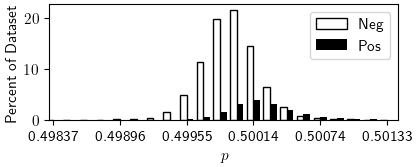

### Legend at the Top
- Model name + '_Pred_Zoom_Legend_Top.png' or '.pgf'

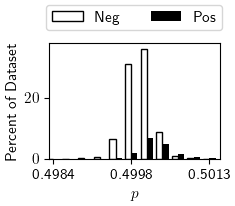

### Medium Width
- Model name + '_Pred_Zoom_Medium.png' or '.pgf'

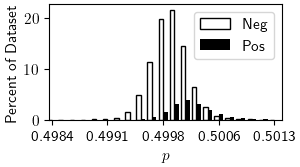

### Wide, Right Half of Range
- The right half of the range is the one relevant to our work
- Model name + '_Pred_Zoom_Wide_Right.png' or '.pgf'

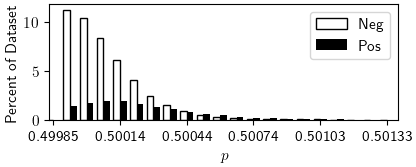

### ROC Curve
- Model name + '_ROC.png' or '.pgf'

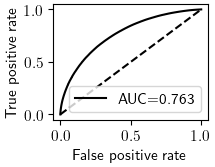

### ROC Curve, Legend on Top
- Model name + 'ROC_Legend_Top.png' or '.pgf'

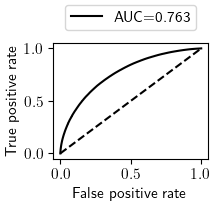

## Threshold Images
- At the end of this notebook are separate functions that pull in a model and create images showing the histogram with different decision thresholds.
- It is set to put the images in a folder we used for writing a paper, but you can modify that.
- CRSS_05_BRFC_alpha_0_5_0_0_0_0_Hard_Pred_Wide_Threshold_50.png
- The spacing in the .png is not quite the same as in the .pgf.  We calibrated it for the .pgf.

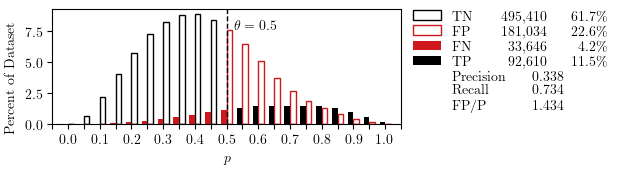

- CRSS_05_BRFC_alpha_0_5_0_0_0_0_Hard_Pred_Wide_Threshold_70.png
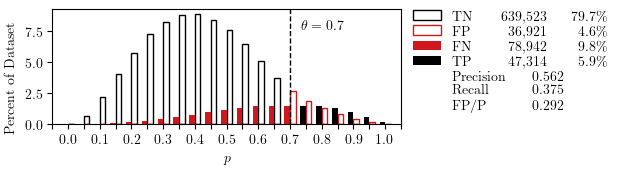

# Setup

## Import Libraries

In [2]:
print ('Install Packages')

# gc is "garbage collector"
import sys, copy, math, time, os, gc

print ('Python version: {}'.format(sys.version))

#from collections import Counter

import numpy as np
print ('NumPy version: {}'.format(np.__version__))
np.set_printoptions(suppress=True)

import scipy as sc
print ('SciPy version:  {}'.format(sc.__version__))

import tensorflow as tf
print ('TensorFlow version:  {}'.format(tf.__version__))
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

from tensorflow import keras
print ('Keras version:  {}'.format(keras.__version__))

from keras import layers
import keras.backend as K
#from keras.layers import IntegerLookup
#from keras.layers import Normalization
#from keras.layers import StringLookup
#from keras.utils import get_custom_objects
#from keras.utils import tf_utils

from keras.models import Sequential
from keras.layers import Dense

#from keras.wrappers.scikit_learn import KerasClassifier
import scikeras
print ('scikeras version:  {}'.format(scikeras.__version__))
from scikeras.wrappers import KerasClassifier

import pandas as pd
print ('Pandas version:  {}'.format(pd.__version__))
pd.set_option('display.max_rows', 500)

# We had to downgrade to Matplotlib version 3.7.1 
# because newer versions were incompatible with the version of pgf we had in our TeX installation.
import matplotlib
print ('Matplotlib version:  {}'.format(matplotlib.__version__))
matplotlib.use("pgf")
matplotlib.rcParams.update({
#    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'font.size': 10,
})

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
print ('SciKit-Learn version: {}'.format(sklearn.__version__))
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
#from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

import imblearn
print ('Imbalanced-Learn version: {}'.format(imblearn.__version__))
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier

#!pip install pydot

# Set Randomness.  Copied from https://www.kaggle.com/code/abazdyrev/keras-nn-focal-loss-experiments
import random
random_seed = 0
print ('random_seed = %d' % random_seed)
random.seed(random_seed) # Python
np.random.seed(random_seed) # NumPy
#tf.random.set_seed(42) # Tensorflow

import warnings
warnings.filterwarnings('ignore')

print ('Finished Installing Packages')

Install Packages
Python version: 3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:51:49) [Clang 16.0.6 ]
NumPy version: 1.26.4
SciPy version:  1.13.1
TensorFlow version:  2.16.2
Keras version:  3.4.1
scikeras version:  0.13.0
Pandas version:  2.2.2
Matplotlib version:  3.7.1
SciKit-Learn version: 1.5.0
Imbalanced-Learn version: 0.12.3
random_seed = 0
Finished Installing Packages


In [3]:
def Chart_and_Plots(y_test, y_proba, y_pred, filename, run, title):
    print ('Charts_and_Plots() for ', filename)
    
    Analyze_Prediction(y_test, y_proba, filename, run, title)
    
    Plot_Prediction(y_test, y_proba, filename, run, title)
    Plot_Prediction_Wide(y_test, y_proba, filename, run, title)
#    print ("type(y_proba): ", type(y_proba))
    left = min(y_proba)
    right = max(y_proba)
#    print (left, right)
    Plot_Prediction_Zoom(y_test, y_proba, filename, run, title, left, right)
    Plot_Prediction_Zoom_Legend_Top(y_test, y_proba, filename, run, title, left, right)
    Plot_Prediction_Zoom_Medium(y_test, y_proba, filename, run, title, left, right)
    Plot_Prediction_Zoom_Wide(y_test, y_proba, filename, run, title, left, right)
    Plot_Prediction_Zoom_Wide_Right(y_test, y_proba, filename, run, title, left, right)
    
    

    ROC(y_test, y_proba, [], filename, run)
    ROC_Legend_Top(y_test, y_proba, [], filename, run)
    Evaluate_Model(y_test, y_proba, y_pred, 0.5, filename, run)
    
#    print ()
    

In [4]:
def Evaluate_Model(y_test, y_proba, y_pred, center, filename, run):
    print ('Evaluate_Model() for ', filename)
    y_test = np.array(y_test)
    y_pred = [round(x) for x in y_proba]
    y_pred = np.array(y_pred)
#    print ('np.unique(y_proba) = ', np.unique(y_proba))
#    print ('np.unique(y_pred) = ', np.unique(y_pred))
    CM = confusion_matrix(y_test, y_pred)
#    print(CM)
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc_value = auc(fpr, tpr)
    f = open(Directory + run + '/ROC_AUC.csv', 'a')
    f.write('%s,%f\n' % (filename, auc_value))
    f.close()
    f = open(Directory + 'All/ROC_AUC.csv', 'a')
    f.write('%s,%f\n' % (filename, auc_value))
    f.close()
    
    CSV = [[filename, CM[0][0], CM[0][1], CM[1][0], CM[1][1], center, auc_value]]
    np.savetxt('./Confusion_Matrices/' + filename + '.csv', 
        CSV,
        delimiter =", ", 
        fmt ='% s'
              )
#    print ()
    CM = confusion_matrix(y_test, y_pred, normalize='all')
#    print(CM)
#    print ()

#    y_pred = y_pred.ravel()
#    y_test = tf.convert_to_tensor(y_test)
#    y_pred = tf.convert_to_tensor(y_pred)

#    print ('%.3f & Precision \cr ' %  Precision_Metric(y_test, y_pred).numpy())
#    print ('%.3f & Recall \cr ' %  Recall_Metric(y_test, y_pred).numpy())
#    print ('%.3f & F1 \cr ' %  F1_Metric(y_test, y_pred).numpy())



# Plots and Tables

## Plot Prediction

How to insert a .pgf plot into a \LaTeX document:

\begin{figure}
    \begin{center}
        \input{Plot.pgf}
    \end{center}
    \caption{A PGF histogram from \texttt{matplotlib}.}
\end{figure}


In [5]:
def Plot_Prediction(y_test, y_proba, filename, run, title):
    print ('Plot_Prediction() for ', filename)
    
#    print (y_test)
#    print (y_proba)
#    return 0
#    y_test = y_test.numpy()
    A = pd.DataFrame(y_proba, columns=['HOSPITAL'])
    B = pd.DataFrame(y_test, columns=['HOSPITAL'])
    B = B.reset_index(drop=True)
    C = A[B['HOSPITAL']==0]
    D = A[B['HOSPITAL']==1]
#    bins = [x*0.05 for x in range (21)]
#    bins = [x*0.10 for x in range (11)]
    n = 10
    bins= [x/n for x in range (0, n+1)]
#    print (bins)
    E = pd.cut(C['HOSPITAL'], bins=bins, include_lowest=False)
    F = pd.cut(D['HOSPITAL'], bins=bins, include_lowest=False)
    
    G = E.value_counts(sort=False)
    H = F.value_counts(sort=False)
    
    G = G/len(y_proba)*100
    H = H/len(y_proba)*100

    fig = plt.figure(figsize=(2.0,1.5)) # Create matplotlib figure
    ax = fig.add_subplot(111) # Create matplotlib axes
    
    G.plot(kind='bar', fill=False, ax=ax, width=0.4, position=1)
    H.plot(kind='bar', color='black', ax=ax, width=0.4, position=0)
    plt.xticks(
        ticks = [0, 2.5, 5, 7.5, 10], 
        labels = ['0.0', '0.25', '0.5', '0.75', '1.0'],
        rotation=0
    )
    ax.legend(['Neg', 'Pos'])
#    plt.title(title)
    plt.xlabel('$p$')
    plt.ylabel('Percent of Dataset')
#    plt.tight_layout()
    plt.savefig('./Images/' + run + '/' + filename + '_Pred.png', bbox_inches="tight", pad_inches=0.05)
    plt.savefig('./Images/' + run + '/' + filename + '_Pred.pgf', bbox_inches="tight", pad_inches=0.05)
#    print ('./Images/' + filename + '_Pred.png')
#    plt.show()
    plt.close()
#    print ()
    return 0


In [6]:
def Plot_Prediction_Zoom(y_test, y_proba, filename, run, title, left, right):
    print ('Plot_Prediction_Zoom() for ', filename)
    
#    print (y_test)
#    print (y_proba)
#    return 0
#    y_test = y_test.numpy()
    A = pd.DataFrame(y_proba, columns=['HOSPITAL'])
    B = pd.DataFrame(y_test, columns=['HOSPITAL'])
    B = B.reset_index(drop=True)
    B = B[A['HOSPITAL'] > left]
    B = B[A['HOSPITAL'] < right]
    A = A[A['HOSPITAL'] > left]
    A = A[A['HOSPITAL'] < right]
    C = A[B['HOSPITAL']==0]
    D = A[B['HOSPITAL']==1]
#    bins = [x*0.05 for x in range (21)]
#    bins = [x*0.10 for x in range (11)]
    n = 10
    bins= [left + (right-left)*x/n for x in range (-1, n+1)]
#    print (bins)
    E = pd.cut(C['HOSPITAL'], bins=bins, include_lowest=False)
    F = pd.cut(D['HOSPITAL'], bins=bins, include_lowest=False)
    
    G = E.value_counts(sort=False)
    H = F.value_counts(sort=False)

    G = G/len(y_proba)*100
    H = H/len(y_proba)*100

    fig = plt.figure(figsize=(2.0,1.5)) # Create matplotlib figure
    ax = fig.add_subplot(111) # Create matplotlib axes
    
    G.plot(kind='bar', fill=False, ax=ax, width=0.4, position=1)
    H.plot(kind='bar', color='black', ax=ax, width=0.4, position=0)

    ticks = [0, 5, 10]
    num_prec = int(-(math.log10((right-left)/2)))+2
    num_prec = max(num_prec,2)
    
    if num_prec==2:
        labels = ["{:.2f}".format(round(left + (right-left) * t/10,num_prec)) for t in ticks]
    if num_prec==3:
        labels = ["{:.3f}".format(round(left + (right-left) * t/10,num_prec)) for t in ticks]
    if num_prec==4:
        labels = ["{:.4f}".format(round(left + (right-left) * t/10,num_prec)) for t in ticks]
    if num_prec>4:
        labels = ["{:.5f}".format(round(left + (right-left) * t/10,num_prec)) for t in ticks]
    
    
#    labels = [str(round(left + (right-left) * t/10,3)) for t in ticks]
    plt.xticks(
        ticks = ticks, 
        labels = labels,
        rotation=0
    )
    ax.legend(['Neg', 'Pos'])
#    plt.title(title)
    plt.xlabel('$p$')
    plt.ylabel('Percent of Dataset')
    plt.savefig('./Images/' + run + '/' + filename + '_Pred_Zoom.png', bbox_inches="tight", pad_inches=0.05)
    plt.savefig('./Images/' + run + '/' + filename + '_Pred_Zoom.pgf', bbox_inches="tight", pad_inches=0.05)
#    print ('./Images/' + filename + '_Pred_Zoom.png')
#    plt.show()
    plt.close()
#    print ()
    return 0


In [7]:
def Plot_Prediction_Zoom_Legend_Top(y_test, y_proba, filename, run, title, left, right):
    print ('Plot_Prediction_Zoom() for ', filename)
    
#    print (y_test)
#    print (y_proba)
#    return 0
#    y_test = y_test.numpy()
    A = pd.DataFrame(y_proba, columns=['HOSPITAL'])
    B = pd.DataFrame(y_test, columns=['HOSPITAL'])
    B = B.reset_index(drop=True)
    B = B[A['HOSPITAL'] > left]
    B = B[A['HOSPITAL'] < right]
    A = A[A['HOSPITAL'] > left]
    A = A[A['HOSPITAL'] < right]
    C = A[B['HOSPITAL']==0]
    D = A[B['HOSPITAL']==1]
#    bins = [x*0.05 for x in range (21)]
#    bins = [x*0.10 for x in range (11)]
    n = 10
    bins= [left + (right-left)*x/n for x in range (-1, n+1)]
#    print (bins)
    E = pd.cut(C['HOSPITAL'], bins=bins, include_lowest=False)
    F = pd.cut(D['HOSPITAL'], bins=bins, include_lowest=False)
    
    G = E.value_counts(sort=False)
    H = F.value_counts(sort=False)

    G = G/len(y_proba)*100
    H = H/len(y_proba)*100

    fig = plt.figure(figsize=(2.2,1.5)) # Create matplotlib figure
    ax = fig.add_subplot(111) # Create matplotlib axes
    
    G.plot(kind='bar', fill=False, ax=ax, width=0.4, position=1)
    H.plot(kind='bar', color='black', ax=ax, width=0.4, position=0)

    ticks = [0, 5, 10]
    num_prec = int(-(math.log10((right-left)/2)))+2
    num_prec = max(num_prec,2)
    
    if num_prec==2:
        labels = ["{:.2f}".format(round(left + (right-left) * t/10,num_prec)) for t in ticks]
    if num_prec==3:
        labels = ["{:.3f}".format(round(left + (right-left) * t/10,num_prec)) for t in ticks]
    if num_prec==4:
        labels = ["{:.4f}".format(round(left + (right-left) * t/10,num_prec)) for t in ticks]
    if num_prec>4:
        labels = ["{:.5f}".format(round(left + (right-left) * t/10,num_prec)) for t in ticks]
    
    
#    labels = [str(round(left + (right-left) * t/10,3)) for t in ticks]
    plt.xticks(
        ticks = ticks, 
        labels = labels,
        rotation=0
    )
    ax.legend(['Neg', 'Pos'], loc='upper center', bbox_to_anchor=(0.5, 1.40), ncol=2)
#    plt.title(title)
    plt.xlabel('$p$')
    plt.ylabel('Percent of Dataset')
    plt.savefig('./Images/' + run + '/' + filename + '_Pred_Zoom_Legend_Top.png', bbox_inches="tight", pad_inches=0.05)
    plt.savefig('./Images/' + run + '/' + filename + '_Pred_Zoom_Legend_Top.pgf', bbox_inches="tight", pad_inches=0.05)
#    print ('./Images/' + filename + '_Pred_Zoom.png')
#    plt.show()
    plt.close()
#    print ()
    return 0


In [8]:
def Plot_Prediction_Zoom_Medium(y_test, y_proba, filename, run, title, left, right):
    print ('Plot_Prediction_Zoom() for ', filename)
    
#    print (y_test)
#    print (y_proba)
#    return 0
#    y_test = y_test.numpy()
    A = pd.DataFrame(y_proba, columns=['HOSPITAL'])
    B = pd.DataFrame(y_test, columns=['HOSPITAL'])
    B = B.reset_index(drop=True)
    B = B[A['HOSPITAL'] > left]
    B = B[A['HOSPITAL'] < right]
    A = A[A['HOSPITAL'] > left]
    A = A[A['HOSPITAL'] < right]
    C = A[B['HOSPITAL']==0]
    D = A[B['HOSPITAL']==1]
#    bins = [x*0.05 for x in range (21)]
#    bins = [x*0.10 for x in range (11)]
    n = 20
    bins= [left + (right-left)*x/n for x in range (-1, n+1)]
#    print (bins)
    E = pd.cut(C['HOSPITAL'], bins=bins, include_lowest=False)
    F = pd.cut(D['HOSPITAL'], bins=bins, include_lowest=False)
    
    G = E.value_counts(sort=False)
    H = F.value_counts(sort=False)

    G = G/len(y_proba)*100
    H = H/len(y_proba)*100

    fig = plt.figure(figsize=(3.0,1.5)) # Create matplotlib figure
    ax = fig.add_subplot(111) # Create matplotlib axes
    
    G.plot(kind='bar', fill=False, ax=ax, width=0.4, position=1)
    H.plot(kind='bar', color='black', ax=ax, width=0.4, position=0)

    ticks = [0, 5, 10, 15, 20]
    num_prec = int(-(math.log10((right-left)/2)))+2
    num_prec = max(num_prec,2)
    
    if num_prec==2:
        labels = ["{:.2f}".format(round(left + (right-left) * t/n,num_prec)) for t in ticks]
    if num_prec==3:
        labels = ["{:.3f}".format(round(left + (right-left) * t/n,num_prec)) for t in ticks]
    if num_prec==4:
        labels = ["{:.4f}".format(round(left + (right-left) * t/n,num_prec)) for t in ticks]
    if num_prec>4:
        labels = ["{:.5f}".format(round(left + (right-left) * t/n,num_prec)) for t in ticks]
    
    
#    labels = [str(round(left + (right-left) * t/10,3)) for t in ticks]
    plt.xticks(
        ticks = ticks, 
        labels = labels,
        rotation=0
    )
    ax.legend(['Neg', 'Pos'])
#    plt.title(title)
    plt.xlabel('$p$')
    plt.ylabel('Percent of Dataset')
    plt.savefig('./Images/' + run + '/' + filename + '_Pred_Zoom_Medium.png', bbox_inches="tight", pad_inches=0.05)
    plt.savefig('./Images/' + run + '/' + filename + '_Pred_Zoom_Medium.pgf', bbox_inches="tight", pad_inches=0.05)
#    print ('./Images/' + filename + '_Pred_Zoom.png')
#    plt.show()
    plt.close()
#    print ()
    return 0


In [9]:
def Plot_Prediction_Zoom_Wide(y_test, y_proba, filename, run, title, left, right):
    print ('Plot_Prediction_Zoom_Wide() for ', filename)
    
#    print (y_test)
#    print (y_proba)
#    return 0
#    y_test = y_test.numpy()
    A = pd.DataFrame(y_proba, columns=['HOSPITAL'])
    B = pd.DataFrame(y_test, columns=['HOSPITAL'])
    B = B.reset_index(drop=True)
    B = B[A['HOSPITAL'] > left]
    B = B[A['HOSPITAL'] < right]
    A = A[A['HOSPITAL'] > left]
    A = A[A['HOSPITAL'] < right]
    C = A[B['HOSPITAL']==0]
    D = A[B['HOSPITAL']==1]
#    bins = [x*0.05 for x in range (21)]
#    bins = [x*0.10 for x in range (11)]
    n = 20
    bins= [left + (right-left)*x/n for x in range (-1, n+1)]
#    print (bins)
    E = pd.cut(C['HOSPITAL'], bins=bins, include_lowest=False)
    F = pd.cut(D['HOSPITAL'], bins=bins, include_lowest=False)
    
    G = E.value_counts(sort=False)
    H = F.value_counts(sort=False)

    G = G/len(y_proba)*100
    H = H/len(y_proba)*100

    fig = plt.figure(figsize=(4.5,1.5)) # Create matplotlib figure
    ax = fig.add_subplot(111) # Create matplotlib axes
    
    G.plot(kind='bar', fill=False, ax=ax, width=0.4, position=1)
    H.plot(kind='bar', color='black', ax=ax, width=0.4, position=0)

#    ticks = [0, 2.5, 5, 7.5, 10]
    ticks = [0, 4, 8, 12, 16, 20]
    num_prec = int(-(math.log10((right-left)/4)))+2
    num_prec = max(num_prec,2)
#    print ("left, right, (right-left)/5, -(math.log10((right-left)/5)), num_prec")
#    print (left, right, (right-left)/5, -(math.log10((right-left)/5)), num_prec)
    
    if num_prec<3:
        labels = ["{:.2f}".format(round(left + (right-left) * t/20,num_prec)) for t in ticks]
    if num_prec==3:
        labels = ["{:.3f}".format(round(left + (right-left) * t/20,num_prec)) for t in ticks]
    if num_prec==4:
        labels = ["{:.4f}".format(round(left + (right-left) * t/20,num_prec)) for t in ticks]
    if num_prec>4:
        labels = ["{:.5f}".format(round(left + (right-left) * t/20,num_prec)) for t in ticks]
#    labels = [str(round(left + (right-left) * t/20,num_prec)) for t in ticks]
    plt.xticks(
        ticks = ticks, 
        labels = labels,
        rotation=0
    )
    
    
    ax.legend(['Neg', 'Pos'])
#    plt.title(title)
    plt.xlabel('$p$')
    plt.ylabel('Percent of Dataset')
    plt.savefig('./Images/' + run + '/' + filename + '_Pred_Zoom_Wide.png', bbox_inches="tight", pad_inches=0.05)
    plt.savefig('./Images/' + run + '/' + filename + '_Pred_Zoom_Wide.pgf', bbox_inches="tight", pad_inches=0.05)
#    print ('./Images/' + filename + '_Pred_Zoom_Wide.png')
#    plt.show()
    plt.close()
#    print ()
    return 0


In [10]:
def Plot_Prediction_Zoom_Wide_Right(y_test, y_proba, filename, run, title, left, right):
    print ('Plot_Prediction_Zoom_Wide_Right() for ', filename)
    
#    print (y_test)
#    print (y_proba)
#    return 0
#    y_test = y_test.numpy()

    left = (left + right)/2

    A = pd.DataFrame(y_proba, columns=['HOSPITAL'])
    B = pd.DataFrame(y_test, columns=['HOSPITAL'])
    B = B.reset_index(drop=True)
    B = B[A['HOSPITAL'] > left]
    B = B[A['HOSPITAL'] < right]
    A = A[A['HOSPITAL'] > left]
    A = A[A['HOSPITAL'] < right]
    C = A[B['HOSPITAL']==0]
    D = A[B['HOSPITAL']==1]
#    bins = [x*0.05 for x in range (21)]
#    bins = [x*0.10 for x in range (11)]
    n = 20
    bins= [left + (right-left)*x/n for x in range (-1, n+1)]
#    print (bins)
    E = pd.cut(C['HOSPITAL'], bins=bins, include_lowest=False)
    F = pd.cut(D['HOSPITAL'], bins=bins, include_lowest=False)
    
    G = E.value_counts(sort=False)
    H = F.value_counts(sort=False)

    G = G/len(y_proba)*100
    H = H/len(y_proba)*100

    fig = plt.figure(figsize=(4.5,1.5)) # Create matplotlib figure
    ax = fig.add_subplot(111) # Create matplotlib axes
    
    G.plot(kind='bar', fill=False, ax=ax, width=0.4, position=1)
    H.plot(kind='bar', color='black', ax=ax, width=0.4, position=0)

#    ticks = [0, 2.5, 5, 7.5, 10]
    ticks = [0, 4, 8, 12, 16, 20]
    num_prec = int(-(math.log10((right-left)/4)))+2
    num_prec = max(num_prec,2)
#    print ("left, right, (right-left)/5, -(math.log10((right-left)/5)), num_prec")
#    print (left, right, (right-left)/5, -(math.log10((right-left)/5)), num_prec)
    
    if num_prec<3:
        labels = ["{:.2f}".format(round(left + (right-left) * t/20,num_prec)) for t in ticks]
    if num_prec==3:
        labels = ["{:.3f}".format(round(left + (right-left) * t/20,num_prec)) for t in ticks]
    if num_prec==4:
        labels = ["{:.4f}".format(round(left + (right-left) * t/20,num_prec)) for t in ticks]
    if num_prec>4:
        labels = ["{:.5f}".format(round(left + (right-left) * t/20,num_prec)) for t in ticks]
#    labels = [str(round(left + (right-left) * t/20,num_prec)) for t in ticks]
    plt.xticks(
        ticks = ticks, 
        labels = labels,
        rotation=0
    )
    
    
    ax.legend(['Neg', 'Pos'])
#    plt.title(title)
    plt.xlabel('$p$')
    plt.ylabel('Percent of Dataset')
    plt.savefig('./Images/' + run + '/' + filename + '_Pred_Zoom_Wide_Right.png', bbox_inches="tight", pad_inches=0.05)
    plt.savefig('./Images/' + run + '/' + filename + '_Pred_Zoom_Wide_Right.pgf', bbox_inches="tight", pad_inches=0.05)
#    print ('./Images/' + filename + '_Pred_Zoom_Wide.png')
#    plt.show()
    plt.close()
#    print ()
    return 0


In [11]:
def Plot_Prediction_Wide(y_test, y_proba, filename, run, title):
    print ('Plot_Prediction_Wide() for ', filename)
    
#    print ('y_test = ', y_test)
#    print ('y_proba = ',y_proba)

#    y_test = y_test.numpy()
    A = pd.DataFrame(y_proba, columns=['HOSPITAL'])
    B = pd.DataFrame(y_test, columns=['HOSPITAL'])
    B = B.reset_index(drop=True)
    C = A[B['HOSPITAL']==0]
    D = A[B['HOSPITAL']==1]
#    print ("A = pd.DataFrame(y_proba, columns=['HOSPITAL'])")
#    display(A)
#    print ("B = pd.DataFrame(y_test, columns=['HOSPITAL'])")
#    display(B)
#    print ("C = A[B['HOSPITAL']==0]")
#    display(C)
#    print ("D = A[B['HOSPITAL']==1]")
#    display(D)
    n = 20
#    bins= [x/n - 1/(2*n) for x in range (-1, n+3)]
    bins= [x/n for x in range (-1, n+1)]
#    print ('Bins = ', bins)
    E = pd.cut(C['HOSPITAL'], bins=bins, include_lowest=True)
    F = pd.cut(D['HOSPITAL'], bins=bins, include_lowest=True)
#    print ("E = pd.cut(C['HOSPITAL'], bins=bins, include_lowest=True)")
#    display(E)
#    print ("F = pd.cut(D['HOSPITAL'], bins=bins, include_lowest=True)")
#    display(F)
    
    G = E.value_counts(sort=False)
    H = F.value_counts(sort=False)
#    print ("G = E.value_counts(sort=False)")
#    display(G)
#    print ("H = F.value_counts(sort=False)")
#    display(H)

    G = G/len(y_proba)*100
    H = H/len(y_proba)*100
#    print ("G = G/len(y_proba)*100")
#    display(G)
#    print ("H = H/len(y_proba)*100")
#    display(H)

    fig = plt.figure(figsize=(4.5,1.5)) # Create matplotlib figure
    ax = fig.add_subplot(111) # Create matplotlib axes
    
    G.plot(kind='bar', fill=False, ax=ax, width=0.4, position=1)
    H.plot(kind='bar', color='black', ax=ax, width=0.4, position=0)
    ticks = [n/20*i for i in range (-1,22)]
#    print ('ticks = ', ticks)
    plt.xticks(
        ticks = ticks,
        labels = ['','0.0', '', '0.1', '', '0.2', '', '0.3', '', '0.4', '', '0.5', '', '0.6', '', '0.7', '', '0.8', '', '0.9', '', '1.0', ''],
        rotation=0
    )
    ax.legend(['Neg', 'Pos'])
#    plt.title(title)
    plt.xlabel('$p$')
    plt.ylabel('Percent of Dataset')
    plt.savefig('./Images/' + run + '/' + filename + '_Pred_Wide.png', bbox_inches="tight", pad_inches=0.05)
    plt.savefig('./Images/' + run + '/' + filename + '_Pred_Wide.pgf', bbox_inches="tight", pad_inches=0.05)
#    print ('./Images/' + filename + '_Pred_Wide.png')
#    plt.show()
    plt.close()
#    print ()
    return 0

def Test_Plot_Prediction_Wide():
    
    y_proba = (
        [0.0]*5 + 
        [0.0]*0 + 
        [0.1]*6 + 
        [0.1]*1 + 
        [0.2]*7 + 
        [0.2]*2 + 
        [0.3]*6 + 
        [0.3]*1 + 
        [0.4]*8 + 
        [0.4]*2 + 
        [0.5]*9 + 
        [0.5]*2 + 
        [0.6]*8 + 
        [0.6]*2 + 
        [0.7]*6 + 
        [0.7]*3 + 
        [0.8]*5 + 
        [0.8]*3 + 
        [0.9]*3 + 
        [0.9]*2 + 
        [1.0]*0 + 
        [1.0]*2 
    )
    y_test = (
        [0]*5 + 
        [1]*0 + 
        [0]*6 + 
        [1]*1 + 
        [0]*7 + 
        [1]*2 + 
        [0]*6 + 
        [1]*1 + 
        [0]*8 + 
        [1]*2 + 
        [0]*9 + 
        [1]*2 + 
        [0]*8 + 
        [1]*2 + 
        [0]*6 + 
        [1]*3 + 
        [0]*5 + 
        [1]*3 + 
        [0]*3 + 
        [1]*2 + 
        [0]*0 + 
        [1]*2 
    )
    Plot_Prediction_Wide(y_test, y_proba, 'Test', 'Test')
    
#Test_Plot_Prediction_Wide()

In [12]:
def Value_Counts_y_proba(y_proba, filename, run):
    print ('Value_Counts_y_proba() for ', filename)
#    print (type(y_proba))
    Y_proba = pd.Series(y_proba)
    A = Y_proba.value_counts().reset_index(drop=True)
    n = len(y_proba)
    nA = len(A)
#    display(Y_proba)
#    display(A)
    B = A.cumsum()
#    display(B)
#    print (B[10])
#    print ()
    cutoff_95 = B.sub(0.95*n).abs().idxmin() + 1
    cutoff_90 = B.sub(0.90*n).abs().idxmin() + 1
    cutoff_80 = B.sub(0.80*n).abs().idxmin() + 1
    m = Y_proba.min()
    M = Y_proba.max()
#    print (n, nA)
#    print (cutoff_95)
#    print ()

    n100 = min(100, len(B)-1)
    n200 = min(200, len(B)-1)
#    print ('n200 = ', n200)
    f = open(Directory + run + '/Value_Counts_y_proba.csv', 'a')
    f.write('%s,%d,%d,%0.4f,%d,%0.4f,%d,%0.4f,%d,%0.4f,%d,%0.4f,%d,%0.4f,%d,%0.4f,%d,%0.4f,%0.4f,%0.4f\n' % (
        filename, n, nA, nA/n, 
        cutoff_95, cutoff_95/n,
        cutoff_90, cutoff_90/n,
        cutoff_80, cutoff_80/n,
        B[10], B[10]/n,
        B[20], B[20]/n,
        B[n100], B[n100]/n,
        B[n200], B[n200]/n,
        m,M,
    ))
    f.close()
    
    f = open(Directory + 'All/Value_Counts_y_proba.csv', 'a')
    f.write('%s,%d,%d,%0.4f,%d,%0.4f,%d,%0.4f,%d,%0.4f,%d,%0.4f,%d,%0.4f,%d,%0.4f,%d,%0.4f,%0.4f,%0.4f\n' % (
        filename, n, nA, nA/n, 
        cutoff_95, cutoff_95/n,
        cutoff_90, cutoff_90/n,
        cutoff_80, cutoff_80/n,
        B[10], B[10]/n,
        B[20], B[20]/n,
        B[n100], B[n100]/n,
        B[n200], B[n200]/n,
        m,M,
    ))
    f.close()
    
    H = Y_proba.value_counts().head(100)
    Filename = Directory + run + '/' + filename + '_Value_Counts_head_100.csv'
    H.to_csv(Filename)

    return 0
    
def Create_Files_for_Value_Counts_y_proba(run):
    print ('Create_Files_for_Value_Counts_y_Proba')
    f = open(Directory + run + '/Value_Counts_y_proba.csv', 'w')
    f.write("Filename,n,nUnique,nUnique/n,95%,95%/n,90%,90%/n,80%,80%/n,B[10],B[10]/n,B[20],B[20]/n,B[100],B[100]/n,B[200],B[200],min,max,\n")
    f.close()
    
#Create_Files_for_Value_Counts_y_proba()

def Create_Files_for_Lengths_of_fpr_tpr(run):
    print ('Create_Files_for_Lengths_of_fpr_tpr')
    f = open(Directory + run + '/Lengths_of_fpr_tpr.csv', 'w')
    f.write("Filename,len(y_proba),nUnique(y_proba),len(fpr),nUnique(fpr),len(tpr),nUnique(tpr),len(fpr tpr),nUnique(fpr tpr)\n")
    f.close()
    
def Create_Files_for_ROC_AUC(run):
    print ('Create_Files_for_ROC_AUC')
    f = open(Directory + run + '/ROC_AUC.csv', 'w')
    f.write("Filename,ROC_AUC\n")
    f.close()
    
    
    
def Test_Value_Counts_y_proba():
    A = [5]*50 + [6]*20 + [i for i in range (10,40)]*2 + [i for i in range (100,400)]
    Value_Counts_y_proba(A, 'Test')

#Test_Value_Counts_y_proba()

    


In [13]:
def Rolling_Intervals(y_proba, y_test, filename, run):
    
    A = pd.DataFrame(y_proba, columns=['y_proba'])
    B = pd.DataFrame(y_test, columns=['y_test'])
    C = pd.concat([A,B], axis=1)
    n = len(A)
    P = C['y_test'].sum()
    N = n - P
    
    # Sort the y_proba values with p==0 at the top.
    
    C.sort_values(by=['y_proba'], ascending=True, inplace=True)
#    C = C.reset_index(drop=False)
    
    C['Neg'] = 1-C['y_test']
    C['Pos'] = C['y_test']

    D = C.groupby(['y_proba'], as_index=False).sum()
    D['TN'] = D['Neg'].cumsum()
    D['FP'] = N - D['TN']
    D['FN'] = D['Pos'].cumsum()
    D['TP'] = P - D['FN']
    D['FP/P'] = D['FP'] / P
    D['Prec'] = D['TP'] / (D['FP'] + D['TP'])

    D.to_csv(Directory + 'Run' + run + '/' + filename + '.csv')

#    return 0
    
    for i in [1,10,20,50,100,200,500,1000,2000]:
        tp = 'TP_' + str(i)
        fp = 'FP_' + str(i)
        prec = 'Prec_' + str(i)
        Min = 'Min_' + str(i)
        Max = 'Max_' + str(i)
        
        D[tp] = D['TP'].rolling(i, center=True).mean()
        D[fp] = D['FP'].rolling(i, center=True).mean()
        D[prec] = D[tp] / (D[fp] + D[tp])
        D[Min] = D['y_proba'].where(D[prec] > 0.6567)
        D[Max] = D['y_proba'].where(D[prec] < 0.6767)
        a = D[Min].min()
        b = D[Max].max()

#        E = D[abs(D[prec]-0.667)<0.01]
#        print (i)
#        display(E)
#        a = E['y_proba'].min()
#        b = E['y_proba'].max()
#        print (filename, prec, a, b, b-a)

        D_tmp = D[D['y_proba']==a]
        D_tmp = D_tmp[['y_proba',prec,'TN','FP','FN','TP','FP/P']]
        
        D_tmp.insert(loc=0, column='Diff', value=b-a)
        D_tmp.insert(loc=0, column='Max', value=b)
        D_tmp.insert(loc=0, column='Min', value=a)
        D_tmp.insert(loc=0, column='Min/Max', value='Min')
        D_tmp.insert(loc=0, column='Roll', value=prec)
        D_tmp.insert(loc=0, column='Filename', value=filename)        
        D_tmp.to_csv(Directory + 'Run' + run + '/Prec_Rolling_0_667.csv', mode='a', index=True, header=False)
        D_tmp.to_csv(Directory + 'All/Prec_Rolling_0_667.csv', mode='a', index=True, header=False)
        
        D_tmp = D[D['y_proba']==b]
        D_tmp = D_tmp[['y_proba',prec,'TN','FP','FN','TP','FP/P']]
        
        D_tmp.insert(loc=0, column='Diff', value=b-a)
        D_tmp.insert(loc=0, column='Max', value=b)
        D_tmp.insert(loc=0, column='Min', value=a)
        D_tmp.insert(loc=0, column='Min/Max', value='Max')
        D_tmp.insert(loc=0, column='Roll', value=prec)
        D_tmp.insert(loc=0, column='Filename', value=filename)        
        D_tmp.to_csv(Directory + 'Run' + run + '/Prec_Rolling_0_667.csv', mode='a', index=True, header=False)
        D_tmp.to_csv(Directory + 'All/Prec_Rolling_0_667.csv', mode='a', index=True, header=False)
        
        
#        D_max = D[D['y_proba']==b]
#        D_max.insert(loc=0, column='Min/Max', value='Max')
#        D_max.insert(loc=0, column='Roll', value=prec)
#        D_max.insert(loc=0, column='Filename', value=filename)        
#        D_max.to_csv('./Analyze_Proba/Prec_Rolling_0_667.csv', mode='a', index=True, header=False)
        
#    D.to_csv('./Analyze_Proba/' + run +  '/Test.csv', index=True, header=True)
    
    D['mProb'] = D['Pos'] / (D['Neg'] + D['Pos'])
    
    for i in [1,10,20,50,100,200,500,1000,2000]:
        pos = 'Pos_' + str(i)
        neg = 'Neg_' + str(i)
        mprob = 'mProb_' + str(i)
        Min = 'p_Min_' + str(i)
        Max = 'p_Max_' + str(i)
        
        D[pos] = D['Pos'].rolling(i, center=True).sum()
        D[neg] = D['Neg'].rolling(i, center=True).sum()
        D[mprob] = D[pos] / (D[neg] + D[pos])
        D[Min] = D['y_proba'].where(D[mprob] >= 0.500)
        D[Max] = D['y_proba'].where(D[mprob] <= 0.500)
        a = D[Min].min()
        b = D[Max].max()
        print ('a, b = ', a, b)
        
    
        
#        E = D[abs(D[mprob]-0.50)<0.01]
#        print (i)
#        display(E)
#        a = E['y_proba'].min()
#        b = E['y_proba'].max()
#        print (filename, mprob, a, b, b-a)

        if not (math.isnan(a) or math.isnan(b)):
        
            D_tmp = D[D['y_proba']==a]
            D_tmp = D_tmp[['y_proba',neg,pos,mprob,'TN','FP','FN','TP','FP/P']]
            display(D_tmp)
        
            E = D[D['y_proba'] == b]
            c = E['TP'].values[0]
            d = D_tmp['TP'].values[0]
            print ('c, d = ', c, d)
        
            D_tmp.insert(loc=0, column='TP_Diff', value=d-c)
            D_tmp.insert(loc=0, column='TP(Max)', value=c)
            D_tmp.insert(loc=0, column='TP(Min)', value=d)
            D_tmp.insert(loc=0, column='y_proba_Diff', value=b-a)
            D_tmp.insert(loc=0, column='y_proba_Max', value=b)
            D_tmp.insert(loc=0, column='y_proba_Min', value=a)
            D_tmp.insert(loc=0, column='Min/Max', value='Min')
            D_tmp.insert(loc=0, column='Roll', value=mprob)
            D_tmp.insert(loc=0, column='Filename', value=filename)        
            D_tmp.to_csv(Directory + 'Run' + run + '/mProb_Rolling_0_500.csv', mode='a', index=True, header=False)
            D_tmp.to_csv(Directory + 'All/mProb_Rolling_0_500.csv', mode='a', index=True, header=False)
            
            D_tmp = D[D['y_proba']==b]
            D_tmp = D_tmp[['y_proba',neg,pos,mprob,'TN','FP','FN','TP','FP/P']]
        
            D_tmp.insert(loc=0, column='TP_Diff', value=d-c)
            D_tmp.insert(loc=0, column='TP(Max)', value=c)
            D_tmp.insert(loc=0, column='TP(Min)', value=d)
            D_tmp.insert(loc=0, column='y_proba_Diff', value=b-a)
            D_tmp.insert(loc=0, column='y_proba_Max', value=b)
            D_tmp.insert(loc=0, column='y_proba_Min', value=a)
            D_tmp.insert(loc=0, column='Min/Max', value='Max')
            D_tmp.insert(loc=0, column='Roll', value=mprob)
            D_tmp.insert(loc=0, column='Filename', value=filename)        
            D_tmp.to_csv(Directory + 'Run' + run + '/mProb_Rolling_0_500.csv', mode='a', index=True, header=False)
            D_tmp.to_csv(Directory + 'All/mProb_Rolling_0_500.csv', mode='a', index=True, header=False)
            

    D.to_csv(Directory + 'Run' + run + '/' + filename + '_Rolling_Intervals.csv')
    
#    display(C)
#    display(D)
    
def Create_File_for_Rolling_Intervals(run):
    f = open(Directory + run + '/Prec_Rolling_0_667.csv', 'w')
    f.write('Index,Filename,Roll,Min/Max,Min,Max,Diff,y_proba,Prec,TN,FP,FN,TP,FP/P\n')
    f.close()

    f = open(Directory + run + '/mProb_Rolling_0_500.csv', 'w')
    f.write('Index,Filename,Roll,Min/Max,y_proba_Min,y_proba_Max,y_proba_Diff,TP(Min),TP(Max),TP_Diff,y_proba,Neg,Pos,mprob,TN,FP,FN,TP,FP/P\n')
    f.close()


In [14]:
def FP_P_Locate(y_proba, y_test, filename, run):
    print ('FP_P_Locate() for ', filename)

    A = pd.DataFrame(y_proba, columns=['y_proba'])
    B = pd.DataFrame(y_test, columns=['y_test'])
    C = pd.concat([A,B], axis=1)
    n = len(A)
    P = C['y_test'].sum()
    N = n - P
    
    # Sort the y_proba values with p==0 at the top.
    
    C.sort_values(by=['y_proba'], ascending=True, inplace=True)
#    C = C.reset_index(drop=False)
    
    C['Neg'] = 1-C['y_test']
    C['Pos'] = C['y_test']

    D = C.groupby(['y_proba'], as_index=False).sum()
    
    D['$\\frac{\\text{Pos}}{\\text{Neg}+\\text{Pos}}$'] = D['Pos']/(D['Neg'] + D['Pos'])
    D['TN'] = D['Neg'].cumsum()
    D['FP'] = N - D['TN']
    D['FN'] = D['Pos'].cumsum()
    D['TP'] = P - D['FN']
    D['FP/P'] = D['FP'] / P
    D['Prec'] = D['TP'] / (D['FP'] + D['TP'])
    D = D.loc[:,['y_proba','Neg','Pos','$\\frac{\\text{Pos}}{\\text{Neg}+\\text{Pos}}$','TN','FP','FN','TP','Prec','FP/P']]


    D.insert(0, 'Filename', filename)
    D.insert(0, 'len', len(D))
    
    # Find p value that gives FP/P closest to 5%
    D_closest = D.iloc[(D['FP/P'] - 0.05).abs().argsort()[:1]].head(1)
#    print (H_closest)
    
    D_closest.to_csv(Directory + run + '/FP_P_0_05.csv', mode='a', index=True, header=False)
    D_closest.to_csv(Directory + 'All/FP_P_0_05.csv', mode='a', index=True, header=False)
    
#    H_closest['Filename'] = H_closest['Filename'].str.replace('_','\\_')
#    H_closest.to_csv('./Analyze_Proba/FP_P_0_05.tex', 
#        mode='a', sep='&', lineterminator='\\cr\n',
#        index=True, header=False, float_format="{:.4f}".format)
    
    # Find p value that gives FP/P closest to 10%
    D_closest = D.iloc[(D['FP/P'] - 0.10).abs().argsort()[:1]].head(1)
#    print (H_closest)
    
    D_closest.to_csv(Directory + run + '/FP_P_0_10.csv', mode='a', index=True, header=False)
    D_closest.to_csv(Directory + 'All/FP_P_0_10.csv', mode='a', index=True, header=False)
    
#    H_closest['Filename'] = H_closest['Filename'].str.replace('_','\\_')
#    H_closest.to_csv('./Analyze_Proba/FP_P_0_10.tex', 
#                     mode='a', sep='&', lineterminator='\\cr\n',
#                    index=True, header=False, float_format="{:.4f}".format)
    

def Create_Files_for_FP_P(run):
    print ('Create_Files_for_FP_P')
    f = open(Directory + run + '/FP_P_0_05.csv', 'w')
    f.write("Index,len,Filename,p,Neg,Pos,$\\frac{\\text{Pos}}{\\text{Neg}+\\text{Pos}}$,TN,FP,FN,TP,Prec,FP/P\n")
    f.close()
#    g = open('./Analyze_Proba/FP_P_0_05.tex', 'w')
#    g.write("Index & len & Filename & min & max & Neg & Pos & $\\frac{\\text{Pos}}{\\text{Neg}+\\text{Pos}}$ & TN & FP & FN & TP & Prec & Rec & FP/P \\cr\\hline\n")
#    g.close()

    f = open(Directory + run + '/FP_P_0_10.csv', 'w')
    f.write("Index,len,Filename,p,Neg,Pos,$\\frac{\\text{Pos}}{\\text{Neg}+\\text{Pos}}$,TN,FP,FN,TP,Prec,FP/P\n")
    f.close()
#    g = open('./Analyze_Proba/FP_P_0_10.tex', 'w')
#    g.write("Index & len & Filename & min & max & Neg & Pos & $\\frac{\\text{Pos}}{\\text{Neg}+\\text{Pos}}$ & TN & FP & FN & TP & Prec & Rec & FP/P \\cr\\hline\n")
#    g.close()



In [15]:
def Analyze_Prediction(y_test, y_proba, filename, run, title):
    print ('Analyze_Prediction() for ', filename)
    
    Value_Counts_y_proba(y_proba, filename, run)
    FP_P_Locate(y_proba, y_test, filename, run)
    
#    print ('y_proba: ',y_proba)
#    print ('y_test: ', y_test)
    A = pd.DataFrame(y_proba, columns=['y_proba'])
    B = pd.DataFrame(y_test, columns=['y_test'])
    C = pd.concat([A,B], axis=1)
    
    # Sort the y_proba values with p==1 at the top.
    # Make a feature, 'custom_cut'
    # Make a cut large enough that it has at least 1000 elements of each class.
    # Do not cut between two y_proba of the same value; 
    #    keep going until you get to a different y_proba value.
    # Label that cut "0," and the next cut "1," etc.
    
    C.sort_values(by=['y_proba'], ascending=False, inplace=True)
    C = C.reset_index(drop=True)
    C['custom_cut'] = 0
    
    n0 = 0
    n1 = 0
    j = 0
    C['custom_cut'][0] = j
    if C['y_test'][0]==0:
        n0 += 1
    else:
        n1 += 1
    for i in range (1,len(C)):
#        if i%1000==0:
#            print (i, j)
        if (
#            min(n0,n1)>=1000 and 
#            min(n0,n1)>=100 and 
#            min(n0,n1)>=10 and 
            min(n0,n1)>=1 and 
            C['y_proba'][i] != C['y_proba'][i-1] 
        ):
            n0 = 0
            n1 = 0
            j = j+1
        if C['y_test'][i]==0:
            n0 += 1
        else:
            n1 += 1
        C['custom_cut'][i] = j
#    print (filename, ' has ', j, ' custom_cut intervals of minCut 1000')
    print (filename, ' has ', j, ' custom_cut intervals of minCut 100')
#    print (C)
    
    # Count the positive and negative elements in each of the custom_cuts
    
    D = C[C['y_test']==0]
    E = C[C['y_test']==1]

    F = D['custom_cut'].value_counts(sort=False).rename("Neg")
    G = E['custom_cut'].value_counts(sort=False).rename("Pos")
    H = pd.concat([F,G], axis=1, names=['Neg','Pos'])

    H['index1'] = H.index
    H.sort_values(by=['index1'], ascending=False, inplace=True)
    H = H.reset_index()
    H['TN'] = H['Neg'].cumsum()
    H['FP'] = len(D) - H['TN']
    H['FN'] = H['Pos'].cumsum()
    H['TP'] = len(E) - H['FN']
    H['Prec'] = H['TP']/(H['FP'] + H['TP'])
    H['Rec'] = H['TP']/(H['FN'] + H['TP'])
    H['FP/P'] = H['FP']/(H['FN'] + H['TP'])
    

    H['min'] = 0
    H['max'] = 0
    
    for i in range (len(H)):
        I = C[C['custom_cut']==H['index1'][i]]
        H['min'][i] = I['y_proba'].min()
        H['max'][i] = I['y_proba'].max()
    
    H['$\\frac{\\text{Pos}}{\\text{Neg}+\\text{Pos}}$'] = H['Pos']/(H['Neg']+H['Pos'])
    
    H = H.drop('index1', axis='columns')
    H = H.loc[:,['min','max','Neg','Pos','$\\frac{\\text{Pos}}{\\text{Neg}+\\text{Pos}}$','TN','FP','FN','TP','Prec','Rec','FP/P']]

    P = H.copy(deep=True)
    
    R = H['max'] - H['min']
    r = R.min()
    if r!=0:
        s = math.log10(r)
    else:
        s=-10
    t = int(-s)
#    print ('R, r, s, t')
#    print (R)
#    print (r, s, t)
    
    if t < 2:
        H['min']=H['min'].apply('{:.3f}'.format)
        H['max']=H['max'].apply('{:.3f}'.format)
    if t==2:
        H['min']=H['min'].apply('{:.4f}'.format)
        H['max']=H['max'].apply('{:.4f}'.format)
    if t==3:
        H['min']=H['min'].apply('{:.5f}'.format)
        H['max']=H['max'].apply('{:.5f}'.format)
    if t>4:
        H['min']=H['min'].apply('{:.6f}'.format)
        H['max']=H['max'].apply('{:.6f}'.format)
    
    H['Neg']=H['Neg'].apply('{:,}'.format)
    H['Pos']=H['Pos'].apply('{:,}'.format)
    H['$\\frac{\\text{Pos}}{\\text{Neg}+\\text{Pos}}$']=H['$\\frac{\\text{Pos}}{\\text{Neg}+\\text{Pos}}$'].apply('{:.4f}'.format)
    H['TN']=H['TN'].apply('{:,}'.format)
    H['FP']=H['FP'].apply('{:,}'.format)
    H['FN']=H['FN'].apply('{:,}'.format)
    H['TP']=H['TP'].apply('{:,}'.format)
    H['Prec']=H['Prec'].apply('{:.4f}'.format)
    H['Rec']=H['Rec'].apply('{:.4f}'.format)
    H['FP/P']=H['FP/P'].apply('{:.4f}'.format)
    
    H.to_csv(Directory + run + '/' + filename + '_100_Slices.csv', index=True)

    """
    H.to_latex(
        './Analyze_Proba/' + filename + '_1000_Slices.tex', 
        index=True, 
#        float_format="{:.4f}".format, 
        column_format='rrrrrrrrrrrrr',
        escape=False
    )
    """

#    print (H)
    
    # Append CSV files with results from multiple models
    P.insert(0, 'Filename', filename)
    P.insert(0, 'len', len(P))
    
    P_closest = P.iloc[(P['$\\frac{\\text{Pos}}{\\text{Neg}+\\text{Pos}}$'] - 0.333).abs().argsort()[:1]].head(1)
    P_closest.to_csv(Directory + run + '/mProb_0_333.csv', mode='a', 
        index=True, header=False, float_format="{:.2f}".format)
    P_closest.to_csv(Directory + 'All/mProb_0_333.csv', mode='a', 
        index=True, header=False, float_format="{:.2f}".format)

    """
    P_closest['Filename'] = P_closest['Filename'].str.replace('_','\\_')
    P_closest.to_csv('./Analyze_Proba/mProb_0_333.tex', 
                     mode='a', sep='&', lineterminator='\\cr\n',
                    index=True, header=False, 
#                     float_format="{:.4f}".format
                    )
    """
    
    P_closest = P.iloc[(P['$\\frac{\\text{Pos}}{\\text{Neg}+\\text{Pos}}$'] - 0.5).abs().argsort()[:1]].head(1)
    P_closest.to_csv(Directory + run + '/mProb_0_5.csv', mode='a', index=True, header=False)
    P_closest.to_csv(Directory + 'All/mProb_0_5.csv', mode='a', index=True, header=False)
    
    """
    P_closest['Filename'] = P_closest['Filename'].str.replace('_','\\_')
    P_closest.to_csv('./Analyze_Proba/mProb_0_5.tex', 
                     mode='a', sep='&', lineterminator='\\cr\n',
                    index=True, header=False, float_format="{:.4f}".format)
    """
    
    P_closest = P.iloc[(P['$\\frac{\\text{Pos}}{\\text{Neg}+\\text{Pos}}$'] - 0.667).abs().argsort()[:1]].head(1)
    P_closest.to_csv(Directory + run + '/mProb_0_667.csv', mode='a', index=True, header=False)
    P_closest.to_csv(Directory + 'All/mProb_0_667.csv', mode='a', index=True, header=False)
    
    """
    P_closest['Filename'] = P_closest['Filename'].str.replace('_','\\_')
    P_closest.to_csv('./Analyze_Proba/mProb_0_667.tex', 
                     mode='a', sep='&', lineterminator='\\cr\n',
                    index=True, header=False, float_format="{:.4f}".format)
    """
    
    P_closest = P.iloc[(P['Prec'] - 0.333).abs().argsort()[:1]].head(1)
    P_closest.to_csv(Directory + run + '/Prec_0_333.csv', mode='a', index=True, header=False)
    P_closest.to_csv(Directory + 'All/Prec_0_333.csv', mode='a', index=True, header=False)
    
    """
    P_closest['Filename'] = P_closest['Filename'].str.replace('_','\\_')
    P_closest.to_csv('./Analyze_Proba/Prec_0_333.tex', 
                     mode='a', sep='&', lineterminator='\\cr\n',
                    index=True, header=False, float_format="{:.4f}".format)
    """
    
    P_closest = P.iloc[(P['Prec'] - 0.5).abs().argsort()[:1]].head(1)
    P_closest.to_csv(Directory + run + '/Prec_0_5.csv', mode='a', index=True, header=False)
    P_closest.to_csv(Directory + 'All/Prec_0_5.csv', mode='a', index=True, header=False)
    
    """
    P_closest['Filename'] = P_closest['Filename'].str.replace('_','\\_')
    P_closest.to_csv('./Analyze_Proba/Prec_0_5.tex', 
                     mode='a', sep='&', lineterminator='\\cr\n',
                    index=True, header=False, float_format="{:.4f}".format)
    """
    
    P_closest = P.iloc[(P['Prec'] - 0.667).abs().argsort()[:1]].head(1)
    P_closest.to_csv(Directory + run + '/Prec_0_667.csv', mode='a', index=True, header=False)
    P_closest.to_csv(Directory + 'All/Prec_0_667.csv', mode='a', index=True, header=False)
    
    """
    P_closest['Filename'] = P_closest['Filename'].str.replace('_','\\_')
    P_closest.to_csv('./Analyze_Proba/Prec_0_667.tex', 
                     mode='a', sep='&', lineterminator='\\cr\n',
                    index=True, header=False, float_format="{:.4f}".format)
    """
    
    
    
def Analyze_Prediction_Custom_Cut(y_test, y_proba, filename, run, title, minCut):
    filename = filename + '_' + str(minCut)
    print ('Analyze_Prediction_Custom_Cut() for ', filename)
    
#    print ('y_proba: ',y_proba)
#    print ('y_test: ', y_test)
    A = pd.DataFrame(y_proba, columns=['y_proba'])
    B = pd.DataFrame(y_test, columns=['y_test'])
    C = pd.concat([A,B], axis=1)
    
    # Sort the y_proba values with p==1 at the top.
    # Make a feature, 'custom_cut'
    # Make a cut large enough that it has at least 1000 elements of each class.
    # Do not cut between two y_proba of the same value; 
    #    keep going until you get to a different y_proba value.
    # Label that cut "0," and the next cut "1," etc.
    
    C.sort_values(by=['y_proba'], ascending=False, inplace=True)
    C = C.reset_index(drop=True)
    C['custom_cut'] = 0
    
    n0 = 0
    n1 = 0
    j = 0
    C['custom_cut'][0] = j
    if C['y_test'][0]==0:
        n0 += 1
    else:
        n1 += 1
    for i in range (1,len(C)):
#        if i%1000==0:
#            print (i, j)
        if (
            min(n0,n1)>=minCut and 
            C['y_proba'][i] != C['y_proba'][i-1] 
        ):
            n0 = 0
            n1 = 0
            j = j+1
        if C['y_test'][i]==0:
            n0 += 1
        else:
            n1 += 1
        C['custom_cut'][i] = j
    print (filename, ' has ', j, ' custom_cut intervals of minCut ', minCut)
#    print (C)
    
    # Count the positive and negative elements in each of the custom_cuts
    
    D = C[C['y_test']==0]
    E = C[C['y_test']==1]

    F = D['custom_cut'].value_counts(sort=False).rename("Neg")
    G = E['custom_cut'].value_counts(sort=False).rename("Pos")
    H = pd.concat([F,G], axis=1, names=['Neg','Pos'])
    H = H.fillna(0)
    H['Neg'] = H['Neg'].astype(int)
    H['Pos'] = H['Pos'].astype(int)

    H['index1'] = H.index
    H.sort_values(by=['index1'], ascending=False, inplace=True)
    H = H.reset_index()
    H['TN'] = H['Neg'].cumsum()
    H['TN'] = H['TN'].astype(int)
    H['FP'] = len(D) - H['TN']
    H['FP'] = H['FP'].astype(int)
    H['FN'] = H['Pos'].cumsum()
    H['FN'] = H['FN'].astype(int)
    H['TP'] = len(E) - H['FN']
    H['TP'] = H['TP'].astype(int)
    H['Prec'] = H['TP']/(H['FP'] + H['TP'])
    H['Rec'] = H['TP']/(H['FN'] + H['TP'])
    H['FP/P'] = H['FP']/(H['FN'] + H['TP'])
    

    H['min'] = 0
    H['max'] = 0
    
    for i in range (len(H)):
        I = C[C['custom_cut']==H['index1'][i]]
        H['min'][i] = I['y_proba'].min()
        H['max'][i] = I['y_proba'].max()
    
    H['$\\frac{\\text{Pos}}{\\text{Neg}+\\text{Pos}}$'] = H['Pos']/(H['Neg']+H['Pos'])
    
    H = H.drop('index1', axis='columns')
    H = H.loc[:,['min','max','Neg','Pos','$\\frac{\\text{Pos}}{\\text{Neg}+\\text{Pos}}$','TN','FP','FN','TP','Prec','Rec','FP/P']]

    P = H.copy(deep=True)
    
#    R = H['max'] - H['min']
    R = H['min'].diff()
    r = R.min()
    if r!=0:
        s = math.log10(r)
    else:
        s = -10
    t = int(-s)
#    print (R)
#    print ('r, s, t = ', r, s, t)
#    print ()
    
    if t < 2:
        H['min']=H['min'].apply('{:.3f}'.format)
        H['max']=H['max'].apply('{:.3f}'.format)
    if t==2:
        H['min']=H['min'].apply('{:.4f}'.format)
        H['max']=H['max'].apply('{:.4f}'.format)
    if t==3:
        H['min']=H['min'].apply('{:.5f}'.format)
        H['max']=H['max'].apply('{:.5f}'.format)
    if t>4:
        H['min']=H['min'].apply('{:.6f}'.format)
        H['max']=H['max'].apply('{:.6f}'.format)
    
    H['Neg']=H['Neg'].apply('{:,}'.format)
    H['Pos']=H['Pos'].apply('{:,}'.format)
    H['$\\frac{\\text{Pos}}{\\text{Neg}+\\text{Pos}}$']=H['$\\frac{\\text{Pos}}{\\text{Neg}+\\text{Pos}}$'].apply('{:.4f}'.format)
    H['TN']=H['TN'].apply('{:,}'.format)
    H['FP']=H['FP'].apply('{:,}'.format)
    H['FN']=H['FN'].apply('{:,}'.format)
    H['TP']=H['TP'].apply('{:,}'.format)
    H['Prec']=H['Prec'].apply('{:.4f}'.format)
    H['Rec']=H['Rec'].apply('{:.4f}'.format)
    H['FP/P']=H['FP/P'].apply('{:.4f}'.format)
    
    H.to_csv(Directory + run + '/' + filename + '_Slices.csv', index=True)

    """
    H.to_latex(
        './Analyze_Proba/' + filename + '_Slices.tex', 
        index=False, 
#        float_format="{:.4f}".format, 
        column_format='rrrrrrrrrrrrr',
        escape=False
    )
    """


def Create_Files_for_Analyze_Prediction(run):
    print ('Create_Files_for_Analyze_Prediction()')
    f = open(Directory + run + '/mProb_0_5.csv', 'w')
    f.write("Index,len,Filename,min,max,Neg,Pos,$\\frac{\\text{Pos}}{\\text{Neg}+\\text{Pos}}$,TN,FP,FN,TP,Prec,Rec,FP/P\n")
    f.close()

    f = open(Directory + run + '/mProb_0_667.csv', 'w')
    f.write("Index,len,Filename,min,max,Neg,Pos,$\\frac{\\text{Pos}}{\\text{Neg}+\\text{Pos}}$,TN,FP,FN,TP,Prec,Rec,FP/P\n")
    f.close()

    f = open(Directory + run + '/mProb_0_333.csv', 'w')
    f.write("Index,,len,Filename,min,max,Neg,Pos,$\\frac{\\text{Pos}}{\\text{Neg}+\\text{Pos}}$,TN,FP,FN,TP,Prec,Rec,FP/P\n")
    f.close()

    f = open(Directory + run + '/Prec_0_5.csv', 'w')
    f.write("Index,len,Filename,min,max,Neg,Pos,$\\frac{\\text{Pos}}{\\text{Neg}+\\text{Pos}}$,TN,FP,FN,TP,Prec,Rec,FP/P\n")
    f.close()

    f = open(Directory + run + '/Prec_0_667.csv', 'w')
    f.write("Index,len,Filename,min,max,Neg,Pos,$\\frac{\\text{Pos}}{\\text{Neg}+\\text{Pos}}$,TN,FP,FN,TP,Prec,Rec,FP/P\n")
    f.close()

    f = open(Directory + run + '/Prec_0_333.csv', 'w')
    f.write("Index,len,Filename,min,max,Neg,Pos,$\\frac{\\text{Pos}}{\\text{Neg}+\\text{Pos}}$,TN,FP,FN,TP,Prec,Rec,FP/P\n")
    f.close()




In [16]:
def Test_Plot_Prediction_Zoom():
    print ('Idealized_Results()')
    # Set randomness
    np.random.seed(42) # NumPy
    random.seed(42) # Python
    tf.random.set_seed(42) # Tensorflow    

    shape, scale = 3.7, 0.1 # mean=4, std=2*sqrt(2)
    a = np.random.gamma(shape, scale, 150771)
    a = np.where(a>1.0, random.random(), a)
    
    shape, scale = 3.8, 0.1 # mean=4, std=2*sqrt(2)
    b = np.random.gamma(shape, scale, 26621)    
    b = np.where(b>1.0, random.random(), b)
    b = 1-b
    
    y_proba = np.concatenate((a,b),axis=0)
    y_pred = K.round(y_proba)
    y_test = [0]*len(a) + [1]*len(b)  
    
    display(y_proba[:20])
    display(y_pred[:20])
    
    Plot_Prediction(y_test, y_proba, 'Test', 'Test')    
    Plot_Prediction_Wide(y_test, y_proba, 'Test', 'Test')    
    Plot_Prediction_Zoom(y_test, y_proba, 'Test', 'Test', 0.45, 0.55)
    Analyze_Prediction(y_test, y_proba, 'Test', 'Test')    
    
#Test_Plot_Prediction_Zoom()

## Plot ROC Curves

In [17]:
def ROC(y_test, y_proba, p_values, filename, run):
    print ('ROC() for ', filename)
    print (np.isnan(y_test).any())
    print (np.isnan(y_proba).any())
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    A = np.asarray((fpr,tpr)).T
#    print ()
#    print ('len(fpr/tpr) = ', len(A))
#    print (A[:10])
    A = np.unique(A, axis=0)
#    print (A[:10])
    nU = len(A)
#    print ('Unique fpr/tpr = ', nU)
#    print ()
    
    f = open(Directory + run + '/Lengths_of_fpr_tpr.csv', 'a')
    f.write('%s,' % (filename))
    f.write('%d,' % len(y_proba))
    f.write('%d,' % len(np.unique(y_proba)))
    f.write('%d,' % len(fpr))
    f.write('%d,' % len(np.unique(fpr)))
    f.write('%d,' % len(tpr))
    f.write('%d,' % len(np.unique(tpr)))
    f.write('%d,' % len(np.asarray((fpr,tpr)).T))
    f.write('%d,' % len(np.unique(np.asarray((fpr,tpr)).T, axis=0)))
    f.write('\n')
    f.close()

    f = open(Directory + 'All/Lengths_of_fpr_tpr.csv', 'a')
    f.write('%s,' % (filename))
    f.write('%d,' % len(y_proba))
    f.write('%d,' % len(np.unique(y_proba)))
    f.write('%d,' % len(fpr))
    f.write('%d,' % len(np.unique(fpr)))
    f.write('%d,' % len(tpr))
    f.write('%d,' % len(np.unique(tpr)))
    f.write('%d,' % len(np.asarray((fpr,tpr)).T))
    f.write('%d,' % len(np.unique(np.asarray((fpr,tpr)).T, axis=0)))
    f.write('\n')
    f.close()

    
    N_median = np.median(y_proba[np.array(y_test)==0])
    P_median = np.median(y_proba[np.array(y_test)==1])
#    print ('N_median, P_median = ', N_median, P_median)

    m = np.quantile(y_proba,0.50)
    p = np.quantile(y_proba,0.25)
    q = np.quantile(y_proba,0.75)
    
    Y = []
#    print ('p_values = ', p_values)
    for X in p_values:
        difference_array = np.absolute(thresholds-X)
        index = difference_array.argmin()
        F = fpr[index]
        T = tpr[index]
        Y.append([X,str(round(X,3)),F,T])
    
    auc_value = auc(fpr, tpr)
    auc_value = round(auc_value,3)
    fig = plt.figure(figsize=(2.0,1.5)) # Create matplotlib figure
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, color='black', label='AUC={:.3f}'.format(auc_value))
    
    for y in Y:
#        plt.plot([y[2]], [y[3]], marker="o", markersize=20, markeredgecolor="white", markerfacecolor="white")
        plt.plot([y[2]], [y[3]], marker="o", markersize=5, markeredgecolor="black", markerfacecolor="black")
#        plt.annotate(
#            y[1], # this is the text
#            (y[2], y[3]), # these are the coordinates to position the label
#            ha='center' # horizontal alignment can be left, right or center
#        )
#        plt.text(
#            y[2], y[3], # these are the coordinates to position the label
#            y[1], # this is the text
#            backgroundcolor='white', # horizontal alignment can be left, right or center
#            bbox=dict(facecolor='white', edgecolor='none', boxstyle='square,pad=0.3')
#        )
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
#    plt.title('ROC with AUC {:.3f}'.format(auc_value))
    plt.legend(loc='best')
    plt.savefig('./Images/' + run + '/' + filename + '_ROC.png', bbox_inches="tight", pad_inches=0.05)
    plt.savefig('./Images/' + run + '/' + filename + '_ROC.pgf', bbox_inches="tight", pad_inches=0.05)
    print ('./Images/' + run + '/' + filename + '_ROC.png')
#    plt.show()
#    plt.close()
    print ()
    return 0

def Test_ROC():
    y_test = [0,0,0,0,0,1]*10000
#    y_proba = [abs(0.45 - y)+round(0.45*random.random(),2) for y in y_test]
    y_proba = [abs(0.45 - y)+round(0.45*random.normalvariate(mu=0.2, sigma=0.2),3) for y in y_test]
#    random.normalvariate(mu=0.0, sigma=1.0)
    y_test = np.array(y_test)
    y_proba = np.array(y_proba)
    print (y_test)
    print (y_proba)
    ROC(y_test, y_proba, [0.5], "tmp")
    
#Test_ROC()



In [18]:
def ROC_Legend_Top(y_test, y_proba, p_values, filename, run):
    print ('ROC() for ', filename)
    print (np.isnan(y_test).any())
    print (np.isnan(y_proba).any())
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    A = np.asarray((fpr,tpr)).T
#    print ()
#    print ('len(fpr/tpr) = ', len(A))
#    print (A[:10])
    A = np.unique(A, axis=0)
#    print (A[:10])
    nU = len(A)
#    print ('Unique fpr/tpr = ', nU)
#    print ()
    
    
    N_median = np.median(y_proba[np.array(y_test)==0])
    P_median = np.median(y_proba[np.array(y_test)==1])
#    print ('N_median, P_median = ', N_median, P_median)

    m = np.quantile(y_proba,0.50)
    p = np.quantile(y_proba,0.25)
    q = np.quantile(y_proba,0.75)
    
    Y = []
#    print ('p_values = ', p_values)
    for X in p_values:
        difference_array = np.absolute(thresholds-X)
        index = difference_array.argmin()
        F = fpr[index]
        T = tpr[index]
        Y.append([X,str(round(X,3)),F,T])
    
    auc_value = auc(fpr, tpr)
    auc_value = round(auc_value,3)
    fig = plt.figure(figsize=(2.0,1.5)) # Create matplotlib figure
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, color='black', label='AUC={:.3f}'.format(auc_value))
    
    for y in Y:
#        plt.plot([y[2]], [y[3]], marker="o", markersize=20, markeredgecolor="white", markerfacecolor="white")
        plt.plot([y[2]], [y[3]], marker="o", markersize=5, markeredgecolor="black", markerfacecolor="black")
#        plt.annotate(
#            y[1], # this is the text
#            (y[2], y[3]), # these are the coordinates to position the label
#            ha='center' # horizontal alignment can be left, right or center
#        )
#        plt.text(
#            y[2], y[3], # these are the coordinates to position the label
#            y[1], # this is the text
#            backgroundcolor='white', # horizontal alignment can be left, right or center
#            bbox=dict(facecolor='white', edgecolor='none', boxstyle='square,pad=0.3')
#        )
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
#    plt.title('ROC with AUC {:.3f}'.format(auc_value))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.40))
#    plt.legend(loc='best')
    plt.savefig('./Images/' + run + '/' + filename + '_ROC_Legend_Top.png', bbox_inches="tight", pad_inches=0.05)
    plt.savefig('./Images/' + run + '/' + filename + '_ROC_Legend_Top.pgf', bbox_inches="tight", pad_inches=0.05)
    print ('./Images/' + run + '/' + filename + '_ROC.png')
    plt.show()
    plt.close()
    print ()
    return 0

def Test_ROC():
    y_test = [0,0,0,0,0,1]*10000
#    y_proba = [abs(0.45 - y)+round(0.45*random.random(),2) for y in y_test]
    y_proba = [abs(0.45 - y)+round(0.45*random.normalvariate(mu=0.2, sigma=0.2),3) for y in y_test]
#    random.normalvariate(mu=0.0, sigma=1.0)
    y_test = np.array(y_test)
    y_proba = np.array(y_proba)
    print (y_test)
    print (y_proba)
    ROC(y_test, y_proba, [0.5], "tmp")
    
#Test_ROC()



In [19]:
def Do_Custom_Cuts(y_test, y_proba, y_pred, filename, title, run):
    print ('Do_Custom_Cuts()')
    
    Analyze_Prediction_Custom_Cut(y_test, y_proba, filename, title, run, 6400)
#    Analyze_Prediction_Custom_Cut(y_test, y_proba, filename, title, run, 3200)
#    Analyze_Prediction_Custom_Cut(y_test, y_proba, filename, title, run, 1600)
#    Analyze_Prediction_Custom_Cut(y_test, y_proba, filename, title, run, 800)
    Analyze_Prediction_Custom_Cut(y_test, y_proba, filename, title, run, 400)
    Analyze_Prediction_Custom_Cut(y_test, y_proba, filename, title, run, 200)
    Analyze_Prediction_Custom_Cut(y_test, y_proba, filename, title, run, 100)
    Analyze_Prediction_Custom_Cut(y_test, y_proba, filename, title, run, 50)
    Analyze_Prediction_Custom_Cut(y_test, y_proba, filename, title, run, 25)
    Analyze_Prediction_Custom_Cut(y_test, y_proba, filename, title, run, 10)
    Analyze_Prediction_Custom_Cut(y_test, y_proba, filename, title, run, 5)
#    Analyze_Prediction_Custom_Cut(y_test, y_proba, filename, title, run, 0)
    


# Run

In [20]:
def Analyze_Results(run):
    print ('Analyze_Results()')
    
    Models = [
#        'AdaBoost',
#        'BalBag',
        'BRFC_alpha_0_5',
#        'BRFC_alpha_0_6',
#        'BRFC_alpha_0_7',
#        'BRFC_alpha_0_8',
#        'BRFC_alpha_0_85',
#        'BRFC_alpha_0_9',
#        'BRFC_alpha_0_95',
#        'BRFC_alpha_balanced',
#        'EEC',
        'KBFC_alpha_0_5_gamma_0_0',
#        'KBFC_alpha_balanced_gamma_0_0',
#        'KBFC_alpha_0_5_gamma_1_0',
#        'KBFC_alpha_0_5_gamma_2_0',
#        'LogReg_alpha_0_5',
#        'LogReg_alpha_balanced',
#        'RFC',
#        'RUSBoost',
    ]
    
    for model in Models:
        for features in [
            'Hard', 
            'Medium', 
            'Easy'
        ]:
            print ()
            print ('-------------------------------------')
            print ()
            filename = model + run + '_' + features
            print (filename)
            df = pd.read_csv('../../Big_Files/CRSS_05_' + filename + '.csv')
            
            print (len(df))
            df.dropna(inplace=True)
            print (len(df))
            
            m = df['y_proba'].min()
            M = df['y_proba'].max()
            num_prec = 4 - int(math.log10(M-m))
            print ('num_prec = ', num_prec)

            y_test = df['y_test'].to_numpy()
            y_proba = df['y_proba'].to_numpy()
            y_pred = df['y_pred'].to_numpy()
            Chart_and_Plots(y_test, y_proba, y_pred, filename, 'Run' + run, '')
#            Do_Custom_Cuts(y_test, y_proba, y_pred, filename, run, '')

            ### Danger, Will Robinson!  Creates files ~ 400 M, which will make GitHub panic
            ### I put a "return 0" in the function to just have it go 
            ### to the point where it gives the full results file without rolling
#            Rolling_Intervals(y_proba, y_test, filename, run)

            Rolling_Intervals(np.round(y_proba,num_prec), y_test, filename + '_Round_' + str(num_prec), run)

            # delete the dataframe and collect the garbage. 
            # This function reads in lots of dataframes one at a time, 
            # and they may get stored, gumming up the memory.  
            del df
            gc.collect()
        
            print ()


In [21]:
# Comment out these lines if you just want to append to the files, not recreate them.
run = 'Run_0'
def Create_Files(run):
    Create_Files_for_Value_Counts_y_proba(run)
    Create_Files_for_Analyze_Prediction(run)
    Create_Files_for_Lengths_of_fpr_tpr(run)
    Create_Files_for_ROC_AUC(run)
    Create_Files_for_FP_P(run)
    Create_File_for_Rolling_Intervals(run)

Create_Files_for_Value_Counts_y_Proba
Create_Files_for_Analyze_Prediction()
Create_Files_for_Lengths_of_fpr_tpr
Create_Files_for_ROC_AUC
Create_Files_for_FP_P
Create_Files_for_Value_Counts_y_Proba
Create_Files_for_Analyze_Prediction()
Create_Files_for_Lengths_of_fpr_tpr
Create_Files_for_ROC_AUC
Create_Files_for_FP_P
Analyze_Results()

-------------------------------------

BRFC_alpha_0_5_0_0_0_0_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_0_0_0_0_Hard
Analyze_Prediction() for  BRFC_alpha_0_5_0_0_0_0_Hard
Value_Counts_y_proba() for  BRFC_alpha_0_5_0_0_0_0_Hard
FP_P_Locate() for  BRFC_alpha_0_5_0_0_0_0_Hard
BRFC_alpha_0_5_0_0_0_0_Hard  has  1270  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_0_0_0_0_Hard
Plot_Prediction_Wide() for  BRFC_alpha_0_5_0_0_0_0_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_0_0_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_0_0_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_0_0_Hard
Plot_Pred

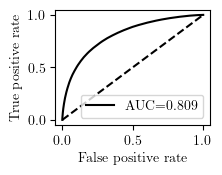

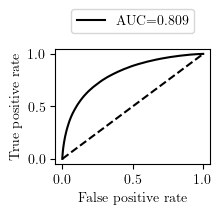


Evaluate_Model() for  BRFC_alpha_0_5_0_0_0_0_Hard
a, b =  0.138 0.992


y_proba  Neg_1  Pos_1  mProb_1     TN      FP   FN      TP      FP/P
134    0.138    1.0    1.0      0.5  40744  635700  487  125769  5.035008

c, d =  135 125769
a, b =  0.7283 0.8584


y_proba  Neg_10  Pos_10  mProb_10      TN     FP     FN     TP      FP/P
1878   0.7283    14.0    16.0  0.533333  646288  30156  83685  42571  0.238848

c, d =  13795 42571
a, b =  0.768 0.8083


y_proba  Neg_20  Pos_20  mProb_20      TN     FP     FN     TP      FP/P
2024    0.768  2201.0  2228.0  0.503048  657052  19392  93013  33243  0.153593

c, d =  24126 33243
a, b =  0.7682 0.77


y_proba  Neg_50  Pos_50  mProb_50      TN     FP     FN     TP      FP/P
2025   0.7682  2295.0  2301.0  0.500653  657054  19390  93013  33243  0.153577

c, d =  31082 33243
a, b =  0.7665 0.766


y_proba  Neg_100  Pos_100  mProb_100      TN     FP     FN     TP  \
2020   0.7665   6708.0   6889.0   0.506656  657023  19421  92984  33272   

          FP/P  
2020  0.153822

c, d =  33272 33272
a, b =  0.768 0.7675


y_proba  Neg_200  Pos_200  mProb_200      TN     FP     FN     TP  \
2024    0.768  11493.0  11550.0   0.501237  657052  19392  93013  33243   

          FP/P  
2024  0.153593

c, d =  33243 33243
a, b =  0.7653 0.765


y_proba  Neg_500  Pos_500  mProb_500      TN     FP     FN     TP  \
2016   0.7653  31053.0  31546.0   0.503938  657018  19426  92979  33277   

          FP/P  
2016  0.153862

c, d =  33277 33277
a, b =  nan 0.7725
a, b =  nan 0.6352


-------------------------------------

BRFC_alpha_0_5_0_0_0_0_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_0_0_0_0_Medium
Analyze_Prediction() for  BRFC_alpha_0_5_0_0_0_0_Medium
Value_Counts_y_proba() for  BRFC_alpha_0_5_0_0_0_0_Medium
FP_P_Locate() for  BRFC_alpha_0_5_0_0_0_0_Medium
BRFC_alpha_0_5_0_0_0_0_Medium  has  12335  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_0_0_0_0_Medium
Plot_Prediction_Wide() for  BRFC_alpha_0_5_0_0_0_0_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_0_0_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_0_0_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_0_0_Medium
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_0_0_0_0_Medium
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_0_0_0_0_Medium
ROC() for  BRFC_alpha_0_5_0_0_0_0_Medium
False
False
./Images/Run_0_0_0_0/BRFC_alpha_0_5_0_0_0_0_Medium_ROC.png

ROC() for  BRFC_al

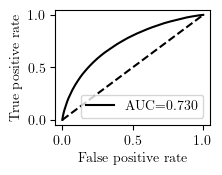

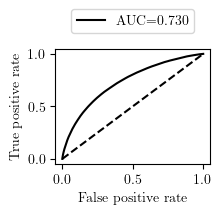


Evaluate_Model() for  BRFC_alpha_0_5_0_0_0_0_Medium
a, b =  0.0256 0.9967


y_proba  Neg_1  Pos_1  mProb_1    TN      FP  FN      TP      FP/P
49   0.0256    1.0    1.0      0.5  1222  675222  25  126231  5.348039

c, d =  140 126231
a, b =  0.8396 0.978


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
7831   0.8396   962.0  1016.0   0.51365  663029  13415  111412  14844   

          FP/P  
7831  0.106252

c, d =  610 14844
a, b =  0.8389 0.9767


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
7826   0.8389  1057.0  1066.0   0.50212  662993  13451  111388  14868   

          FP/P  
7826  0.106538

c, d =  616 14868
a, b =  0.8579 0.9555


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN     TP      FP/P
8002   0.8579  1172.0  1176.0  0.500852  666659  9785  114568  11688  0.077501

c, d =  1469 11688
a, b =  0.8646 0.8805


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN     TP  \
8063   0.8646   2345.0   2345.0        0.5  667911  8533  115783  10473   

          FP/P  
8063  0.067585

c, d =  7967 10473
a, b =  0.8793 0.8833


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
8198   0.8793   3277.0   3397.0    0.50899  669770  6674  117430  8826   

          FP/P  
8198  0.052861

c, d =  7832 8826
a, b =  0.882 0.8819


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
8223    0.882   7227.0   7454.0   0.507731  670509  5935  118330  7926   

          FP/P  
8223  0.047008

c, d =  7934 7926
a, b =  0.8803 0.8802


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
8207   0.8803   14640.0   14653.0    0.500222  670418  6026  118286  7970   

          FP/P  
8207  0.047728

c, d =  7973 7970
a, b =  nan 0.8508


-------------------------------------

BRFC_alpha_0_5_0_0_0_0_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_0_0_0_0_Easy
Analyze_Prediction() for  BRFC_alpha_0_5_0_0_0_0_Easy
Value_Counts_y_proba() for  BRFC_alpha_0_5_0_0_0_0_Easy
FP_P_Locate() for  BRFC_alpha_0_5_0_0_0_0_Easy
BRFC_alpha_0_5_0_0_0_0_Easy  has  63573  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_0_0_0_0_Easy
Plot_Prediction_Wide() for  BRFC_alpha_0_5_0_0_0_0_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_0_0_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_0_0_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_0_0_Easy
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_0_0_0_0_Easy
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_0_0_0_0_Easy
ROC() for  BRFC_alpha_0_5_0_0_0_0_Easy
False
False
./Images/Run_0_0_0_0/BRFC_alpha_0_5_0_0_0_0_Easy_ROC.png

ROC() for  BRFC_alpha_0_5_0_0_0_0_Easy
False
False
./Images/Run_0_0_0

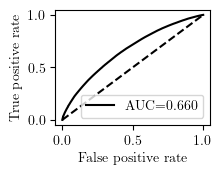

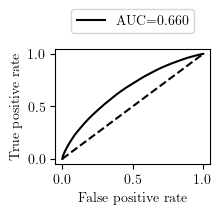


Evaluate_Model() for  BRFC_alpha_0_5_0_0_0_0_Easy
a, b =  0.0004 0.999


y_proba  Neg_1  Pos_1  mProb_1    TN      FP   FN      TP      FP/P
1   0.0004    1.0    1.0      0.5  4624  671820  171  126085  5.321094

c, d =  213 126085
a, b =  0.9179 0.9975


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP      FP/P
9175   0.9179    88.0    91.0   0.50838  672601  3843  122496  3760  0.030438

c, d =  231 3760
a, b =  0.9207 0.9975


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN    TP      FP/P
9203   0.9207   130.0   134.0  0.507576  672814  3630  122684  3572  0.028751

c, d =  231 3572
a, b =  0.9406 0.9642


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
9402   0.9406   305.0   310.0  0.504065  674240  2204  123839  2417  0.017457

c, d =  1210 2417
a, b =  0.9429 0.9621


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
9425   0.9429    564.0    567.0   0.501326  674384  2060  123987  2269   

          FP/P  
9425  0.016316

c, d =  1321 2269
a, b =  0.9599 0.9611


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
9594   0.9599    940.0    958.0   0.504742  675277  1167  124843  1413   

          FP/P  
9594  0.009243

c, d =  1355 1413
a, b =  0.958 0.958


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
9575    0.958   2332.0   2332.0        0.5  675205  1239  124757  1499   

          FP/P  
9575  0.009813

c, d =  1499 1499
a, b =  nan 0.9429
a, b =  nan 0.8929


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Hard
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Hard
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Hard
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Hard
KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Hard  has  105796  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Hard
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Hard
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Hard
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Hard
ROC() for  KBFC_alpha_0_5_ga

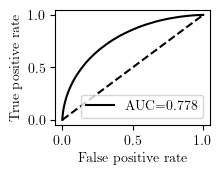

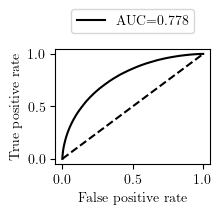


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Hard
a, b =  0.3385 0.9652


y_proba  Neg_1  Pos_1  mProb_1      TN     FP     FN     TP      FP/P
3385   0.3385   27.0   27.0      0.5  626877  49567  81044  45212  0.392591

c, d =  10 45212
a, b =  0.4146 0.9069


y_proba  Neg_10  Pos_10  mProb_10      TN     FP     FN     TP      FP/P
4146   0.4146   182.0   184.0  0.502732  648173  28271  92915  33341  0.223918

c, d =  263 33341
a, b =  0.4744 0.6035


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP     FP/P
4744   0.4744   254.0   254.0       0.5  658219  18225  100212  26044  0.14435

c, d =  14855 26044
a, b =  0.5036 0.574


y_proba  Neg_50  Pos_50  mProb_50      TN     FP      FN     TP  \
5036   0.5036   512.0   522.0  0.504836  661647  14797  103266  22990   

          FP/P  
5036  0.117198

c, d =  17003 22990
a, b =  0.5069 0.5557


y_proba  Neg_100  Pos_100  mProb_100      TN     FP      FN     TP  \
5069   0.5069   1012.0   1012.0        0.5  661973  14471  103609  22647   

          FP/P  
5069  0.114616

c, d =  18435 22647
a, b =  0.5274 0.552


y_proba  Neg_200  Pos_200  mProb_200      TN     FP      FN     TP  \
5274   0.5274   1744.0   1746.0   0.500287  663915  12529  105459  20797   

          FP/P  
5274  0.099235

c, d =  18727 20797
a, b =  0.5366 0.537


y_proba  Neg_500  Pos_500  mProb_500      TN     FP      FN     TP  \
5366   0.5366   4238.0   4243.0   0.500295  664696  11748  106281  19975   

          FP/P  
5366  0.093049

c, d =  19948 19975
a, b =  0.535 0.5349


y_proba  Neg_1000  Pos_1000  mProb_1000      TN     FP      FN     TP  \
5350    0.535    8727.0    8736.0    0.500258  664570  11874  106142  20114   

          FP/P  
5350  0.094047

c, d =  20121 20114
a, b =  0.5452 0.5451


y_proba  Neg_2000  Pos_2000  mProb_2000      TN     FP      FN     TP  \
5452   0.5452   17380.0   17383.0    0.500043  665366  11078  106980  19276   

          FP/P  
5452  0.087742

c, d =  19280 19276


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Medium
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Medium
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Medium
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Medium
KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Medium  has  112273  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Medium
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Medium
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Medium
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Medium
ROC() for  KBFC_alpha_0_5_gamma_0_0_0_

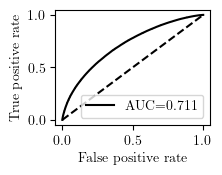

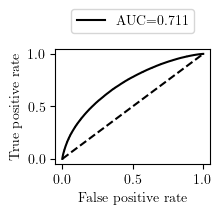


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Medium
a, b =  0.3231 0.8543


y_proba  Neg_1  Pos_1   mProb_1      TN     FP     FN     TP      FP/P
3188   0.3231   22.0   25.0  0.531915  634093  42351  95916  30340  0.335438

c, d =  3 30340
a, b =  0.4605 0.8296


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
4562   0.4605   114.0   114.0       0.5  664164  12280  113624  12632   

          FP/P  
4562  0.097263

c, d =  19 12632
a, b =  0.4708 0.7774


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
4665   0.4708   199.0   201.0    0.5025  665362  11082  114620  11636   

          FP/P  
4665  0.087774

c, d =  127 11636
a, b =  0.5357 0.6425


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
5314   0.5357   347.0   350.0  0.502152  671226  5218  119661  6595  0.041329

c, d =  1868 6595
a, b =  0.5374 0.5723


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
5331   0.5374    640.0    641.0    0.50039  671340  5104  119772  6484   

          FP/P  
5331  0.040426

c, d =  4548 6484
a, b =  0.5419 0.5489


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
5376   0.5419   1225.0   1226.0   0.500204  671607  4837  120055  6201   

          FP/P  
5376  0.038311

c, d =  5792 6201
a, b =  0.5487 0.5486


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
5444   0.5487   2919.0   2928.0    0.50077  672014  4430  120451  5805   

          FP/P  
5444  0.035087

c, d =  5812 5805
a, b =  0.5517 0.5516


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
5474   0.5517    5805.0    5812.0    0.500301  672171  4273  120627  5629   

          FP/P  
5474  0.033844

c, d =  5635 5629
a, b =  0.5693 0.5692


y_proba  Neg_2000  Pos_2000  mProb_2000      TN    FP      FN    TP  \
5650   0.5693   10578.0   10583.0    0.500118  673039  3405  121560  4696   

          FP/P  
5650  0.026969

c, d =  4702 4696


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Easy
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Easy
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Easy
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Easy
KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Easy  has  65081  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Easy
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Easy
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Easy
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Easy
ROC() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Easy
False
False
./Imag

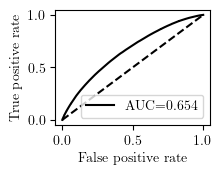

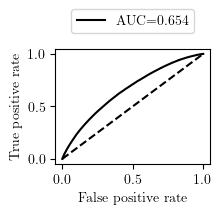


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_0_Easy
a, b =  0.0244 0.5079


y_proba  Neg_1  Pos_1  mProb_1  TN      FP  FN      TP      FP/P
8   0.0244    0.0    1.0      1.0  24  676420   1  126255  5.357528

c, d =  3 126255
a, b =  0.3973 0.4958


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP      FP/P
3734   0.3973    35.0    41.0  0.539474  674578  1866  124965  1291  0.014779

c, d =  6 1291
a, b =  0.4222 0.4897


y_proba  Neg_20  Pos_20  mProb_20      TN   FP      FN   TP      FP/P
3974   0.4222    40.0    40.0       0.5  675623  821  125634  622  0.006503

c, d =  12 622
a, b =  0.4422 0.4827


y_proba  Neg_50  Pos_50  mProb_50      TN   FP      FN   TP     FP/P
4148   0.4422    71.0    71.0       0.5  676064  380  125944  312  0.00301

c, d =  32 312
a, b =  nan 0.4736
a, b =  nan 0.4634
a, b =  nan 0.4414
a, b =  nan 0.4132
a, b =  nan 0.3629

Create_Files_for_Value_Counts_y_Proba
Create_Files_for_Analyze_Prediction()
Create_Files_for_Lengths_of_fpr_tpr
Create_Files_for_ROC_AUC
Create_Files_for_FP_P
Analyze_Results()

-------------------------------------

BRFC_alpha_0_5_0_0_0_1_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_0_0_0_1_Hard
Analyze_Prediction() for  BRFC_alpha_0_5_0_0_0_1_Hard
Value_Counts_y_proba() for  BRFC_alpha_0_5_0_0_0_1_Hard
FP_P_Locate() for  BRFC_alpha_0_5_0_0_0_1_Hard
BRFC_alpha_0_5_0_0_0_1_Hard  has  1423  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_0_0_0_1_Hard
Plot_Prediction_Wide() for  BRFC_alpha_0_5_0_0_0_1_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_0_1_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_0_1_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_0_1_Hard
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_0_0_0_1_H

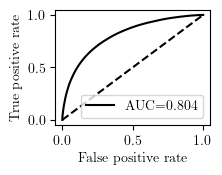

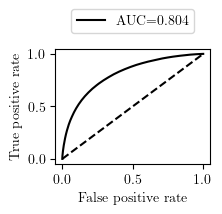


Evaluate_Model() for  BRFC_alpha_0_5_0_0_0_1_Hard
a, b =  0.116 0.9733


y_proba  Neg_1  Pos_1  mProb_1     TN      FP   FN      TP      FP/P
98    0.116    1.0    1.0      0.5  27600  648844  309  125947  5.139114

c, d =  635 125947
a, b =  0.7457 0.912


y_proba  Neg_10  Pos_10  mProb_10      TN     FP     FN     TP      FP/P
2132   0.7457    90.0    94.0   0.51087  651567  24877  89906  36350  0.197036

c, d =  4398 36350
a, b =  0.765 0.8227


y_proba  Neg_20  Pos_20  mProb_20      TN     FP     FN     TP      FP/P
2204    0.765   120.0   126.0  0.512195  656797  19647  94601  31655  0.155612

c, d =  18283 31655
a, b =  0.7667 0.7665


y_proba  Neg_50  Pos_50  mProb_50      TN     FP     FN     TP     FP/P
2210   0.7667  2379.0  2393.0  0.501467  656820  19624  94630  31626  0.15543

c, d =  31647 31626
a, b =  0.7683 0.768


y_proba  Neg_100  Pos_100  mProb_100      TN     FP     FN     TP  \
2214   0.7683   6927.0   6958.0   0.501116  656838  19606  94651  31605   

          FP/P  
2214  0.155288

c, d =  31610 31605
a, b =  0.7697 0.7695


y_proba  Neg_200  Pos_200  mProb_200      TN     FP     FN     TP  \
2218   0.7697  11699.0  11719.0   0.500427  656848  19596  94655  31601   

          FP/P  
2218  0.155208

c, d =  31601 31601
a, b =  0.7765 0.776


y_proba  Neg_500  Pos_500  mProb_500      TN     FP     FN     TP  \
2247   0.7765  28723.0  29303.0   0.504998  659133  17311  96976  29280   

         FP/P  
2247  0.13711

c, d =  29280 29280
a, b =  0.7885 0.7883


y_proba  Neg_1000  Pos_1000  mProb_1000      TN     FP     FN     TP  \
2300   0.7885   55804.0   55858.0    0.500242  661283  15161  99288  26968   

          FP/P  
2300  0.120081

c, d =  26968 26968
a, b =  nan 0.664


-------------------------------------

BRFC_alpha_0_5_0_0_0_1_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_0_0_0_1_Medium
Analyze_Prediction() for  BRFC_alpha_0_5_0_0_0_1_Medium
Value_Counts_y_proba() for  BRFC_alpha_0_5_0_0_0_1_Medium
FP_P_Locate() for  BRFC_alpha_0_5_0_0_0_1_Medium
BRFC_alpha_0_5_0_0_0_1_Medium  has  13628  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_0_0_0_1_Medium
Plot_Prediction_Wide() for  BRFC_alpha_0_5_0_0_0_1_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_0_1_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_0_1_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_0_1_Medium
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_0_0_0_1_Medium
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_0_0_0_1_Medium
ROC() for  BRFC_alpha_0_5_0_0_0_1_Medium
False
False
./Images/Run_0_0_0_1/BRFC_alpha_0_5_0_0_0_1_Medium_ROC.png

ROC() for  BRFC_alpha_0_5_0_0_0_1_Medi

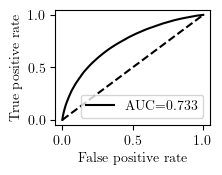

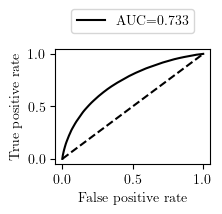


Evaluate_Model() for  BRFC_alpha_0_5_0_0_0_1_Medium
a, b =  0.0397 0.995


y_proba  Neg_1  Pos_1  mProb_1    TN      FP  FN      TP      FP/P
119   0.0397    0.0    1.0      1.0  2970  673474  53  126203  5.334194

c, d =  161 126203
a, b =  0.8366 0.9933


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
7859   0.8366   119.0   127.0   0.51626  661685  14759  109798  16458   

          FP/P  
7859  0.116897

c, d =  166 16458
a, b =  0.849 0.9586


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
7980    0.849   999.0  1010.0  0.502738  664045  12399  111759  14497   

          FP/P  
7980  0.098205

c, d =  1810 14497
a, b =  0.8675 0.9268


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN     TP      FP/P
8156   0.8675  1217.0  1315.0  0.519352  667521  8923  114902  11354  0.070674

c, d =  4074 11354
a, b =  0.87 0.873


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN     TP  \
8180     0.87   1678.0   1688.0   0.501485  668379  8065  115886  10370   

          FP/P  
8180  0.063878

c, d =  10242 10370
a, b =  0.8701 0.8736


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN     TP  \
8181   0.8701   3903.0   3908.0    0.50032  668380  8064  115886  10370   

         FP/P  
8181  0.06387

c, d =  10174 10370
a, b =  0.8727 0.8726


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN     TP  \
8206   0.8727   8314.0   8352.0    0.50114  668546  7898  116006  10250   

          FP/P  
8206  0.062555

c, d =  10254 10250
a, b =  0.8815 0.8814


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
8287   0.8815   15124.0   15352.0    0.503741  669828  6616  117354  8902   

          FP/P  
8287  0.052401

c, d =  8909 8902
a, b =  nan 0.8554


-------------------------------------

BRFC_alpha_0_5_0_0_0_1_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_0_0_0_1_Easy
Analyze_Prediction() for  BRFC_alpha_0_5_0_0_0_1_Easy
Value_Counts_y_proba() for  BRFC_alpha_0_5_0_0_0_1_Easy
FP_P_Locate() for  BRFC_alpha_0_5_0_0_0_1_Easy
BRFC_alpha_0_5_0_0_0_1_Easy  has  63573  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_0_0_0_1_Easy
Plot_Prediction_Wide() for  BRFC_alpha_0_5_0_0_0_1_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_0_1_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_0_1_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_0_1_Easy
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_0_0_0_1_Easy
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_0_0_0_1_Easy
ROC() for  BRFC_alpha_0_5_0_0_0_1_Easy
False
False
./Images/Run_0_0_0_1/BRFC_alpha_0_5_0_0_0_1_Easy_ROC.png

ROC() for  BRFC_alpha_0_5_0_0_0_1_Easy
False
False
./Images/Run_0_0_0

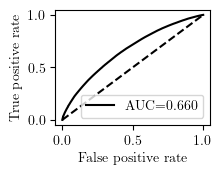

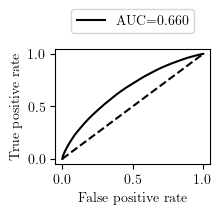


Evaluate_Model() for  BRFC_alpha_0_5_0_0_0_1_Easy
a, b =  0.0004 0.999


y_proba  Neg_1  Pos_1  mProb_1    TN      FP   FN      TP      FP/P
1   0.0004    1.0    1.0      0.5  4624  671820  171  126085  5.321094

c, d =  213 126085
a, b =  0.9179 0.9975


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP      FP/P
9175   0.9179    88.0    91.0   0.50838  672601  3843  122496  3760  0.030438

c, d =  231 3760
a, b =  0.9207 0.9975


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN    TP      FP/P
9203   0.9207   130.0   134.0  0.507576  672814  3630  122684  3572  0.028751

c, d =  231 3572
a, b =  0.9406 0.9642


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
9402   0.9406   305.0   310.0  0.504065  674240  2204  123839  2417  0.017457

c, d =  1210 2417
a, b =  0.9429 0.9621


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
9425   0.9429    564.0    567.0   0.501326  674384  2060  123987  2269   

          FP/P  
9425  0.016316

c, d =  1321 2269
a, b =  0.9599 0.9611


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
9594   0.9599    940.0    958.0   0.504742  675277  1167  124843  1413   

          FP/P  
9594  0.009243

c, d =  1355 1413
a, b =  0.958 0.958


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
9575    0.958   2332.0   2332.0        0.5  675205  1239  124757  1499   

          FP/P  
9575  0.009813

c, d =  1499 1499
a, b =  nan 0.9429
a, b =  nan 0.8929


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Hard
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Hard
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Hard
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Hard
KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Hard  has  105644  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Hard
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Hard
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Hard
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Hard
ROC() for  KBFC_alpha_0_5_ga

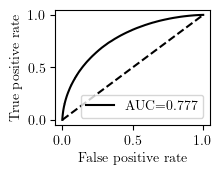

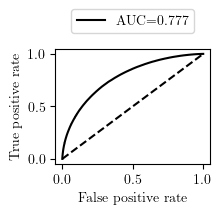


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Hard
a, b =  0.3339 0.9762


y_proba  Neg_1  Pos_1   mProb_1      TN     FP     FN     TP      FP/P
3337   0.3339   28.0   30.0  0.517241  624086  52358  79934  46322  0.414697

c, d =  0 46322
a, b =  0.4462 0.6396


y_proba  Neg_10  Pos_10  mProb_10      TN     FP     FN     TP      FP/P
4460   0.4462   146.0   149.0  0.505085  654141  22303  97114  29142  0.176649

c, d =  12090 29142
a, b =  0.4628 0.5917


y_proba  Neg_20  Pos_20  mProb_20      TN     FP     FN     TP      FP/P
4626   0.4628   269.0   269.0       0.5  656790  19654  99123  27133  0.155668

c, d =  15188 27133
a, b =  0.5108 0.5569


y_proba  Neg_50  Pos_50  mProb_50      TN     FP      FN     TP  \
5106   0.5108   541.0   543.0  0.500923  662786  13658  104317  21939   

          FP/P  
5106  0.108177

c, d =  17772 21939
a, b =  0.5166 0.5303


y_proba  Neg_100  Pos_100  mProb_100      TN     FP      FN     TP  \
5164   0.5166    985.0    990.0   0.501266  663409  13035  104891  21365   

          FP/P  
5164  0.103243

c, d =  20052 21365
a, b =  0.5186 0.5253


y_proba  Neg_200  Pos_200  mProb_200      TN     FP      FN     TP  \
5184   0.5186   1985.0   1985.0        0.5  663599  12845  105083  21173   

          FP/P  
5184  0.101738

c, d =  20517 21173
a, b =  0.5239 0.5243


y_proba  Neg_500  Pos_500  mProb_500      TN     FP      FN     TP  \
5237   0.5239   4711.0   4711.0        0.5  664116  12328  105604  20652   

          FP/P  
5237  0.097643

c, d =  20606 20652
a, b =  0.5313 0.5312


y_proba  Neg_1000  Pos_1000  mProb_1000      TN     FP      FN     TP  \
5311   0.5313    9068.0    9073.0    0.500138  664791  11653  106292  19964   

          FP/P  
5311  0.092297

c, d =  19977 19964
a, b =  0.5452 0.5452


y_proba  Neg_2000  Pos_2000  mProb_2000      TN     FP      FN     TP  \
5450   0.5452   17529.0   17529.0         0.5  665944  10500  107511  18745   

          FP/P  
5450  0.083164

c, d =  18745 18745


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Medium
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Medium
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Medium
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Medium
KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Medium  has  111897  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Medium
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Medium
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Medium
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Medium
ROC() for  KBFC_alpha_0_5_gamma_0_0_0_

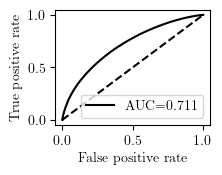

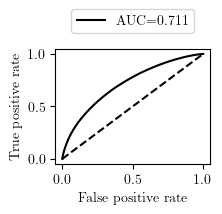


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Medium
a, b =  0.0052 0.8525


y_proba  Neg_1  Pos_1  mProb_1  TN      FP  FN      TP      FP/P
11   0.0052    0.0    1.0      1.0  19  676425   3  126253  5.357567

c, d =  2 126253
a, b =  0.4262 0.8333


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP     FP/P
4221   0.4262   136.0   140.0  0.507246  660792  15652  111073  15183  0.12397

c, d =  11 15183
a, b =  0.4772 0.7286


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN     TP      FP/P
4731   0.4772   185.0   188.0  0.504021  667095  9349  115949  10307  0.074048

c, d =  415 10307
a, b =  0.5105 0.6097


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
5064   0.5105   365.0   371.0  0.504076  670017  6427  118456  7800  0.050905

c, d =  2748 7800
a, b =  0.5157 0.5577


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
5116   0.5157    701.0    704.0   0.501068  670375  6069  118823  7433   

          FP/P  
5116  0.048069

c, d =  4959 7433
a, b =  0.5166 0.5527


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
5125   0.5166   1386.0   1393.0   0.501259  670442  6002  118894  7362   

          FP/P  
5125  0.047538

c, d =  5197 7362
a, b =  0.5339 0.5365


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
5298   0.5339   3016.0   3016.0        0.5  671508  4936  120018  6238   

          FP/P  
5298  0.039095

c, d =  6084 6238
a, b =  0.5389 0.5392


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
5348   0.5389    5882.0    5884.0    0.500085  671809  4635  120293  5963   

          FP/P  
5348  0.036711

c, d =  5936 5963
a, b =  0.5612 0.5614


y_proba  Neg_2000  Pos_2000  mProb_2000      TN    FP      FN    TP  \
5571   0.5612   10367.0   10367.0         0.5  673018  3426  121465  4791   

          FP/P  
5571  0.027135

c, d =  4782 4791


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Easy
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Easy
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Easy
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Easy
KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Easy  has  65081  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Easy
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Easy
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Easy
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Easy
ROC() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Easy
False
False
./Imag

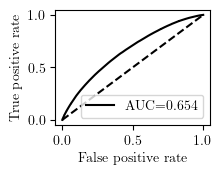

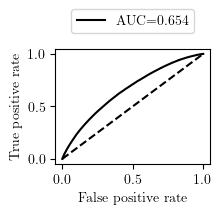


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_0_0_0_1_Easy
a, b =  0.0244 0.5079


y_proba  Neg_1  Pos_1  mProb_1  TN      FP  FN      TP      FP/P
8   0.0244    0.0    1.0      1.0  24  676420   1  126255  5.357528

c, d =  3 126255
a, b =  0.3973 0.4958


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP      FP/P
3734   0.3973    35.0    41.0  0.539474  674578  1866  124965  1291  0.014779

c, d =  6 1291
a, b =  0.4222 0.4897


y_proba  Neg_20  Pos_20  mProb_20      TN   FP      FN   TP      FP/P
3974   0.4222    40.0    40.0       0.5  675623  821  125634  622  0.006503

c, d =  12 622
a, b =  0.4422 0.4827


y_proba  Neg_50  Pos_50  mProb_50      TN   FP      FN   TP     FP/P
4148   0.4422    71.0    71.0       0.5  676064  380  125944  312  0.00301

c, d =  32 312
a, b =  nan 0.4736
a, b =  nan 0.4634
a, b =  nan 0.4414
a, b =  nan 0.4132
a, b =  nan 0.3629

Create_Files_for_Value_Counts_y_Proba
Create_Files_for_Analyze_Prediction()
Create_Files_for_Lengths_of_fpr_tpr
Create_Files_for_ROC_AUC
Create_Files_for_FP_P
Analyze_Results()

-------------------------------------

BRFC_alpha_0_5_0_0_1_0_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_0_0_1_0_Hard
Analyze_Prediction() for  BRFC_alpha_0_5_0_0_1_0_Hard
Value_Counts_y_proba() for  BRFC_alpha_0_5_0_0_1_0_Hard
FP_P_Locate() for  BRFC_alpha_0_5_0_0_1_0_Hard
BRFC_alpha_0_5_0_0_1_0_Hard  has  1299  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_0_0_1_0_Hard
Plot_Prediction_Wide() for  BRFC_alpha_0_5_0_0_1_0_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_1_0_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_1_0_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_1_0_Hard
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_0_0_1_0_H

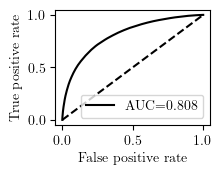

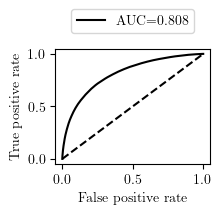


Evaluate_Model() for  BRFC_alpha_0_5_0_0_1_0_Hard
a, b =  0.1897 0.965


y_proba  Neg_1  Pos_1  mProb_1     TN      FP    FN      TP      FP/P
211   0.1897    0.0    1.0      1.0  81693  594751  1388  124868  4.710675

c, d =  1003 124868
a, b =  0.7323 0.9075


y_proba  Neg_10  Pos_10  mProb_10      TN     FP     FN     TP      FP/P
1981   0.7323    32.0    42.0  0.567568  649156  27288  85992  40264  0.216132

c, d =  5931 40264
a, b =  0.7325 0.8235


y_proba  Neg_20  Pos_20  mProb_20      TN     FP     FN     TP      FP/P
1982   0.7325    97.0    99.0  0.505102  649162  27282  86001  40255  0.216085

c, d =  19996 40255
a, b =  0.7662 0.766


y_proba  Neg_50  Pos_50  mProb_50      TN     FP     FN     TP      FP/P
2104   0.7662  2306.0  2338.0  0.503445  656997  19447  92895  33361  0.154028

c, d =  33361 33361
a, b =  0.767 0.7667


y_proba  Neg_100  Pos_100  mProb_100      TN     FP     FN     TP  \
2107    0.767   6768.0   6782.0   0.500517  657020  19424  92916  33340   

          FP/P  
2107  0.153846

c, d =  33340 33340
a, b =  0.7671 0.767


y_proba  Neg_200  Pos_200  mProb_200      TN     FP     FN     TP  \
2108   0.7671  11342.0  11380.0   0.500836  657020  19424  92917  33339   

          FP/P  
2108  0.153846

c, d =  33340 33339
a, b =  0.7692 0.769


y_proba  Neg_500  Pos_500  mProb_500      TN     FP     FN     TP  \
2117   0.7692  30940.0  31448.0   0.504071  657041  19403  92932  33324   

         FP/P  
2117  0.15368

c, d =  33324 33324
a, b =  nan 0.78
a, b =  nan 0.6467


-------------------------------------

BRFC_alpha_0_5_0_0_1_0_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_0_0_1_0_Medium
Analyze_Prediction() for  BRFC_alpha_0_5_0_0_1_0_Medium
Value_Counts_y_proba() for  BRFC_alpha_0_5_0_0_1_0_Medium
FP_P_Locate() for  BRFC_alpha_0_5_0_0_1_0_Medium
BRFC_alpha_0_5_0_0_1_0_Medium  has  13614  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_0_0_1_0_Medium
Plot_Prediction_Wide() for  BRFC_alpha_0_5_0_0_1_0_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_1_0_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_1_0_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_1_0_Medium
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_0_0_1_0_Medium
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_0_0_1_0_Medium
ROC() for  BRFC_alpha_0_5_0_0_1_0_Medium
False
False
./Images/Run_0_0_1_0/BRFC_alpha_0_5_0_0_1_0_Medium_ROC.png

ROC() for  BRFC_alph

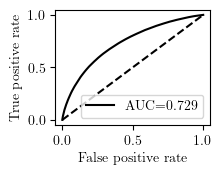

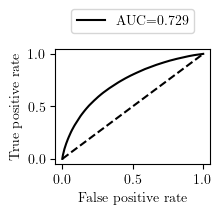


Evaluate_Model() for  BRFC_alpha_0_5_0_0_1_0_Medium
a, b =  0.004 0.9986


y_proba  Neg_1  Pos_1  mProb_1   TN      FP  FN      TP      FP/P
6    0.004    1.0    1.0      0.5  277  676167   6  126250  5.355524

c, d =  139 126250
a, b =  0.8396 0.995


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
7882   0.8396   956.0   963.0  0.501824  662568  13876  111291  14965   

          FP/P  
7882  0.109904

c, d =  143 14965
a, b =  0.859 0.9767


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
8069    0.859   939.0   962.0  0.506049  666387  10057  114405  11851   

          FP/P  
8069  0.079656

c, d =  644 11851
a, b =  0.8677 0.9543


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN     TP      FP/P
8150   0.8677  1079.0  1082.0  0.500694  667984  8460  115840  10416  0.067007

c, d =  1534 10416
a, b =  0.8746 0.8796


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
8216   0.8746   2129.0   2247.0   0.513483  669097  7347  116943  9313   

          FP/P  
8216  0.058191

c, d =  8948 9313
a, b =  0.8779 0.8794


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
8245   0.8779   2839.0   2843.0   0.500352  669448  6996  117225  9031   

          FP/P  
8245  0.055411

c, d =  8952 9031
a, b =  0.882 0.8819


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
8284    0.882   6762.0   6766.0   0.500148  670291  6153  118194  8062   

          FP/P  
8284  0.048734

c, d =  8068 8062
a, b =  0.8877 0.8877


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
8338   0.8877   13268.0   13268.0         0.5  670746  5698  118608  7648   

          FP/P  
8338  0.045131

c, d =  7648 7648
a, b =  nan 0.854


-------------------------------------

BRFC_alpha_0_5_0_0_1_0_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_0_0_1_0_Easy
Analyze_Prediction() for  BRFC_alpha_0_5_0_0_1_0_Easy
Value_Counts_y_proba() for  BRFC_alpha_0_5_0_0_1_0_Easy
FP_P_Locate() for  BRFC_alpha_0_5_0_0_1_0_Easy
BRFC_alpha_0_5_0_0_1_0_Easy  has  63484  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_0_0_1_0_Easy
Plot_Prediction_Wide() for  BRFC_alpha_0_5_0_0_1_0_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_1_0_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_1_0_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_1_0_Easy
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_0_0_1_0_Easy
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_0_0_1_0_Easy
ROC() for  BRFC_alpha_0_5_0_0_1_0_Easy
False
False
./Images/Run_0_0_1_0/BRFC_alpha_0_5_0_0_1_0_Easy_ROC.png

ROC() for  BRFC_alpha_0_5_0_0_1_0_Easy
False
False
./Images/Run_0_0_1_

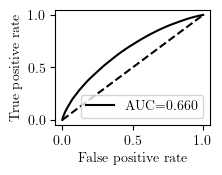

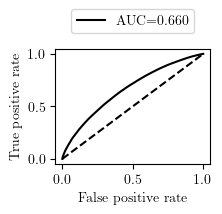


Evaluate_Model() for  BRFC_alpha_0_5_0_0_1_0_Easy
a, b =  0.7735 0.9991


y_proba  Neg_1  Pos_1   mProb_1      TN     FP      FN     TP      FP/P
7729   0.7735   15.0   16.0  0.516129  640692  35752  106735  19521  0.283171

c, d =  193 19521
a, b =  0.9205 0.9957


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP      FP/P
9199   0.9205    91.0    91.0       0.5  672830  3614  122668  3588  0.028624

c, d =  248 3588
a, b =  0.9233 0.996


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN    TP      FP/P
9227   0.9233   156.0   169.0      0.52  673041  3403  122846  3410  0.026953

c, d =  243 3410
a, b =  0.9383 0.9656


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
9377   0.9383   302.0   305.0  0.502471  674109  2335  123722  2534  0.018494

c, d =  1195 2534
a, b =  0.9595 0.9626


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
9589   0.9595    443.0    443.0        0.5  675254  1190  124785  1471   

          FP/P  
9589  0.009425

c, d =  1332 1471
a, b =  0.9619 0.9625


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
9613   0.9619    889.0    889.0        0.5  675361  1083  124894  1362   

          FP/P  
9613  0.008578

c, d =  1337 1362
a, b =  0.9587 0.9588


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
9581   0.9587   2273.0   2273.0        0.5  675211  1233  124760  1496   

          FP/P  
9581  0.009766

c, d =  1494 1496
a, b =  nan 0.9435
a, b =  nan 0.8935


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Hard
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Hard
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Hard
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Hard
KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Hard  has  105991  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Hard
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Hard
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Hard
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Hard
ROC() for  KBFC_alpha_0_5_ga

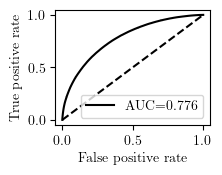

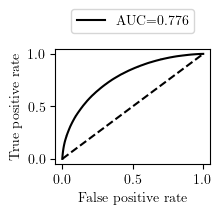


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Hard
a, b =  0.3598 0.9714


y_proba  Neg_1  Pos_1   mProb_1      TN     FP     FN     TP      FP/P
3597   0.3598   26.0   27.0  0.509434  636587  39857  86401  39855  0.315684

c, d =  9 39855
a, b =  0.469 0.6337


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
4689    0.469   118.0   119.0   0.50211  658707  17737  100824  25432   

          FP/P  
4689  0.140484

c, d =  12347 25432
a, b =  0.4727 0.5649


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
4726   0.4727   236.0   237.0  0.501057  659173  17271  101232  25024   

          FP/P  
4726  0.136793

c, d =  17017 25024
a, b =  0.5057 0.5547


y_proba  Neg_50  Pos_50  mProb_50      TN     FP      FN     TP  \
5056   0.5057   448.0   453.0  0.502775  662995  13449  104403  21853   

          FP/P  
5056  0.106522

c, d =  17780 21853
a, b =  0.5257 0.5256


y_proba  Neg_100  Pos_100  mProb_100      TN     FP      FN     TP  \
5256   0.5257    801.0    802.0   0.500312  664816  11628  106104  20152   

          FP/P  
5256  0.092099

c, d =  20157 20152
a, b =  0.5249 0.5248


y_proba  Neg_200  Pos_200  mProb_200      TN     FP      FN     TP  \
5248   0.5249   1640.0   1647.0   0.501065  664760  11684  106048  20208   

          FP/P  
5248  0.092542

c, d =  20216 20208
a, b =  0.5251 0.5263


y_proba  Neg_500  Pos_500  mProb_500      TN     FP      FN     TP  \
5250   0.5251   4221.0   4233.0    0.50071  664770  11674  106059  20197   

          FP/P  
5250  0.092463

c, d =  20115 20197
a, b =  0.5325 0.5324


y_proba  Neg_1000  Pos_1000  mProb_1000      TN     FP      FN     TP  \
5324   0.5325    8324.0    8325.0     0.50003  665333  11111  106644  19612   

          FP/P  
5324  0.088004

c, d =  19622 19612
a, b =  0.5421 0.5421


y_proba  Neg_2000  Pos_2000  mProb_2000      TN     FP      FN     TP  \
5420   0.5421   16611.0   16611.0         0.5  666105  10339  107493  18763   

          FP/P  
5420  0.081889

c, d =  18763 18763


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Medium
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Medium
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Medium
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Medium
KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Medium  has  112073  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Medium
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Medium
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Medium
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Medium
ROC() for  KBFC_alpha_0_5_gamma_0_0_0_

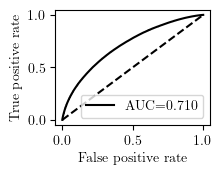

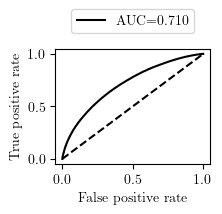


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Medium
a, b =  0.3248 0.8593


y_proba  Neg_1  Pos_1   mProb_1      TN     FP     FN     TP      FP/P
3198   0.3248   24.0   28.0  0.538462  636664  39780  97340  28916  0.315074

c, d =  3 28916
a, b =  0.4396 0.8318


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
4346   0.4396   110.0   115.0  0.511111  662910  13534  112639  13617   

          FP/P  
4346  0.107195

c, d =  10 13617
a, b =  0.467 0.8369


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
4620    0.467   204.0   205.0  0.501222  666174  10270  115288  10968   

          FP/P  
4620  0.081343

c, d =  7 10968
a, b =  0.4965 0.6332


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
4915   0.4965   405.0   407.0  0.501232  669011  7433  117814  8442  0.058872

c, d =  1815 8442
a, b =  0.5207 0.556


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
5157   0.5207    693.0    694.0    0.50036  670928  5516  119563  6693   

          FP/P  
5157  0.043689

c, d =  4678 6693
a, b =  0.5312 0.5313


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
5262   0.5312   1219.0   1219.0        0.5  671613  4831  120231  6025   

          FP/P  
5262  0.038264

c, d =  6018 6025
a, b =  0.5373 0.5372


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
5323   0.5373   2943.0   2948.0   0.500424  671972  4472  120585  5671   

         FP/P  
5323  0.03542

c, d =  5682 5671
a, b =  0.5392 0.5403


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
5342   0.5392    5882.0    5885.0    0.500127  672080  4364  120697  5559   

          FP/P  
5342  0.034565

c, d =  5495 5559
a, b =  0.5597 0.5596


y_proba  Neg_2000  Pos_2000  mProb_2000      TN    FP      FN    TP  \
5547   0.5597   10421.0   10431.0     0.50024  673100  3344  121762  4494   

          FP/P  
5547  0.026486

c, d =  4500 4494


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Easy
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Easy
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Easy
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Easy
KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Easy  has  65020  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Easy
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Easy
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Easy
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Easy
ROC() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Easy
False
False
./Imag

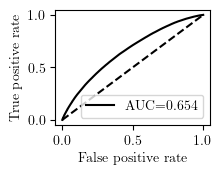

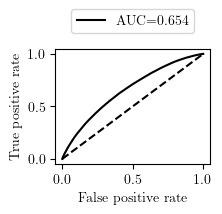


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_0_Easy
a, b =  0.0249 0.5049


y_proba  Neg_1  Pos_1  mProb_1  TN      FP  FN      TP     FP/P
10   0.0249    0.0    1.0      1.0  35  676409   1  126255  5.35744

c, d =  3 126255
a, b =  0.4013 0.5005


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP     FP/P
3770   0.4013    32.0    33.0  0.507692  674785  1659  125114  1142  0.01314

c, d =  6 1142
a, b =  0.4155 0.4904


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN   TP     FP/P
3906   0.4155    73.0    74.0  0.503401  675391  1053  125484  772  0.00834

c, d =  18 772
a, b =  0.4708 0.4827


y_proba  Neg_50  Pos_50  mProb_50      TN  FP      FN  TP      FP/P
4320   0.4708    72.0    73.0  0.503448  676355  89  126183  73  0.000705

c, d =  35 73
a, b =  nan 0.4743
a, b =  nan 0.4647
a, b =  nan 0.4423
a, b =  nan 0.4135
a, b =  nan 0.363

Create_Files_for_Value_Counts_y_Proba
Create_Files_for_Analyze_Prediction()
Create_Files_for_Lengths_of_fpr_tpr
Create_Files_for_ROC_AUC
Create_Files_for_FP_P
Analyze_Results()

-------------------------------------

BRFC_alpha_0_5_0_0_1_1_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_0_0_1_1_Hard
Analyze_Prediction() for  BRFC_alpha_0_5_0_0_1_1_Hard
Value_Counts_y_proba() for  BRFC_alpha_0_5_0_0_1_1_Hard
FP_P_Locate() for  BRFC_alpha_0_5_0_0_1_1_Hard
BRFC_alpha_0_5_0_0_1_1_Hard  has  1410  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_0_0_1_1_Hard
Plot_Prediction_Wide() for  BRFC_alpha_0_5_0_0_1_1_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_1_1_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_1_1_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_1_1_Hard
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_0_0_1_1_Har

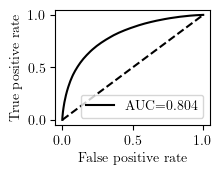

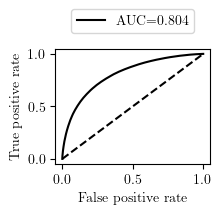


Evaluate_Model() for  BRFC_alpha_0_5_0_0_1_1_Hard
a, b =  0.2144 0.9808


y_proba  Neg_1  Pos_1  mProb_1      TN      FP    FN      TP      FP/P
310   0.2144    0.0    1.0      1.0  111955  564489  2263  123993  4.470988

c, d =  383 123993
a, b =  0.7417 0.9187


y_proba  Neg_10  Pos_10  mProb_10      TN     FP     FN     TP      FP/P
2235   0.7417    28.0    29.0  0.508772  651132  25312  89349  36907  0.200482

c, d =  4471 36907
a, b =  0.7573 0.8142


y_proba  Neg_20  Pos_20  mProb_20      TN     FP     FN     TP      FP/P
2296   0.7573    57.0    57.0       0.5  653985  22459  91813  34443  0.177885

c, d =  20920 34443
a, b =  0.7742 0.774


y_proba  Neg_50  Pos_50  mProb_50      TN     FP     FN     TP      FP/P
2358   0.7742  4447.0  4501.0  0.503017  658868  17576  96440  29816  0.139209

c, d =  29816 29816
a, b =  0.7742 0.7772


y_proba  Neg_100  Pos_100  mProb_100      TN     FP     FN     TP  \
2358   0.7742   4694.0   4715.0   0.501116  658868  17576  96440  29816   

          FP/P  
2358  0.139209

c, d =  29745 29816
a, b =  0.7753 0.775


y_proba  Neg_200  Pos_200  mProb_200      TN     FP     FN     TP  \
2363   0.7753   9336.0   9427.0   0.502425  658922  17522  96486  29770   

          FP/P  
2363  0.138782

c, d =  29770 29770
a, b =  0.7748 0.7745


y_proba  Neg_500  Pos_500  mProb_500      TN     FP     FN     TP  \
2361   0.7748  29233.0  29581.0   0.502958  658868  17576  96443  29813   

          FP/P  
2361  0.139209

c, d =  29814 29813
a, b =  0.7903 0.79


y_proba  Neg_1000  Pos_1000  mProb_1000      TN     FP      FN     TP  \
2428   0.7903   56004.0   56044.0    0.500178  663040  13404  100969  25287   

          FP/P  
2428  0.106165

c, d =  25288 25287
a, b =  nan 0.672


-------------------------------------

BRFC_alpha_0_5_0_0_1_1_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_0_0_1_1_Medium
Analyze_Prediction() for  BRFC_alpha_0_5_0_0_1_1_Medium
Value_Counts_y_proba() for  BRFC_alpha_0_5_0_0_1_1_Medium
FP_P_Locate() for  BRFC_alpha_0_5_0_0_1_1_Medium
BRFC_alpha_0_5_0_0_1_1_Medium  has  15032  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_0_0_1_1_Medium
Plot_Prediction_Wide() for  BRFC_alpha_0_5_0_0_1_1_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_1_1_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_1_1_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_1_1_Medium
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_0_0_1_1_Medium
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_0_0_1_1_Medium
ROC() for  BRFC_alpha_0_5_0_0_1_1_Medium
False
False
./Images/Run_0_0_1_1/BRFC_alpha_0_5_0_0_1_1_Medium_ROC.png

ROC() for  BRFC_alpha_0_5_0_0_1_1_Medi

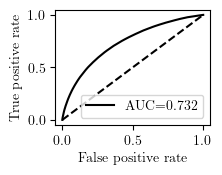

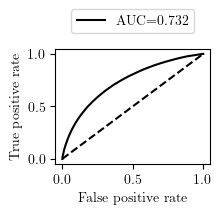


Evaluate_Model() for  BRFC_alpha_0_5_0_0_1_1_Medium
a, b =  0.0245 0.9942


y_proba  Neg_1  Pos_1  mProb_1    TN      FP  FN      TP      FP/P
66   0.0245    0.0    1.0      1.0  1864  674580  38  126218  5.342954

c, d =  204 126218
a, b =  0.8398 0.984


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
7954   0.8398   954.0   964.0  0.502607  661493  14951  110112  16144   

          FP/P  
7954  0.118418

c, d =  487 16144
a, b =  0.8594 0.963


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
8142   0.8594   880.0   892.0  0.503386  665504  10940  113405  12851   

          FP/P  
8142  0.086649

c, d =  1388 12851
a, b =  0.8676 0.9557


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN     TP      FP/P
8221   0.8676  1249.0  1250.0    0.5002  667129  9315  114826  11430  0.073779

c, d =  1885 11430
a, b =  0.875 0.8911


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN     TP  \
8294    0.875   2206.0   2317.0   0.512271  668464  7980  116171  10085   

          FP/P  
8294  0.063205

c, d =  7719 10085
a, b =  0.88 0.8879


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
8343     0.88   3517.0   3597.0   0.505623  669474  6970  117239  9017   

          FP/P  
8343  0.055205

c, d =  8508 9017
a, b =  0.8833 0.8832


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
8376   0.8833   7495.0   7555.0   0.501993  669708  6736  117433  8823   

          FP/P  
8376  0.053352

c, d =  8886 8823
a, b =  0.8908 0.892


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
8449   0.8908   13667.0   13671.0    0.500073  670807  5637  118533  7723   

          FP/P  
8449  0.044647

c, d =  7687 7723
a, b =  nan 0.8594


-------------------------------------

BRFC_alpha_0_5_0_0_1_1_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_0_0_1_1_Easy
Analyze_Prediction() for  BRFC_alpha_0_5_0_0_1_1_Easy
Value_Counts_y_proba() for  BRFC_alpha_0_5_0_0_1_1_Easy
FP_P_Locate() for  BRFC_alpha_0_5_0_0_1_1_Easy
BRFC_alpha_0_5_0_0_1_1_Easy  has  63484  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_0_0_1_1_Easy
Plot_Prediction_Wide() for  BRFC_alpha_0_5_0_0_1_1_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_1_1_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_1_1_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_0_1_1_Easy
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_0_0_1_1_Easy
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_0_0_1_1_Easy
ROC() for  BRFC_alpha_0_5_0_0_1_1_Easy
False
False
./Images/Run_0_0_1_1/BRFC_alpha_0_5_0_0_1_1_Easy_ROC.png

ROC() for  BRFC_alpha_0_5_0_0_1_1_Easy
False
False
./Images/Run_0_0_1

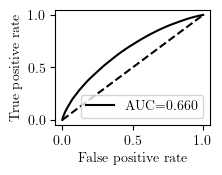

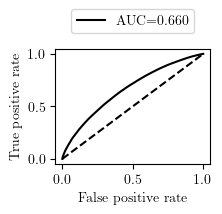


Evaluate_Model() for  BRFC_alpha_0_5_0_0_1_1_Easy
a, b =  0.7735 0.9991


y_proba  Neg_1  Pos_1   mProb_1      TN     FP      FN     TP      FP/P
7729   0.7735   15.0   16.0  0.516129  640692  35752  106735  19521  0.283171

c, d =  193 19521
a, b =  0.9205 0.9957


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP      FP/P
9199   0.9205    91.0    91.0       0.5  672830  3614  122668  3588  0.028624

c, d =  248 3588
a, b =  0.9233 0.996


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN    TP      FP/P
9227   0.9233   156.0   169.0      0.52  673041  3403  122846  3410  0.026953

c, d =  243 3410
a, b =  0.9383 0.9656


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
9377   0.9383   302.0   305.0  0.502471  674109  2335  123722  2534  0.018494

c, d =  1195 2534
a, b =  0.9595 0.9626


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
9589   0.9595    443.0    443.0        0.5  675254  1190  124785  1471   

          FP/P  
9589  0.009425

c, d =  1332 1471
a, b =  0.9619 0.9625


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
9613   0.9619    889.0    889.0        0.5  675361  1083  124894  1362   

          FP/P  
9613  0.008578

c, d =  1337 1362
a, b =  0.9587 0.9588


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
9581   0.9587   2273.0   2273.0        0.5  675211  1233  124760  1496   

          FP/P  
9581  0.009766

c, d =  1494 1496
a, b =  nan 0.9435
a, b =  nan 0.8935


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Hard
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Hard
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Hard
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Hard
KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Hard  has  106079  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Hard
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Hard
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Hard
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Hard
ROC() for  KBFC_alpha_0_5_ga

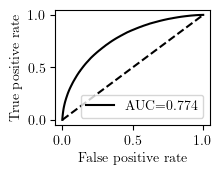

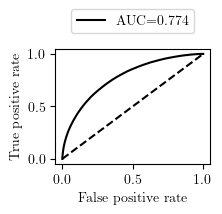


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Hard
a, b =  0.351 0.971


y_proba  Neg_1  Pos_1  mProb_1      TN     FP     FN     TP     FP/P
3509    0.351   19.0   24.0  0.55814  631416  45028  84124  42132  0.35664

c, d =  0 42132
a, b =  0.4804 0.6002


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
4803   0.4804    98.0    99.0  0.502538  659499  16945  101630  24626   

          FP/P  
4803  0.134211

c, d =  14635 24626
a, b =  0.4986 0.5796


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
4985   0.4986   214.0   214.0       0.5  661677  14767  103461  22795   

          FP/P  
4985  0.116961

c, d =  16001 22795
a, b =  0.5086 0.5528


y_proba  Neg_50  Pos_50  mProb_50      TN     FP      FN     TP  \
5085   0.5086   460.0   461.0  0.500543  662758  13686  104382  21874   

          FP/P  
5085  0.108399

c, d =  18042 21874
a, b =  0.5207 0.5331


y_proba  Neg_100  Pos_100  mProb_100      TN     FP      FN     TP  \
5206   0.5207    921.0    925.0   0.501083  663955  12489  105501  20755   

          FP/P  
5206  0.098918

c, d =  19638 20755
a, b =  0.5227 0.5281


y_proba  Neg_200  Pos_200  mProb_200      TN     FP      FN     TP  \
5226   0.5227   1813.0   1813.0        0.5  664140  12304  105683  20573   

          FP/P  
5226  0.097453

c, d =  20078 20573
a, b =  0.5301 0.53


y_proba  Neg_500  Pos_500  mProb_500      TN     FP      FN     TP  \
5300   0.5301   4299.0   4300.0   0.500058  664765  11679  106338  19918   

          FP/P  
5300  0.092503

c, d =  19928 19918
a, b =  0.5377 0.5376


y_proba  Neg_1000  Pos_1000  mProb_1000      TN     FP      FN     TP  \
5376   0.5377    8409.0    8413.0    0.500119  665408  11036  106994  19262   

         FP/P  
5376  0.08741

c, d =  19272 19262
a, b =  0.5486 0.5485


y_proba  Neg_2000  Pos_2000  mProb_2000      TN     FP      FN     TP  \
5485   0.5486   16687.0   16697.0     0.50015  666247  10197  107891  18365   

          FP/P  
5485  0.080764

c, d =  18372 18365


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Medium
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Medium
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Medium
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Medium
KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Medium  has  111917  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Medium
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Medium
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Medium
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Medium
ROC() for  KBFC_alpha_0_5_gamma_0_0_0_

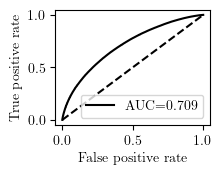

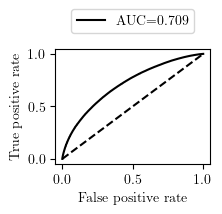


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Medium
a, b =  0.3113 0.8423


y_proba  Neg_1  Pos_1  mProb_1      TN     FP     FN     TP      FP/P
3061   0.3113   29.0   32.0  0.52459  627405  49039  93210  33046  0.388409

c, d =  2 33046
a, b =  0.4506 0.7907


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
4454   0.4506   109.0   114.0  0.511211  662549  13895  112391  13865   

          FP/P  
4454  0.110054

c, d =  75 13865
a, b =  0.4705 0.7336


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
4653   0.4705   200.0   206.0  0.507389  664994  11450  114291  11965   

          FP/P  
4653  0.090689

c, d =  345 11965
a, b =  0.5274 0.5832


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
5222   0.5274   352.0   353.0  0.500709  670392  6052  118919  7337  0.047934

c, d =  4086 7337
a, b =  0.5365 0.571


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
5313   0.5365    666.0    673.0   0.502614  671057  5387  119570  6686   

          FP/P  
5313  0.042667

c, d =  4673 6686
a, b =  0.5349 0.5713


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
5297   0.5349   1351.0   1360.0    0.50166  670950  5494  119447  6809   

          FP/P  
5297  0.043515

c, d =  4663 6809
a, b =  0.5501 0.55


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
5449   0.5501   3035.0   3038.0   0.500247  671857  4587  120419  5837   

          FP/P  
5449  0.036331

c, d =  5844 5837
a, b =  0.5528 0.5527


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
5476   0.5528    5929.0    5933.0    0.500169  672012  4432  120582  5674   

          FP/P  
5476  0.035103

c, d =  5678 5674
a, b =  0.5709 0.5739


y_proba  Neg_2000  Pos_2000  mProb_2000      TN    FP      FN    TP  \
5657   0.5709   10759.0   10765.0    0.500139  673054  3390  121579  4677   

         FP/P  
5657  0.02685

c, d =  4532 4677


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Easy
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Easy
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Easy
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Easy
KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Easy  has  65020  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Easy
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Easy
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Easy
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Easy
ROC() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Easy
False
False
./Imag

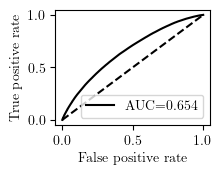

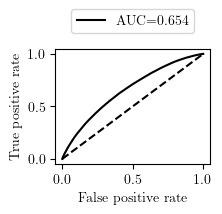


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_0_0_1_1_Easy
a, b =  0.0249 0.5049


y_proba  Neg_1  Pos_1  mProb_1  TN      FP  FN      TP     FP/P
10   0.0249    0.0    1.0      1.0  35  676409   1  126255  5.35744

c, d =  3 126255
a, b =  0.4013 0.5005


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP     FP/P
3770   0.4013    32.0    33.0  0.507692  674785  1659  125114  1142  0.01314

c, d =  6 1142
a, b =  0.4155 0.4904


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN   TP     FP/P
3906   0.4155    73.0    74.0  0.503401  675391  1053  125484  772  0.00834

c, d =  18 772
a, b =  0.4708 0.4827


y_proba  Neg_50  Pos_50  mProb_50      TN  FP      FN  TP      FP/P
4320   0.4708    72.0    73.0  0.503448  676355  89  126183  73  0.000705

c, d =  35 73
a, b =  nan 0.4743
a, b =  nan 0.4647
a, b =  nan 0.4423
a, b =  nan 0.4135
a, b =  nan 0.363

Create_Files_for_Value_Counts_y_Proba
Create_Files_for_Analyze_Prediction()
Create_Files_for_Lengths_of_fpr_tpr
Create_Files_for_ROC_AUC
Create_Files_for_FP_P
Analyze_Results()

-------------------------------------

BRFC_alpha_0_5_0_1_0_0_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_0_1_0_0_Hard
Analyze_Prediction() for  BRFC_alpha_0_5_0_1_0_0_Hard
Value_Counts_y_proba() for  BRFC_alpha_0_5_0_1_0_0_Hard
FP_P_Locate() for  BRFC_alpha_0_5_0_1_0_0_Hard
BRFC_alpha_0_5_0_1_0_0_Hard  has  1234  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_0_1_0_0_Hard
Plot_Prediction_Wide() for  BRFC_alpha_0_5_0_1_0_0_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_0_0_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_0_0_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_0_0_Hard
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_0_1_0_0_Har

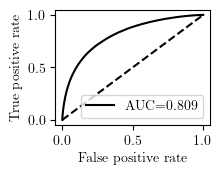

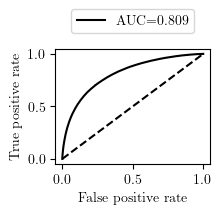


Evaluate_Model() for  BRFC_alpha_0_5_0_1_0_0_Hard
a, b =  0.0717 0.975


y_proba  Neg_1  Pos_1  mProb_1     TN      FP  FN      TP      FP/P
35   0.0717    1.0    1.0      0.5  10400  666044  79  126177  5.275345

c, d =  562 126177
a, b =  0.6683 0.8435


y_proba  Neg_10  Pos_10  mProb_10      TN     FP     FN     TP      FP/P
1659   0.6683    27.0    27.0       0.5  623444  53000  69859  56397  0.419782

c, d =  15055 56397
a, b =  0.7362 0.824


y_proba  Neg_20  Pos_20  mProb_20      TN     FP     FN     TP      FP/P
1923   0.7362    85.0    86.0  0.502924  649796  26648  86419  39837  0.211063

c, d =  19129 39837
a, b =  0.7602 0.7618


y_proba  Neg_50  Pos_50  mProb_50      TN     FP     FN     TP      FP/P
2020   0.7602  2491.0  2494.0  0.500301  657543  18901  93450  32806  0.149704

c, d =  32794 32806
a, b =  0.762 0.7618


y_proba  Neg_100  Pos_100  mProb_100      TN     FP     FN     TP  \
2030    0.762   4801.0   4848.0   0.502435  657554  18890  93463  32793   

          FP/P  
2030  0.149617

c, d =  32794 32793
a, b =  0.766 0.7657


y_proba  Neg_200  Pos_200  mProb_200      TN     FP     FN     TP  \
2041    0.766  11372.0  11776.0   0.508726  657629  18815  93532  32724   

          FP/P  
2041  0.149023

c, d =  32725 32724
a, b =  0.7613 0.7612


y_proba  Neg_500  Pos_500  mProb_500      TN     FP     FN     TP  \
2026   0.7613  29981.0  30137.0   0.501297  657545  18899  93459  32797   

          FP/P  
2026  0.149688

c, d =  32799 32797
a, b =  nan 0.7742
a, b =  nan 0.6408


-------------------------------------

BRFC_alpha_0_5_0_1_0_0_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_0_1_0_0_Medium
Analyze_Prediction() for  BRFC_alpha_0_5_0_1_0_0_Medium
Value_Counts_y_proba() for  BRFC_alpha_0_5_0_1_0_0_Medium
FP_P_Locate() for  BRFC_alpha_0_5_0_1_0_0_Medium
BRFC_alpha_0_5_0_1_0_0_Medium  has  12400  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_0_1_0_0_Medium
Plot_Prediction_Wide() for  BRFC_alpha_0_5_0_1_0_0_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_0_0_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_0_0_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_0_0_Medium
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_0_1_0_0_Medium
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_0_1_0_0_Medium
ROC() for  BRFC_alpha_0_5_0_1_0_0_Medium
False
False
./Images/Run_0_1_0_0/BRFC_alpha_0_5_0_1_0_0_Medium_ROC.png

ROC() for  BRFC_al

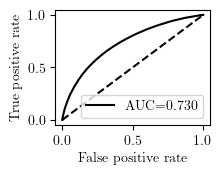

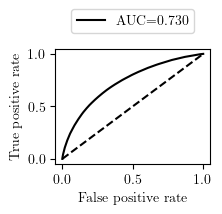


Evaluate_Model() for  BRFC_alpha_0_5_0_1_0_0_Medium
a, b =  0.0261 0.9967


y_proba  Neg_1  Pos_1   mProb_1    TN      FP  FN      TP      FP/P
63   0.0261    1.0    2.0  0.666667  1283  675161  34  126222  5.347556

c, d =  111 126222
a, b =  0.8495 0.9959


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP     FP/P
7967   0.8495   897.0   912.0  0.504146  664956  11488  113015  13241  0.09099

c, d =  114 13241
a, b =  0.8591 0.9516


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN     TP      FP/P
8057   0.8591   956.0   982.0  0.506708  666708  9736  114493  11763  0.077113

c, d =  1535 11763
a, b =  0.862 0.9366


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN     TP      FP/P
8085    0.862  1146.0  1146.0       0.5  667659  8785  115492  10764  0.069581

c, d =  2697 10764
a, b =  0.865 0.8895


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN     TP  \
8115    0.865   2332.0   2406.0   0.507809  668044  8400  115802  10454   

          FP/P  
8115  0.066531

c, d =  7446 10454
a, b =  0.8695 0.8694


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN     TP  \
8159   0.8695   3691.0   3848.0   0.510413  668364  8080  116022  10234   

          FP/P  
8159  0.063997

c, d =  10237 10234
a, b =  0.8736 0.8736


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
8199   0.8736   7829.0   7829.0        0.5  669315  7129  117082  9174   

          FP/P  
8199  0.056465

c, d =  9174 9174
a, b =  0.8824 0.8823


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
8282   0.8824   14518.0   14519.0    0.500017  670495  5949  118395  7861   

          FP/P  
8282  0.047119

c, d =  7862 7861
a, b =  nan 0.8521


-------------------------------------

BRFC_alpha_0_5_0_1_0_0_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_0_1_0_0_Easy
Analyze_Prediction() for  BRFC_alpha_0_5_0_1_0_0_Easy
Value_Counts_y_proba() for  BRFC_alpha_0_5_0_1_0_0_Easy
FP_P_Locate() for  BRFC_alpha_0_5_0_1_0_0_Easy
BRFC_alpha_0_5_0_1_0_0_Easy  has  63563  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_0_1_0_0_Easy
Plot_Prediction_Wide() for  BRFC_alpha_0_5_0_1_0_0_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_0_0_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_0_0_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_0_0_Easy
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_0_1_0_0_Easy
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_0_1_0_0_Easy
ROC() for  BRFC_alpha_0_5_0_1_0_0_Easy
False
False
./Images/Run_0_1_0_0/BRFC_alpha_0_5_0_1_0_0_Easy_ROC.png

ROC() for  BRFC_alpha_0_5_0_1_0_0_Easy
False
False
./Images/Run_0_1_0

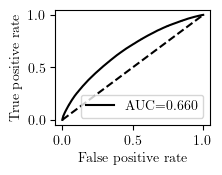

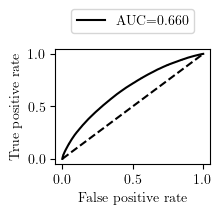


Evaluate_Model() for  BRFC_alpha_0_5_0_1_0_0_Easy
a, b =  0.7574 0.999


y_proba  Neg_1  Pos_1  mProb_1      TN     FP      FN     TP      FP/P
7567   0.7574   14.0   14.0      0.5  633961  42483  103799  22457  0.336483

c, d =  209 22457
a, b =  0.8814 0.9971


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP      FP/P
8807   0.8814   118.0   120.0  0.504202  668261  8183  119656  6600  0.064813

c, d =  233 6600
a, b =  0.9292 0.9967


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN    TP      FP/P
9283   0.9292   143.0   148.0  0.508591  673446  2998  123154  3102  0.023745

c, d =  233 3102
a, b =  0.943 0.9752


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
9420    0.943   273.0   282.0  0.508108  674379  2065  123996  2260  0.016356

c, d =  827 2260
a, b =  0.9418 0.9591


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
9408   0.9418    585.0    596.0   0.504657  674298  2146  123917  2339   

          FP/P  
9408  0.016997

c, d =  1496 2339
a, b =  0.9613 0.9617


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
9600   0.9613    893.0    894.0    0.50028  675330  1114  124866  1390   

          FP/P  
9600  0.008823

c, d =  1364 1390
a, b =  0.9591 0.9592


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
9579   0.9591   2299.0   2299.0        0.5  675251  1193  124760  1496   

          FP/P  
9579  0.009449

c, d =  1488 1496
a, b =  nan 0.9429
a, b =  nan 0.8926


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Hard
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Hard
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Hard
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Hard
KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Hard  has  105746  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Hard
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Hard
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Hard
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Hard
ROC() for  KBFC_alpha_0_5_ga

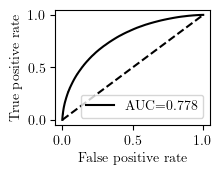

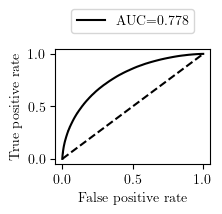


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Hard
a, b =  0.334 0.9771


y_proba  Neg_1  Pos_1   mProb_1      TN     FP     FN     TP      FP/P
3339    0.334   27.0   31.0  0.534483  628253  48191  81654  44602  0.381693

c, d =  0 44602
a, b =  0.459 0.7186


y_proba  Neg_10  Pos_10  mProb_10      TN     FP     FN     TP      FP/P
4589    0.459   124.0   126.0     0.504  657057  19387  99324  26932  0.153553

c, d =  7662 26932
a, b =  0.4737 0.5882


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
4736   0.4737   231.0   231.0       0.5  659009  17435  100936  25320   

          FP/P  
4736  0.138092

c, d =  15578 25320
a, b =  0.516 0.5691


y_proba  Neg_50  Pos_50  mProb_50      TN     FP      FN     TP  \
5159    0.516   452.0   454.0  0.501104  663574  12870  104975  21281   

          FP/P  
5159  0.101936

c, d =  16917 21281
a, b =  0.5272 0.5276


y_proba  Neg_100  Pos_100  mProb_100      TN     FP      FN     TP  \
5271   0.5272    855.0    856.0   0.500292  664590  11854  105947  20309   

          FP/P  
5271  0.093889

c, d =  20279 20309
a, b =  0.5257 0.5256


y_proba  Neg_200  Pos_200  mProb_200      TN     FP      FN     TP  \
5256   0.5257   1744.0   1750.0   0.500859  664471  11973  105815  20441   

          FP/P  
5256  0.094831

c, d =  20450 20441
a, b =  0.5267 0.5267


y_proba  Neg_500  Pos_500  mProb_500      TN     FP      FN     TP  \
5266   0.5267   4355.0   4355.0        0.5  664551  11893  105900  20356   

          FP/P  
5266  0.094198

c, d =  20356 20356
a, b =  0.5347 0.5351


y_proba  Neg_1000  Pos_1000  mProb_1000      TN     FP      FN     TP  \
5346   0.5347    8352.0    8355.0     0.50009  665201  11243  106599  19657   

          FP/P  
5346  0.089049

c, d =  19612 19657
a, b =  0.5389 0.5388


y_proba  Neg_2000  Pos_2000  mProb_2000      TN     FP      FN     TP  \
5388   0.5389   17058.0   17065.0    0.500103  665553  10891  106980  19276   

          FP/P  
5388  0.086261

c, d =  19290 19276


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Medium
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Medium
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Medium
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Medium
KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Medium  has  112022  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Medium
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Medium
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Medium
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Medium
ROC() for  KBFC_alpha_0_5_gamma_0_0_0_

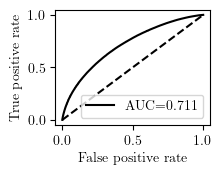

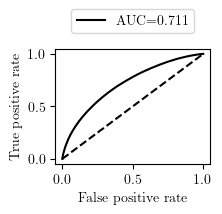


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Medium
a, b =  0.0055 0.8651


y_proba  Neg_1  Pos_1  mProb_1  TN      FP  FN      TP     FP/P
19   0.0055    1.0    1.0      0.5  30  676414   1  126255  5.35748

c, d =  5 126255
a, b =  0.4433 0.8558


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
4397   0.4433   122.0   122.0       0.5  662789  13655  112330  13926   

          FP/P  
4397  0.108153

c, d =  5 13926
a, b =  0.4571 0.7614


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
4535   0.4571   227.0   232.0  0.505447  664585  11859  113696  12560   

          FP/P  
4535  0.093928

c, d =  167 12560
a, b =  0.4914 0.5734


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP     FP/P
4878   0.4914   439.0   442.0  0.501703  668255  8189  116878  9378  0.06486

c, d =  4132 9378
a, b =  0.5185 0.5716


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
5149   0.5185    707.0    712.0   0.501762  670543  5901  118980  7276   

          FP/P  
5149  0.046738

c, d =  4199 7276
a, b =  0.5282 0.5648


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
5246   0.5282   1291.0   1301.0   0.501929  671190  5254  119614  6642   

          FP/P  
5246  0.041614

c, d =  4512 6642
a, b =  0.5235 0.5257


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
5199   0.5235   3413.0   3416.0    0.50022  670873  5571  119339  6917   

          FP/P  
5199  0.044125

c, d =  6782 6917
a, b =  0.5359 0.5358


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
5323   0.5359    6282.0    6283.0     0.50004  671666  4778  120112  6144   

          FP/P  
5323  0.037844

c, d =  6152 6144
a, b =  0.5539 0.5538


y_proba  Neg_2000  Pos_2000  mProb_2000      TN    FP      FN    TP  \
5503   0.5539   11495.0   11501.0     0.50013  672622  3822  121209  5047   

          FP/P  
5503  0.030272

c, d =  5052 5047


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Easy
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Easy
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Easy
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Easy
KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Easy  has  64988  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Easy
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Easy
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Easy
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Easy
ROC() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Easy
False
False
./Imag

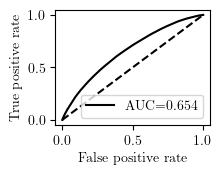

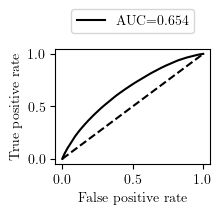


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_0_Easy
a, b =  0.3201 0.51


y_proba  Neg_1  Pos_1  mProb_1      TN     FP      FN    TP      FP/P
2958   0.3201   26.0   31.0  0.54386  660177  16267  117428  8828  0.128841

c, d =  0 8828
a, b =  0.4035 0.4943


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP      FP/P
3790   0.4035    29.0    42.0  0.591549  674942  1502  125211  1045  0.011896

c, d =  6 1045
a, b =  0.4116 0.4887


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN   TP      FP/P
3871   0.4116    41.0    44.0  0.517647  675291  1153  125418  838  0.009132

c, d =  12 838
a, b =  0.4468 0.481


y_proba  Neg_50  Pos_50  mProb_50      TN   FP      FN   TP      FP/P
4184   0.4468    84.0    84.0       0.5  676130  314  125994  262  0.002487

c, d =  33 262
a, b =  nan 0.4733
a, b =  nan 0.4622
a, b =  nan 0.4399
a, b =  nan 0.4126
a, b =  nan 0.3623

Create_Files_for_Value_Counts_y_Proba
Create_Files_for_Analyze_Prediction()
Create_Files_for_Lengths_of_fpr_tpr
Create_Files_for_ROC_AUC
Create_Files_for_FP_P
Analyze_Results()

-------------------------------------

BRFC_alpha_0_5_0_1_0_1_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_0_1_0_1_Hard
Analyze_Prediction() for  BRFC_alpha_0_5_0_1_0_1_Hard
Value_Counts_y_proba() for  BRFC_alpha_0_5_0_1_0_1_Hard
FP_P_Locate() for  BRFC_alpha_0_5_0_1_0_1_Hard
BRFC_alpha_0_5_0_1_0_1_Hard  has  1373  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_0_1_0_1_Hard
Plot_Prediction_Wide() for  BRFC_alpha_0_5_0_1_0_1_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_0_1_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_0_1_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_0_1_Hard
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_0_1_0_1_H

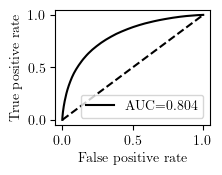

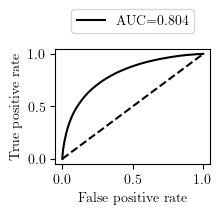


Evaluate_Model() for  BRFC_alpha_0_5_0_1_0_1_Hard
a, b =  0.1017 0.985


y_proba  Neg_1  Pos_1  mProb_1     TN      FP   FN      TP      FP/P
73   0.1017    0.0    1.0      1.0  22664  653780  257  125999  5.178209

c, d =  338 125999
a, b =  0.7467 0.8683


y_proba  Neg_10  Pos_10  mProb_10      TN     FP     FN     TP      FP/P
2141   0.7467    44.0    45.0  0.505618  651621  24823  89884  36372  0.196608

c, d =  10780 36372
a, b =  0.7665 0.8152


y_proba  Neg_20  Pos_20  mProb_20      TN     FP     FN     TP      FP/P
2223   0.7665   113.0   113.0       0.5  656830  19614  94584  31672  0.155351

c, d =  20332 31672
a, b =  0.767 0.7667


y_proba  Neg_50  Pos_50  mProb_50      TN     FP     FN     TP      FP/P
2225    0.767  2348.0  2411.0  0.506619  656850  19594  94609  31647  0.155193

c, d =  31648 31647
a, b =  0.768 0.7677


y_proba  Neg_100  Pos_100  mProb_100      TN     FP     FN     TP  \
2229    0.768   6841.0   7076.0   0.508443  656859  19585  94630  31626   

          FP/P  
2229  0.155121

c, d =  31629 31626
a, b =  0.7642 0.764


y_proba  Neg_200  Pos_200  mProb_200      TN     FP     FN     TP  \
2215   0.7642  11714.0  11792.0   0.501659  656761  19683  94526  31730   

          FP/P  
2215  0.155898

c, d =  31732 31730
a, b =  0.7722 0.772


y_proba  Neg_500  Pos_500  mProb_500      TN     FP     FN     TP  \
2247   0.7722  28825.0  29406.0   0.504989  659044  17400  96894  29362   

          FP/P  
2247  0.137815

c, d =  29364 29362
a, b =  0.7847 0.7845


y_proba  Neg_1000  Pos_1000  mProb_1000      TN     FP     FN     TP  \
2297   0.7847   55568.0   55675.0    0.500481  661193  15251  99307  26949   

          FP/P  
2297  0.120794

c, d =  26950 26949
a, b =  nan 0.664


-------------------------------------

BRFC_alpha_0_5_0_1_0_1_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_0_1_0_1_Medium
Analyze_Prediction() for  BRFC_alpha_0_5_0_1_0_1_Medium
Value_Counts_y_proba() for  BRFC_alpha_0_5_0_1_0_1_Medium
FP_P_Locate() for  BRFC_alpha_0_5_0_1_0_1_Medium
BRFC_alpha_0_5_0_1_0_1_Medium  has  13831  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_0_1_0_1_Medium
Plot_Prediction_Wide() for  BRFC_alpha_0_5_0_1_0_1_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_0_1_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_0_1_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_0_1_Medium
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_0_1_0_1_Medium
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_0_1_0_1_Medium
ROC() for  BRFC_alpha_0_5_0_1_0_1_Medium
False
False
./Images/Run_0_1_0_1/BRFC_alpha_0_5_0_1_0_1_Medium_ROC.png

ROC() for  BRFC_alpha_0_5_0_1_0_1_Medi

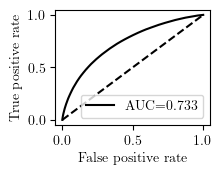

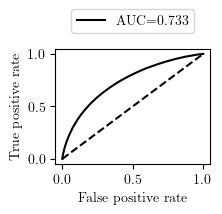


Evaluate_Model() for  BRFC_alpha_0_5_0_1_0_1_Medium
a, b =  0.0442 0.998


y_proba  Neg_1  Pos_1  mProb_1    TN      FP   FN      TP      FP/P
159   0.0442    1.0    1.0      0.5  4222  672222  104  126152  5.324278

c, d =  156 126152
a, b =  0.8596 0.9933


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
8120   0.8596   846.0   849.0  0.500885  665914  10530  113455  12801   

          FP/P  
8120  0.083402

c, d =  164 12801
a, b =  0.869 0.973


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN     TP      FP/P
8209    0.869   801.0   913.0  0.532672  667600  8844  114981  11275  0.070048

c, d =  821 11275
a, b =  0.8673 0.9461


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN     TP      FP/P
8194   0.8673  1199.0  1272.0  0.514771  667460  8984  114894  11362  0.071157

c, d =  2476 11362
a, b =  0.8749 0.8796


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN     TP  \
8266   0.8749   2070.0   2207.0   0.516016  668650  7794  116060  10196   

          FP/P  
8266  0.061732

c, d =  9826 10196
a, b =  0.8749 0.8779


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN     TP  \
8266   0.8749   3011.0   3012.0   0.500083  668650  7794  116060  10196   

          FP/P  
8266  0.061732

c, d =  9885 10196
a, b =  0.8831 0.883


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
8342   0.8831   7327.0   7596.0   0.509013  669869  6575  117317  8939   

          FP/P  
8342  0.052077

c, d =  8940 8939
a, b =  0.8823 0.8822


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
8335   0.8823   14261.0   14286.0    0.500438  669818  6626  117283  8973   

          FP/P  
8335  0.052481

c, d =  8975 8973
a, b =  nan 0.8565


-------------------------------------

BRFC_alpha_0_5_0_1_0_1_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_0_1_0_1_Easy
Analyze_Prediction() for  BRFC_alpha_0_5_0_1_0_1_Easy
Value_Counts_y_proba() for  BRFC_alpha_0_5_0_1_0_1_Easy
FP_P_Locate() for  BRFC_alpha_0_5_0_1_0_1_Easy
BRFC_alpha_0_5_0_1_0_1_Easy  has  63563  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_0_1_0_1_Easy
Plot_Prediction_Wide() for  BRFC_alpha_0_5_0_1_0_1_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_0_1_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_0_1_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_0_1_Easy
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_0_1_0_1_Easy
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_0_1_0_1_Easy
ROC() for  BRFC_alpha_0_5_0_1_0_1_Easy
False
False
./Images/Run_0_1_0_1/BRFC_alpha_0_5_0_1_0_1_Easy_ROC.png

ROC() for  BRFC_alpha_0_5_0_1_0_1_Easy
False
False
./Images/Run_0_1_0

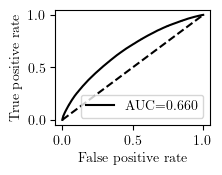

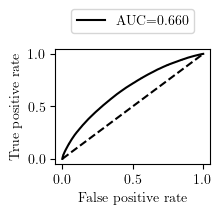


Evaluate_Model() for  BRFC_alpha_0_5_0_1_0_1_Easy
a, b =  0.7574 0.999


y_proba  Neg_1  Pos_1  mProb_1      TN     FP      FN     TP      FP/P
7567   0.7574   14.0   14.0      0.5  633961  42483  103799  22457  0.336483

c, d =  209 22457
a, b =  0.8814 0.9971


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP      FP/P
8807   0.8814   118.0   120.0  0.504202  668261  8183  119656  6600  0.064813

c, d =  233 6600
a, b =  0.9292 0.9967


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN    TP      FP/P
9283   0.9292   143.0   148.0  0.508591  673446  2998  123154  3102  0.023745

c, d =  233 3102
a, b =  0.943 0.9752


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
9420    0.943   273.0   282.0  0.508108  674379  2065  123996  2260  0.016356

c, d =  827 2260
a, b =  0.9418 0.9591


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
9408   0.9418    585.0    596.0   0.504657  674298  2146  123917  2339   

          FP/P  
9408  0.016997

c, d =  1496 2339
a, b =  0.9613 0.9617


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
9600   0.9613    893.0    894.0    0.50028  675330  1114  124866  1390   

          FP/P  
9600  0.008823

c, d =  1364 1390
a, b =  0.9591 0.9592


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
9579   0.9591   2299.0   2299.0        0.5  675251  1193  124760  1496   

          FP/P  
9579  0.009449

c, d =  1488 1496
a, b =  nan 0.9429
a, b =  nan 0.8926


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Hard
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Hard
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Hard
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Hard
KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Hard  has  105694  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Hard
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Hard
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Hard
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Hard
ROC() for  KBFC_alpha_0_5_ga

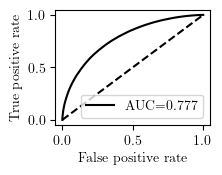

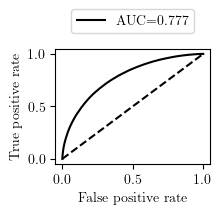


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Hard
a, b =  0.3284 0.9523


y_proba  Neg_1  Pos_1  mProb_1      TN     FP     FN     TP      FP/P
3283   0.3284   27.0   27.0      0.5  626279  50165  80882  45374  0.397328

c, d =  8 45374
a, b =  0.4396 0.6959


y_proba  Neg_10  Pos_10  mProb_10      TN     FP     FN     TP      FP/P
4395   0.4396   145.0   146.0  0.501718  654375  22069  97448  28808  0.174796

c, d =  8518 28808
a, b =  0.4664 0.6152


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP     FP/P
4663   0.4664   250.0   250.0       0.5  658296  18148  100550  25706  0.14374

c, d =  13218 25706
a, b =  0.5054 0.5519


y_proba  Neg_50  Pos_50  mProb_50      TN     FP      FN     TP  \
5053   0.5054   503.0   509.0  0.502964  662915  13529  104491  21765   

          FP/P  
5053  0.107155

c, d =  17718 21765
a, b =  0.5145 0.5506


y_proba  Neg_100  Pos_100  mProb_100      TN     FP      FN     TP  \
5144   0.5145    935.0    935.0        0.5  663854  12590  105354  20902   

          FP/P  
5144  0.099718

c, d =  17825 20902
a, b =  0.5228 0.5441


y_proba  Neg_200  Pos_200  mProb_200      TN     FP      FN     TP  \
5227   0.5228   1780.0   1785.0   0.500701  664593  11851  106109  20147   

          FP/P  
5227  0.093865

c, d =  18360 20147
a, b =  0.5338 0.5337


y_proba  Neg_500  Pos_500  mProb_500      TN     FP      FN     TP  \
5337   0.5338   4220.0   4221.0   0.500059  665551  10893  107070  19186   

          FP/P  
5337  0.086277

c, d =  19195 19186
a, b =  0.531 0.5312


y_proba  Neg_1000  Pos_1000  mProb_1000      TN     FP      FN     TP  \
5309    0.531    8637.0    8639.0    0.500058  665319  11125  106817  19439   

          FP/P  
5309  0.088115

c, d =  19422 19439
a, b =  0.5404 0.5404


y_proba  Neg_2000  Pos_2000  mProb_2000      TN     FP      FN     TP  \
5403   0.5404   17066.0   17066.0         0.5  666087  10357  107604  18652   

          FP/P  
5403  0.082032

c, d =  18652 18652


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Medium
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Medium
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Medium
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Medium
KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Medium  has  111789  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Medium
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Medium
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Medium
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Medium
ROC() for  KBFC_alpha_0_5_gamma_0_0_0_

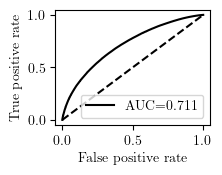

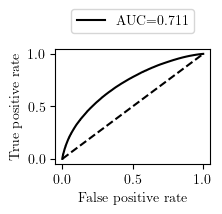


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Medium
a, b =  0.0045 0.8805


y_proba  Neg_1  Pos_1  mProb_1  TN      FP  FN      TP      FP/P
6   0.0045    0.0    1.0      1.0  11  676433   1  126255  5.357631

c, d =  3 126255
a, b =  0.4342 0.8213


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
4301   0.4342   113.0   118.0  0.510823  662454  13990  112301  13955   

          FP/P  
4301  0.110807

c, d =  17 13955
a, b =  0.4648 0.7838


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
4607   0.4648   177.0   190.0  0.517711  666323  10121  115195  11061   

          FP/P  
4607  0.080163

c, d =  89 11061
a, b =  0.4931 0.6134


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
4890   0.4931   424.0   424.0       0.5  668997  7447  117557  8699  0.058983

c, d =  2425 8699
a, b =  0.498 0.5326


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
4939    0.498    803.0    812.0   0.502786  669391  7053  117964  8292   

          FP/P  
4939  0.055863

c, d =  5975 8292
a, b =  0.5236 0.5298


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
5195   0.5236   1302.0   1311.0   0.501722  671257  5187  119727  6529   

          FP/P  
5195  0.041083

c, d =  6143 6529
a, b =  0.5257 0.5309


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
5216   0.5257   3124.0   3126.0    0.50016  671381  5063  119844  6412   

          FP/P  
5216  0.040101

c, d =  6078 6412
a, b =  0.5295 0.5299


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
5254   0.5295    6174.0    6174.0         0.5  671637  4807  120099  6157   

          FP/P  
5254  0.038073

c, d =  6131 6157
a, b =  0.5513 0.5512


y_proba  Neg_2000  Pos_2000  mProb_2000      TN    FP      FN    TP  \
5472   0.5513   10905.0   10907.0    0.500046  672768  3676  121321  4935   

          FP/P  
5472  0.029115

c, d =  4941 4935


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Easy
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Easy
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Easy
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Easy
KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Easy  has  64988  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Easy
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Easy
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Easy
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Easy
ROC() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Easy
False
False
./Imag

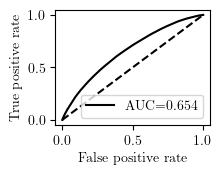

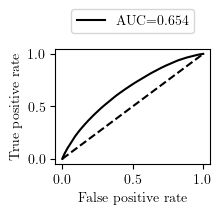


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_0_1_0_1_Easy
a, b =  0.3201 0.51


y_proba  Neg_1  Pos_1  mProb_1      TN     FP      FN    TP      FP/P
2958   0.3201   26.0   31.0  0.54386  660177  16267  117428  8828  0.128841

c, d =  0 8828
a, b =  0.4035 0.4943


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP      FP/P
3790   0.4035    29.0    42.0  0.591549  674942  1502  125211  1045  0.011896

c, d =  6 1045
a, b =  0.4116 0.4887


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN   TP      FP/P
3871   0.4116    41.0    44.0  0.517647  675291  1153  125418  838  0.009132

c, d =  12 838
a, b =  0.4468 0.481


y_proba  Neg_50  Pos_50  mProb_50      TN   FP      FN   TP      FP/P
4184   0.4468    84.0    84.0       0.5  676130  314  125994  262  0.002487

c, d =  33 262
a, b =  nan 0.4733
a, b =  nan 0.4622
a, b =  nan 0.4399
a, b =  nan 0.4126
a, b =  nan 0.3623

Create_Files_for_Value_Counts_y_Proba
Create_Files_for_Analyze_Prediction()
Create_Files_for_Lengths_of_fpr_tpr
Create_Files_for_ROC_AUC
Create_Files_for_FP_P
Analyze_Results()

-------------------------------------

BRFC_alpha_0_5_0_1_1_0_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_0_1_1_0_Hard
Analyze_Prediction() for  BRFC_alpha_0_5_0_1_1_0_Hard
Value_Counts_y_proba() for  BRFC_alpha_0_5_0_1_1_0_Hard
FP_P_Locate() for  BRFC_alpha_0_5_0_1_1_0_Hard
BRFC_alpha_0_5_0_1_1_0_Hard  has  1315  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_0_1_1_0_Hard
Plot_Prediction_Wide() for  BRFC_alpha_0_5_0_1_1_0_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_1_0_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_1_0_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_1_0_Hard
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_0_1_1_0_H

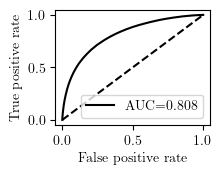

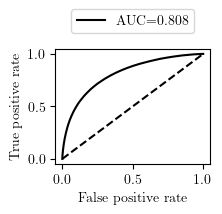


Evaluate_Model() for  BRFC_alpha_0_5_0_1_1_0_Hard
a, b =  0.1717 0.9632


y_proba  Neg_1  Pos_1  mProb_1     TN      FP    FN      TP      FP/P
178   0.1717    0.0    1.0      1.0  70430  606014  1096  125160  4.799883

c, d =  976 125160
a, b =  0.6812 0.8585


y_proba  Neg_10  Pos_10  mProb_10      TN     FP     FN     TP      FP/P
1782   0.6812    13.0    13.0       0.5  631925  44519  74369  51887  0.352609

c, d =  13417 51887
a, b =  0.734 0.8147


y_proba  Neg_20  Pos_20  mProb_20      TN     FP     FN     TP      FP/P
1979    0.734    99.0    99.0       0.5  649387  27057  86063  40193  0.214303

c, d =  21728 40193
a, b =  0.7608 0.763


y_proba  Neg_50  Pos_50  mProb_50      TN     FP     FN     TP      FP/P
2083   0.7608  2441.0  2444.0  0.500307  657184  19260  93133  33123  0.152547

c, d =  33111 33123
a, b =  0.7627 0.7625


y_proba  Neg_100  Pos_100  mProb_100      TN     FP     FN     TP  \
2092   0.7627   4736.0   4820.0   0.504395  657204  19240  93145  33111   

          FP/P  
2092  0.152389

c, d =  33112 33111
a, b =  0.7673 0.7672


y_proba  Neg_200  Pos_200  mProb_200      TN     FP     FN     TP  \
2108   0.7673  11325.0  11707.0   0.508293  657304  19140  93241  33015   

          FP/P  
2108  0.151597

c, d =  33016 33015
a, b =  0.7693 0.7692


y_proba  Neg_500  Pos_500  mProb_500      TN     FP     FN     TP  \
2116   0.7693  31052.0  31726.0   0.505368  657329  19115  93255  33001   

          FP/P  
2116  0.151399

c, d =  33001 33001
a, b =  nan 0.7792
a, b =  nan 0.6458


-------------------------------------

BRFC_alpha_0_5_0_1_1_0_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_0_1_1_0_Medium
Analyze_Prediction() for  BRFC_alpha_0_5_0_1_1_0_Medium
Value_Counts_y_proba() for  BRFC_alpha_0_5_0_1_1_0_Medium
FP_P_Locate() for  BRFC_alpha_0_5_0_1_1_0_Medium
BRFC_alpha_0_5_0_1_1_0_Medium  has  13423  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_0_1_1_0_Medium
Plot_Prediction_Wide() for  BRFC_alpha_0_5_0_1_1_0_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_1_0_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_1_0_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_1_0_Medium
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_0_1_1_0_Medium
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_0_1_1_0_Medium
ROC() for  BRFC_alpha_0_5_0_1_1_0_Medium
False
False
./Images/Run_0_1_1_0/BRFC_alpha_0_5_0_1_1_0_Medium_ROC.png

ROC() for  BRFC_al

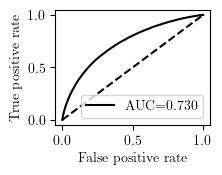

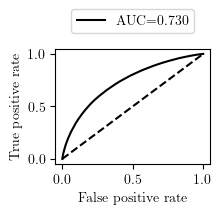


Evaluate_Model() for  BRFC_alpha_0_5_0_1_1_0_Medium
a, b =  0.0478 0.9983


y_proba  Neg_1  Pos_1  mProb_1    TN      FP  FN      TP      FP/P
180   0.0478    1.0    1.0      0.5  4244  672200  96  126160  5.324103

c, d =  126 126160
a, b =  0.8396 0.995


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
7918   0.8396   934.0   975.0  0.510739  662649  13795  111312  14944   

          FP/P  
7918  0.109262

c, d =  132 14944
a, b =  0.8391 0.968


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
7913   0.8391  1027.0  1030.0  0.500729  662612  13832  111288  14968   

          FP/P  
7913  0.109555

c, d =  1005 14968
a, b =  0.8576 0.9655


y_proba  Neg_50  Pos_50  mProb_50      TN     FP      FN     TP  \
8093   0.8576  1128.0  1163.0  0.507639  666297  10147  114414  11842   

          FP/P  
8093  0.080368

c, d =  1037 11842
a, b =  0.8849 0.8848


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
8352   0.8849   1879.0   2017.0    0.51771  670494  5950  118313  7943   

          FP/P  
8352  0.047126

c, d =  7943 7943
a, b =  0.8859 0.8858


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
8362   0.8859   2526.0   2536.0   0.500988  670653  5791  118441  7815   

          FP/P  
8362  0.045867

c, d =  7816 7815
a, b =  0.8832 0.8831


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
8335   0.8832   7014.0   7258.0   0.508548  670367  6077  118239  8017   

          FP/P  
8335  0.048132

c, d =  8023 8017
a, b =  0.8848 0.8847


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
8351   0.8848   13423.0   13427.0    0.500074  670493  5951  118313  7943   

          FP/P  
8351  0.047134

c, d =  7945 7943
a, b =  nan 0.8561


-------------------------------------

BRFC_alpha_0_5_0_1_1_0_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_0_1_1_0_Easy
Analyze_Prediction() for  BRFC_alpha_0_5_0_1_1_0_Easy
Value_Counts_y_proba() for  BRFC_alpha_0_5_0_1_1_0_Easy
FP_P_Locate() for  BRFC_alpha_0_5_0_1_1_0_Easy
BRFC_alpha_0_5_0_1_1_0_Easy  has  63484  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_0_1_1_0_Easy
Plot_Prediction_Wide() for  BRFC_alpha_0_5_0_1_1_0_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_1_0_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_1_0_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_1_0_Easy
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_0_1_1_0_Easy
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_0_1_1_0_Easy
ROC() for  BRFC_alpha_0_5_0_1_1_0_Easy
False
False
./Images/Run_0_1_1_0/BRFC_alpha_0_5_0_1_1_0_Easy_ROC.png

ROC() for  BRFC_alpha_0_5_0_1_1_0_Easy
False
False
./Images/Run_0_1_1

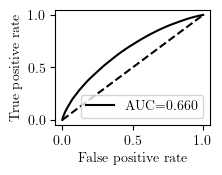

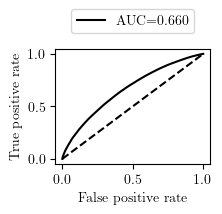


Evaluate_Model() for  BRFC_alpha_0_5_0_1_1_0_Easy
a, b =  0.7735 0.9991


y_proba  Neg_1  Pos_1   mProb_1      TN     FP      FN     TP      FP/P
7729   0.7735   15.0   16.0  0.516129  640692  35752  106735  19521  0.283171

c, d =  193 19521
a, b =  0.9205 0.9957


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP      FP/P
9199   0.9205    91.0    91.0       0.5  672830  3614  122668  3588  0.028624

c, d =  248 3588
a, b =  0.9233 0.996


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN    TP      FP/P
9227   0.9233   156.0   169.0      0.52  673041  3403  122846  3410  0.026953

c, d =  243 3410
a, b =  0.9383 0.9656


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
9377   0.9383   302.0   305.0  0.502471  674109  2335  123722  2534  0.018494

c, d =  1195 2534
a, b =  0.9595 0.9626


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
9589   0.9595    443.0    443.0        0.5  675254  1190  124785  1471   

          FP/P  
9589  0.009425

c, d =  1332 1471
a, b =  0.9619 0.9625


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
9613   0.9619    889.0    889.0        0.5  675361  1083  124894  1362   

          FP/P  
9613  0.008578

c, d =  1337 1362
a, b =  0.9587 0.9588


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
9581   0.9587   2273.0   2273.0        0.5  675211  1233  124760  1496   

          FP/P  
9581  0.009766

c, d =  1494 1496
a, b =  nan 0.9435
a, b =  nan 0.8935


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Hard
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Hard
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Hard
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Hard
KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Hard  has  105984  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Hard
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Hard
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Hard
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Hard
ROC() for  KBFC_alpha_0_5_ga

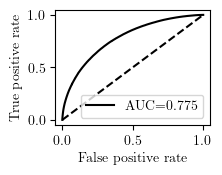

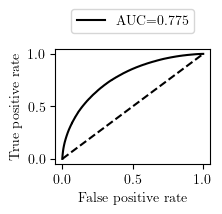


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Hard
a, b =  0.3489 0.989


y_proba  Neg_1  Pos_1   mProb_1      TN     FP     FN     TP      FP/P
3486   0.3489   21.0   26.0  0.553191  630515  45929  83460  42796  0.363777

c, d =  0 42796
a, b =  0.4874 0.6328


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP     FP/P
4871   0.4874   113.0   117.0  0.508696  659912  16532  101942  24314  0.13094

c, d =  12871 24314
a, b =  0.4998 0.5924


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
4995   0.4998   199.0   205.0  0.507426  661395  15049  103189  23067   

          FP/P  
4995  0.119194

c, d =  15454 23067
a, b =  0.5016 0.5556


y_proba  Neg_50  Pos_50  mProb_50      TN     FP      FN     TP  \
5013   0.5016   507.0   507.0       0.5  661573  14871  103374  22882   

          FP/P  
5013  0.117785

c, d =  18150 22882
a, b =  0.5342 0.5354


y_proba  Neg_100  Pos_100  mProb_100      TN     FP      FN     TP  \
5339   0.5342    871.0    875.0   0.501145  664835  11609  106269  19987   

          FP/P  
5339  0.091948

c, d =  19876 19987
a, b =  0.5376 0.5375


y_proba  Neg_200  Pos_200  mProb_200      TN     FP      FN     TP  \
5373   0.5376   1719.0   1727.0   0.501161  665115  11329  106577  19679   

         FP/P  
5373  0.08973

c, d =  19684 19679
a, b =  0.5414 0.5413


y_proba  Neg_500  Pos_500  mProb_500      TN     FP      FN     TP  \
5411   0.5414   4160.0   4168.0    0.50048  665441  11003  106908  19348   

          FP/P  
5411  0.087148

c, d =  19357 19348
a, b =  0.5434 0.5433


y_proba  Neg_1000  Pos_1000  mProb_1000      TN     FP      FN     TP  \
5431   0.5434    8313.0    8320.0     0.50021  665598  10846  107071  19185   

          FP/P  
5431  0.085905

c, d =  19191 19185
a, b =  0.5537 0.5538


y_proba  Neg_2000  Pos_2000  mProb_2000      TN     FP      FN     TP  \
5534   0.5537   16480.0   16481.0    0.500015  666379  10065  107945  18311   

          FP/P  
5534  0.079719

c, d =  18300 18311


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Medium
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Medium
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Medium
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Medium
KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Medium  has  112126  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Medium
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Medium
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Medium
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Medium
ROC() for  KBFC_alpha_0_5_gamma_0_0_0_

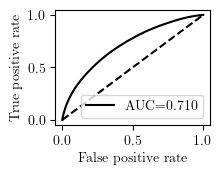

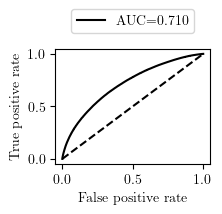


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Medium
a, b =  0.0055 0.8874


y_proba  Neg_1  Pos_1  mProb_1  TN      FP  FN      TP      FP/P
10   0.0055    0.0    1.0      1.0  15  676429   2  126254  5.357599

c, d =  0 126254
a, b =  0.4309 0.8064


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
4262   0.4309   121.0   121.0       0.5  661928  14516  111863  14393   

          FP/P  
4262  0.114973

c, d =  36 14393
a, b =  0.4566 0.7369


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
4519   0.4566   209.0   214.0   0.50591  665267  11177  114477  11779   

          FP/P  
4519  0.088526

c, d =  251 11779
a, b =  0.5032 0.5631


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
4985   0.5032   384.0   384.0       0.5  669821  6623  118425  7831  0.052457

c, d =  4192 7831
a, b =  0.5169 0.5533


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
5122   0.5169    681.0    682.0   0.500367  670833  5611  119374  6882   

          FP/P  
5122  0.044441

c, d =  4726 6882
a, b =  0.5209 0.5493


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
5162   0.5209   1336.0   1339.0   0.500561  671101  5343  119666  6590   

          FP/P  
5162  0.042319

c, d =  4926 6590
a, b =  0.5337 0.5338


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
5290   0.5337   3008.0   3011.0   0.500249  671886  4558  120486  5770   

          FP/P  
5290  0.036101

c, d =  5761 5770
a, b =  0.5336 0.5354


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
5289   0.5336    6111.0    6116.0    0.500204  671881  4563  120482  5774   

          FP/P  
5289  0.036141

c, d =  5672 5774
a, b =  0.5543 0.5542


y_proba  Neg_2000  Pos_2000  mProb_2000      TN    FP      FN    TP  \
5496   0.5543   10778.0   10780.0    0.500046  673003  3441  121579  4677   

          FP/P  
5496  0.027254

c, d =  4684 4677


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Easy
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Easy
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Easy
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Easy
KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Easy  has  65020  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Easy
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Easy
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Easy
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Easy
ROC() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Easy
False
False
./Imag

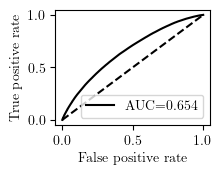

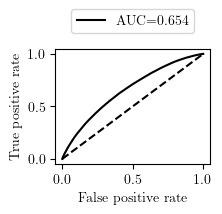


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_0_Easy
a, b =  0.0249 0.5049


y_proba  Neg_1  Pos_1  mProb_1  TN      FP  FN      TP     FP/P
10   0.0249    0.0    1.0      1.0  35  676409   1  126255  5.35744

c, d =  3 126255
a, b =  0.4013 0.5005


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP     FP/P
3770   0.4013    32.0    33.0  0.507692  674785  1659  125114  1142  0.01314

c, d =  6 1142
a, b =  0.4155 0.4904


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN   TP     FP/P
3906   0.4155    73.0    74.0  0.503401  675391  1053  125484  772  0.00834

c, d =  18 772
a, b =  0.4708 0.4827


y_proba  Neg_50  Pos_50  mProb_50      TN  FP      FN  TP      FP/P
4320   0.4708    72.0    73.0  0.503448  676355  89  126183  73  0.000705

c, d =  35 73
a, b =  nan 0.4743
a, b =  nan 0.4647
a, b =  nan 0.4423
a, b =  nan 0.4135
a, b =  nan 0.363

Create_Files_for_Value_Counts_y_Proba
Create_Files_for_Analyze_Prediction()
Create_Files_for_Lengths_of_fpr_tpr
Create_Files_for_ROC_AUC
Create_Files_for_FP_P
Analyze_Results()

-------------------------------------

BRFC_alpha_0_5_0_1_1_1_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_0_1_1_1_Hard
Analyze_Prediction() for  BRFC_alpha_0_5_0_1_1_1_Hard
Value_Counts_y_proba() for  BRFC_alpha_0_5_0_1_1_1_Hard
FP_P_Locate() for  BRFC_alpha_0_5_0_1_1_1_Hard
BRFC_alpha_0_5_0_1_1_1_Hard  has  1440  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_0_1_1_1_Hard
Plot_Prediction_Wide() for  BRFC_alpha_0_5_0_1_1_1_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_1_1_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_1_1_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_1_1_Hard
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_0_1_1_1_Har

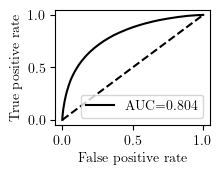

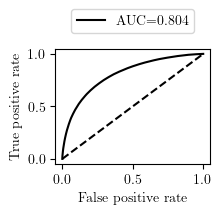


Evaluate_Model() for  BRFC_alpha_0_5_0_1_1_1_Hard
a, b =  0.1773 0.9833


y_proba  Neg_1  Pos_1  mProb_1     TN      FP    FN      TP      FP/P
221   0.1773    0.0    1.0      1.0  72032  604412  1123  125133  4.787194

c, d =  394 125133
a, b =  0.701 0.889


y_proba  Neg_10  Pos_10  mProb_10      TN     FP     FN     TP      FP/P
2033    0.701    10.0    17.0   0.62963  637967  38477  79469  46787  0.304754

c, d =  8027 46787
a, b =  0.7623 0.818


y_proba  Neg_20  Pos_20  mProb_20      TN     FP     FN     TP      FP/P
2291   0.7623    50.0    57.0   0.53271  656587  19857  94085  32171  0.157276

c, d =  20743 32171
a, b =  0.7667 0.7663


y_proba  Neg_50  Pos_50  mProb_50      TN     FP     FN     TP      FP/P
2306   0.7667  2319.0  2364.0  0.504805  656722  19722  94200  32056  0.156206

c, d =  32074 32056
a, b =  0.774 0.7738


y_proba  Neg_100  Pos_100  mProb_100      TN     FP     FN     TP  \
2331    0.774   4570.0   4705.0   0.507278  658897  17547  96434  29822   

         FP/P  
2331  0.13898

c, d =  29824 29822
a, b =  0.7763 0.776


y_proba  Neg_200  Pos_200  mProb_200      TN     FP     FN     TP  \
2341   0.7763   9178.0   9487.0   0.508278  658956  17488  96511  29745   

          FP/P  
2341  0.138512

c, d =  29745 29745
a, b =  0.7783 0.778


y_proba  Neg_500  Pos_500  mProb_500      TN     FP     FN     TP  \
2351   0.7783  28827.0  29374.0   0.504699  658992  17452  96555  29701   

          FP/P  
2351  0.138227

c, d =  29706 29701
a, b =  0.7923 0.7921


y_proba  Neg_1000  Pos_1000  mProb_1000      TN     FP      FN     TP  \
2409   0.7923   51385.0   53699.0     0.51101  663030  13414  101012  25244   

          FP/P  
2409  0.106244

c, d =  25244 25244
a, b =  nan 0.6726


-------------------------------------

BRFC_alpha_0_5_0_1_1_1_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_0_1_1_1_Medium
Analyze_Prediction() for  BRFC_alpha_0_5_0_1_1_1_Medium
Value_Counts_y_proba() for  BRFC_alpha_0_5_0_1_1_1_Medium
FP_P_Locate() for  BRFC_alpha_0_5_0_1_1_1_Medium
BRFC_alpha_0_5_0_1_1_1_Medium  has  15009  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_0_1_1_1_Medium
Plot_Prediction_Wide() for  BRFC_alpha_0_5_0_1_1_1_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_1_1_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_1_1_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_1_1_Medium
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_0_1_1_1_Medium
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_0_1_1_1_Medium
ROC() for  BRFC_alpha_0_5_0_1_1_1_Medium
False
False
./Images/Run_0_1_1_1/BRFC_alpha_0_5_0_1_1_1_Medium_ROC.png

ROC() for  BRFC_alpha_0_5_0_1_1_1_Med

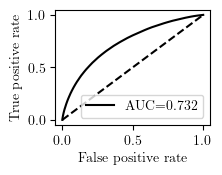

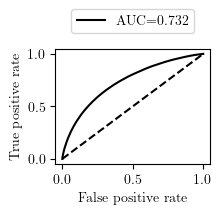


Evaluate_Model() for  BRFC_alpha_0_5_0_1_1_1_Medium
a, b =  0.0214 0.998


y_proba  Neg_1  Pos_1   mProb_1    TN      FP  FN      TP      FP/P
56   0.0214    1.0    2.0  0.666667  1690  674754  34  126222  5.344332

c, d =  189 126222
a, b =  0.8298 0.9722


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
7852   0.8298  1043.0  1047.0  0.500957  659235  17209  108250  18006   

          FP/P  
7852  0.136302

c, d =  943 18006
a, b =  0.8591 0.968


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
8134   0.8591   914.0   973.0  0.515633  665519  10925  113318  12938   

          FP/P  
8134  0.086531

c, d =  1306 12938
a, b =  0.8774 0.9655


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN     TP      FP/P
8310   0.8774  1102.0  1171.0  0.515178  668641  7803  116234  10022  0.061803

c, d =  1334 10022
a, b =  0.8749 0.8814


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN     TP  \
8285   0.8749   2179.0   2213.0   0.503871  668339  8105  115961  10295   

          FP/P  
8285  0.064195

c, d =  9091 10295
a, b =  0.8793 0.8818


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
8329   0.8793   3495.0   3559.0   0.504536  668807  7637  116353  9903   

          FP/P  
8329  0.060488

c, d =  9061 9903
a, b =  0.8836 0.8835


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
8367   0.8836   7456.0   7631.0     0.5058  669690  6754  117308  8948   

          FP/P  
8367  0.053494

c, d =  8948 8948
a, b =  0.8892 0.889


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
8420   0.8892   13818.0   13827.0    0.500163  670133  6311  117697  8559   

          FP/P  
8420  0.049986

c, d =  8566 8559
a, b =  nan 0.8608


-------------------------------------

BRFC_alpha_0_5_0_1_1_1_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_0_1_1_1_Easy
Analyze_Prediction() for  BRFC_alpha_0_5_0_1_1_1_Easy
Value_Counts_y_proba() for  BRFC_alpha_0_5_0_1_1_1_Easy
FP_P_Locate() for  BRFC_alpha_0_5_0_1_1_1_Easy
BRFC_alpha_0_5_0_1_1_1_Easy  has  63484  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_0_1_1_1_Easy
Plot_Prediction_Wide() for  BRFC_alpha_0_5_0_1_1_1_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_1_1_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_1_1_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_0_1_1_1_Easy
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_0_1_1_1_Easy
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_0_1_1_1_Easy
ROC() for  BRFC_alpha_0_5_0_1_1_1_Easy
False
False
./Images/Run_0_1_1_1/BRFC_alpha_0_5_0_1_1_1_Easy_ROC.png

ROC() for  BRFC_alpha_0_5_0_1_1_1_Easy
False
False
./Images/Run_0_1_1

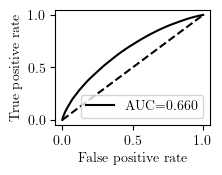

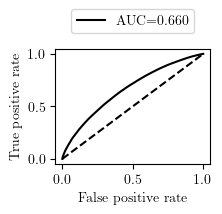


Evaluate_Model() for  BRFC_alpha_0_5_0_1_1_1_Easy
a, b =  0.7735 0.9991


y_proba  Neg_1  Pos_1   mProb_1      TN     FP      FN     TP      FP/P
7729   0.7735   15.0   16.0  0.516129  640692  35752  106735  19521  0.283171

c, d =  193 19521
a, b =  0.9205 0.9957


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP      FP/P
9199   0.9205    91.0    91.0       0.5  672830  3614  122668  3588  0.028624

c, d =  248 3588
a, b =  0.9233 0.996


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN    TP      FP/P
9227   0.9233   156.0   169.0      0.52  673041  3403  122846  3410  0.026953

c, d =  243 3410
a, b =  0.9383 0.9656


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
9377   0.9383   302.0   305.0  0.502471  674109  2335  123722  2534  0.018494

c, d =  1195 2534
a, b =  0.9595 0.9626


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
9589   0.9595    443.0    443.0        0.5  675254  1190  124785  1471   

          FP/P  
9589  0.009425

c, d =  1332 1471
a, b =  0.9619 0.9625


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
9613   0.9619    889.0    889.0        0.5  675361  1083  124894  1362   

          FP/P  
9613  0.008578

c, d =  1337 1362
a, b =  0.9587 0.9588


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
9581   0.9587   2273.0   2273.0        0.5  675211  1233  124760  1496   

          FP/P  
9581  0.009766

c, d =  1494 1496
a, b =  nan 0.9435
a, b =  nan 0.8935


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Hard
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Hard
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Hard
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Hard
KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Hard  has  105924  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Hard
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Hard
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Hard
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Hard
ROC() for  KBFC_alpha_0_5_ga

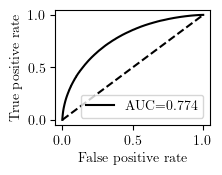

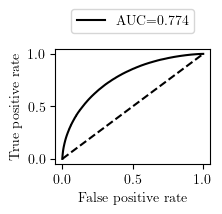


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Hard
a, b =  0.3508 0.9624


y_proba  Neg_1  Pos_1   mProb_1      TN     FP     FN     TP      FP/P
3507   0.3508   21.0   23.0  0.522727  631928  44516  84175  42081  0.352585

c, d =  2 42081
a, b =  0.4683 0.6887


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
4682   0.4683   109.0   110.0  0.502283  658060  18384  100405  25851   

          FP/P  
4682  0.145609

c, d =  8938 25851
a, b =  0.4808 0.5935


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
4807   0.4808   220.0   229.0  0.510022  659727  16717  101781  24475   

          FP/P  
4807  0.132406

c, d =  14733 24475
a, b =  0.5068 0.5577


y_proba  Neg_50  Pos_50  mProb_50      TN     FP      FN     TP  \
5067   0.5068   518.0   521.0  0.501444  662692  13752  104414  21842   

          FP/P  
5067  0.108922

c, d =  17343 21842
a, b =  0.5062 0.5558


y_proba  Neg_100  Pos_100  mProb_100      TN     FP      FN     TP  \
5061   0.5062   1016.0   1019.0   0.500737  662636  13808  104346  21910   

          FP/P  
5061  0.109365

c, d =  17516 21910
a, b =  0.5119 0.5376


y_proba  Neg_200  Pos_200  mProb_200      TN     FP      FN     TP  \
5118   0.5119   1956.0   1957.0   0.500128  663196  13248  104938  21318   

         FP/P  
5118  0.10493

c, d =  19016 21318
a, b =  0.526 0.5259


y_proba  Neg_500  Pos_500  mProb_500      TN     FP      FN     TP  \
5259    0.526   4537.0   4543.0    0.50033  664528  11916  106274  19982   

         FP/P  
5259  0.09438

c, d =  19989 19982
a, b =  0.5325 0.5324


y_proba  Neg_1000  Pos_1000  mProb_1000      TN     FP      FN     TP  \
5324   0.5325    8832.0    8833.0    0.500028  665102  11342  106798  19458   

          FP/P  
5324  0.089833

c, d =  19466 19458
a, b =  0.5462 0.5461


y_proba  Neg_2000  Pos_2000  mProb_2000      TN     FP      FN     TP  \
5461   0.5462   17048.0   17050.0    0.500029  666235  10209  107961  18295   

         FP/P  
5461  0.08086

c, d =  18298 18295


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Medium
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Medium
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Medium
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Medium
KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Medium  has  111851  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Medium
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Medium
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Medium
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Medium
ROC() for  KBFC_alpha_0_5_gamma_0_0_0_

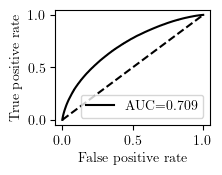

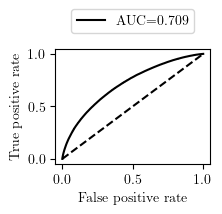


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Medium
a, b =  0.0047 0.8602


y_proba  Neg_1  Pos_1  mProb_1  TN      FP  FN      TP      FP/P
10   0.0047    0.0    1.0      1.0  14  676430   1  126255  5.357607

c, d =  6 126255
a, b =  0.4637 0.8491


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
4597   0.4637   101.0   101.0       0.5  666046  10398  115103  11153   

          FP/P  
4597  0.082356

c, d =  7 11153
a, b =  0.4719 0.7632


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN     TP      FP/P
4679   0.4719   195.0   197.0  0.502551  666937  9507  115837  10419  0.075299

c, d =  157 10419
a, b =  0.5069 0.5803


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
5029   0.5069   362.0   362.0       0.5  670009  6435  118505  7751  0.050968

c, d =  3527 7751
a, b =  0.5108 0.547


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
5068   0.5108    732.0    735.0   0.501022  670292  6152  118783  7473   

          FP/P  
5068  0.048726

c, d =  5129 7473
a, b =  0.5187 0.5297


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
5147   0.5187   1415.0   1418.0   0.500529  670857  5587  119391  6865   

          FP/P  
5147  0.044251

c, d =  6147 6865
a, b =  0.5268 0.5267


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
5228   0.5268   3229.0   3235.0   0.500464  671443  5001  119931  6325   

         FP/P  
5228  0.03961

c, d =  6341 6325
a, b =  0.5332 0.5336


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
5292   0.5332    6084.0    6086.0    0.500082  671814  4630  120315  5941   

          FP/P  
5292  0.036672

c, d =  5922 5941
a, b =  0.5565 0.5564


y_proba  Neg_2000  Pos_2000  mProb_2000      TN    FP      FN    TP  \
5525   0.5565   10552.0   10566.0    0.500331  673031  3413  121613  4643   

          FP/P  
5525  0.027032

c, d =  4646 4643


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Easy
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Easy
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Easy
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Easy
KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Easy  has  65020  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Easy
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Easy
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Easy
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Easy
ROC() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Easy
False
False
./Imag

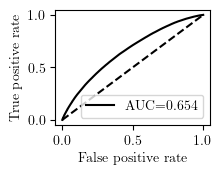

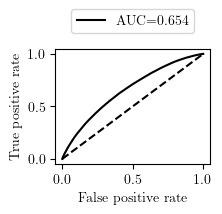


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_0_1_1_1_Easy
a, b =  0.0249 0.5049


y_proba  Neg_1  Pos_1  mProb_1  TN      FP  FN      TP     FP/P
10   0.0249    0.0    1.0      1.0  35  676409   1  126255  5.35744

c, d =  3 126255
a, b =  0.4013 0.5005


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP     FP/P
3770   0.4013    32.0    33.0  0.507692  674785  1659  125114  1142  0.01314

c, d =  6 1142
a, b =  0.4155 0.4904


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN   TP     FP/P
3906   0.4155    73.0    74.0  0.503401  675391  1053  125484  772  0.00834

c, d =  18 772
a, b =  0.4708 0.4827


y_proba  Neg_50  Pos_50  mProb_50      TN  FP      FN  TP      FP/P
4320   0.4708    72.0    73.0  0.503448  676355  89  126183  73  0.000705

c, d =  35 73
a, b =  nan 0.4743
a, b =  nan 0.4647
a, b =  nan 0.4423
a, b =  nan 0.4135
a, b =  nan 0.363

Create_Files_for_Value_Counts_y_Proba
Create_Files_for_Analyze_Prediction()
Create_Files_for_Lengths_of_fpr_tpr
Create_Files_for_ROC_AUC
Create_Files_for_FP_P
Analyze_Results()

-------------------------------------

BRFC_alpha_0_5_1_0_0_0_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_1_0_0_0_Hard
Analyze_Prediction() for  BRFC_alpha_0_5_1_0_0_0_Hard
Value_Counts_y_proba() for  BRFC_alpha_0_5_1_0_0_0_Hard
FP_P_Locate() for  BRFC_alpha_0_5_1_0_0_0_Hard
BRFC_alpha_0_5_1_0_0_0_Hard  has  1271  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_1_0_0_0_Hard
Plot_Prediction_Wide() for  BRFC_alpha_0_5_1_0_0_0_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_0_0_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_0_0_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_0_0_Hard
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_1_0_0_0_Har

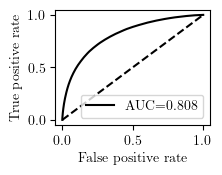

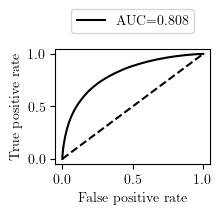


Evaluate_Model() for  BRFC_alpha_0_5_1_0_0_0_Hard
a, b =  0.1283 0.985


y_proba  Neg_1  Pos_1  mProb_1     TN      FP   FN      TP      FP/P
103   0.1283    1.0    1.0      0.5  34328  642116  398  125858  5.085826

c, d =  317 125858
a, b =  0.7222 0.8583


y_proba  Neg_10  Pos_10  mProb_10      TN     FP     FN     TP      FP/P
1858   0.7222    40.0    40.0       0.5  646118  30326  83732  42524  0.240195

c, d =  13550 42524
a, b =  0.7578 0.765


y_proba  Neg_20  Pos_20  mProb_20      TN     FP     FN     TP      FP/P
1990   0.7578  2253.0  2263.0  0.501107  654707  21737  90912  35344  0.172166

c, d =  33041 35344
a, b =  0.7625 0.7623


y_proba  Neg_50  Pos_50  mProb_50      TN     FP     FN     TP      FP/P
2005   0.7625  2371.0  2379.0  0.500842  656935  19509  93148  33108  0.154519

c, d =  33112 33108
a, b =  0.7643 0.7642


y_proba  Neg_100  Pos_100  mProb_100      TN     FP     FN     TP  \
2012   0.7643   4694.0   4745.0   0.502702  656964  19480  93169  33087   

         FP/P  
2012  0.15429

c, d =  33087 33087
a, b =  0.7665 0.7662


y_proba  Neg_200  Pos_200  mProb_200      TN     FP     FN     TP  \
2021   0.7665  11347.0  11657.0   0.506738  657010  19434  93220  33036   

          FP/P  
2021  0.153925

c, d =  33036 33036
a, b =  0.7678 0.7677


y_proba  Neg_500  Pos_500  mProb_500      TN     FP     FN     TP  \
2026   0.7678  31206.0  31728.0   0.504147  657035  19409  93250  33006   

          FP/P  
2026  0.153727

c, d =  33007 33006
a, b =  nan 0.771
a, b =  nan 0.6296


-------------------------------------

BRFC_alpha_0_5_1_0_0_0_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_1_0_0_0_Medium
Analyze_Prediction() for  BRFC_alpha_0_5_1_0_0_0_Medium
Value_Counts_y_proba() for  BRFC_alpha_0_5_1_0_0_0_Medium
FP_P_Locate() for  BRFC_alpha_0_5_1_0_0_0_Medium
BRFC_alpha_0_5_1_0_0_0_Medium  has  12313  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_1_0_0_0_Medium
Plot_Prediction_Wide() for  BRFC_alpha_0_5_1_0_0_0_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_0_0_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_0_0_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_0_0_Medium
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_1_0_0_0_Medium
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_1_0_0_0_Medium
ROC() for  BRFC_alpha_0_5_1_0_0_0_Medium
False
False
./Images/Run_1_0_0_0/BRFC_alpha_0_5_1_0_0_0_Medium_ROC.png

ROC() for  BRFC_alp

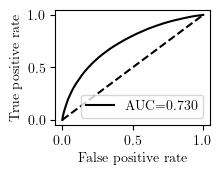

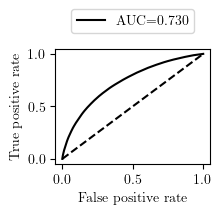


Evaluate_Model() for  BRFC_alpha_0_5_1_0_0_0_Medium
a, b =  0.0228 0.9986


y_proba  Neg_1  Pos_1  mProb_1    TN      FP  FN      TP      FP/P
42   0.0228    0.0    1.0      1.0  1081  675363  24  126232  5.349156

c, d =  112 126232
a, b =  0.8495 0.9858


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
7926   0.8495   865.0   971.0  0.528867  665069  11375  113234  13022   

          FP/P  
7926  0.090095

c, d =  317 13022
a, b =  0.8488 0.9582


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP     FP/P
7921   0.8488   963.0  1030.0  0.516809  665033  11411  113208  13048  0.09038

c, d =  1469 13048
a, b =  0.8675 0.9449


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
8094   0.8675  1166.0  1265.0  0.520362  668290  8154  116263  9993  0.064583

c, d =  2087 9993
a, b =  0.865 0.8889


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN     TP  \
8069    0.865   2358.0   2415.0   0.505971  668099  8345  116092  10164   

          FP/P  
8069  0.066096

c, d =  7290 10164
a, b =  0.8695 0.8694


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
8113   0.8695   3664.0   3745.0   0.505466  668420  8024  116328  9928   

          FP/P  
8113  0.063553

c, d =  9929 9928
a, b =  0.8728 0.8789


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
8145   0.8728   7830.0   7833.0   0.500096  669272  7172  117320  8936   

          FP/P  
8145  0.056805

c, d =  8539 8936
a, b =  0.8856 0.8855


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
8261   0.8856   13244.0   13255.0    0.500208  670766  5678  118812  7444   

          FP/P  
8261  0.044972

c, d =  7444 7444
a, b =  nan 0.8508


-------------------------------------

BRFC_alpha_0_5_1_0_0_0_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_1_0_0_0_Easy
Analyze_Prediction() for  BRFC_alpha_0_5_1_0_0_0_Easy
Value_Counts_y_proba() for  BRFC_alpha_0_5_1_0_0_0_Easy
FP_P_Locate() for  BRFC_alpha_0_5_1_0_0_0_Easy
BRFC_alpha_0_5_1_0_0_0_Easy  has  63566  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_1_0_0_0_Easy
Plot_Prediction_Wide() for  BRFC_alpha_0_5_1_0_0_0_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_0_0_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_0_0_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_0_0_Easy
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_1_0_0_0_Easy
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_1_0_0_0_Easy
ROC() for  BRFC_alpha_0_5_1_0_0_0_Easy
False
False
./Images/Run_1_0_0_0/BRFC_alpha_0_5_1_0_0_0_Easy_ROC.png

ROC() for  BRFC_alpha_0_5_1_0_0_0_Easy
False
False
./Images/Run_1_0_0

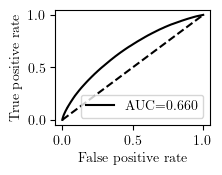

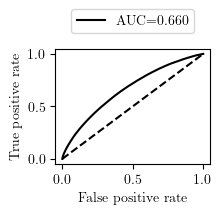


Evaluate_Model() for  BRFC_alpha_0_5_1_0_0_0_Easy
a, b =  0.792 0.9993


y_proba  Neg_1  Pos_1   mProb_1      TN     FP      FN     TP     FP/P
7916    0.792   13.0   14.0  0.518519  647265  29179  109398  16858  0.23111

c, d =  207 16858
a, b =  0.9101 0.9987


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP      FP/P
9097   0.9101    74.0    74.0       0.5  671814  4630  121971  4285  0.036672

c, d =  208 4285
a, b =  0.92 0.9978


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN    TP      FP/P
9196     0.92   162.0   167.0  0.507599  672693  3751  122649  3607  0.029709

c, d =  222 3607
a, b =  0.9206 0.967


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
9202   0.9206   401.0   402.0  0.500623  672730  3714  122682  3574  0.029416

c, d =  1137 3574
a, b =  0.9606 0.9658


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
9602   0.9606    439.0    442.0   0.501703  675329  1115  124875  1381   

          FP/P  
9602  0.008831

c, d =  1165 1381
a, b =  0.964 0.9643


y_proba  Neg_200  Pos_200  mProb_200      TN   FP      FN    TP  \
9636    0.964    819.0    823.0   0.501218  675478  966  125017  1239   

          FP/P  
9636  0.007651

c, d =  1229 1239
a, b =  0.9659 0.9658


y_proba  Neg_500  Pos_500  mProb_500      TN   FP      FN    TP  \
9654   0.9659   2076.0   2083.0   0.500842  675554  890  125093  1163   

          FP/P  
9654  0.007049

c, d =  1165 1163
a, b =  nan 0.942
a, b =  nan 0.892


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Hard
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Hard
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Hard
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Hard
KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Hard  has  105781  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Hard
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Hard
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Hard
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Hard
ROC() for  KBFC_alpha_0_5_gamm

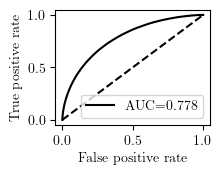

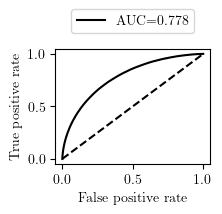


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Hard
a, b =  0.3342 0.9665


y_proba  Neg_1  Pos_1  mProb_1      TN     FP     FN     TP      FP/P
3340   0.3342   23.0   23.0      0.5  631937  44507  83546  42710  0.352514

c, d =  2 42710
a, b =  0.4139 0.6327


y_proba  Neg_10  Pos_10  mProb_10      TN     FP     FN     TP      FP/P
4137   0.4139   144.0   147.0  0.505155  652031  24413  95641  30615  0.193361

c, d =  11741 30615
a, b =  0.4584 0.5939


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
4582   0.4584   227.0   235.0  0.508658  658990  17454  100933  25323   

          FP/P  
4582  0.138243

c, d =  14023 25323
a, b =  0.4767 0.5279


y_proba  Neg_50  Pos_50  mProb_50      TN     FP      FN     TP  \
4765   0.4767   517.0   522.0  0.502406  661185  15259  102827  23429   

          FP/P  
4765  0.120858

c, d =  18818 23429
a, b =  0.5134 0.5273


y_proba  Neg_100  Pos_100  mProb_100      TN     FP      FN     TP  \
5132   0.5134    877.0    880.0   0.500854  664778  11666  106236  20020   

        FP/P  
5132  0.0924

c, d =  18879 20020
a, b =  0.5229 0.5228


y_proba  Neg_200  Pos_200  mProb_200      TN     FP      FN     TP  \
5227   0.5229   1622.0   1624.0   0.500308  665599  10845  107049  19207   

          FP/P  
5227  0.085897

c, d =  19215 19207
a, b =  0.5182 0.5183


y_proba  Neg_500  Pos_500  mProb_500      TN     FP      FN     TP  \
5180   0.5182   4186.0   4188.0   0.500119  665222  11222  106653  19603   

          FP/P  
5180  0.088883

c, d =  19591 19603
a, b =  0.5144 0.5143


y_proba  Neg_1000  Pos_1000  mProb_1000      TN     FP      FN     TP  \
5142   0.5144    8686.0    8690.0    0.500115  664880  11564  106333  19923   

          FP/P  
5142  0.091592

c, d =  19934 19923
a, b =  0.5297 0.5296


y_proba  Neg_2000  Pos_2000  mProb_2000      TN     FP      FN     TP  \
5295   0.5297   16656.0   16659.0    0.500045  666148  10296  107565  18691   

          FP/P  
5295  0.081549

c, d =  18700 18691


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Medium
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Medium
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Medium
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Medium
KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Medium  has  112328  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Medium
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Medium
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Medium
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Medium
ROC() for  KBFC_alpha_0_5_gamma_0_0_1_

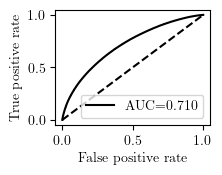

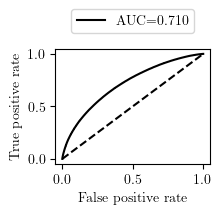


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Medium
a, b =  0.3262 0.8819


y_proba  Neg_1  Pos_1   mProb_1      TN     FP     FN     TP      FP/P
3228   0.3262   23.0   26.0  0.530612  635496  40948  96780  29476  0.324325

c, d =  3 29476
a, b =  0.4431 0.7593


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
4397   0.4431   107.0   111.0  0.509174  662863  13581  112617  13639   

          FP/P  
4397  0.107567

c, d =  179 13639
a, b =  0.4587 0.7513


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
4553   0.4587   238.0   240.0  0.502092  664881  11563  114222  12034   

          FP/P  
4553  0.091584

c, d =  221 12034
a, b =  0.4932 0.7294


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
4898   0.4932   417.0   419.0  0.501196  668472  7972  117265  8991  0.063142

c, d =  339 8991
a, b =  0.5367 0.5369


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
5333   0.5367    596.0    596.0        0.5  671733  4711  120229  6027   

          FP/P  
5333  0.037313

c, d =  6016 6027
a, b =  0.5327 0.5392


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
5293   0.5327   1235.0   1236.0   0.500202  671490  4954  120019  6237   

          FP/P  
5293  0.039238

c, d =  5865 6237
a, b =  0.5373 0.5382


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
5339   0.5373   2982.0   2985.0   0.500251  671778  4666  120265  5991   

          FP/P  
5339  0.036957

c, d =  5931 5991
a, b =  0.5482 0.5493


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
5448   0.5482    5567.0    5570.0    0.500135  672368  4076  120913  5343   

          FP/P  
5448  0.032284

c, d =  5284 5343
a, b =  0.5618 0.5617


y_proba  Neg_2000  Pos_2000  mProb_2000      TN    FP      FN    TP  \
5584   0.5618   10552.0   10555.0    0.500071  673057  3387  121651  4605   

          FP/P  
5584  0.026826

c, d =  4607 4605


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Easy
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Easy
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Easy
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Easy
KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Easy  has  65163  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Easy
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Easy
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Easy
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Easy
ROC() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Easy
False
False
./Imag

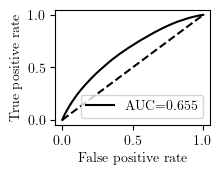

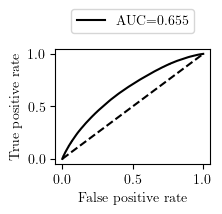


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_0_Easy
a, b =  0.3182 0.5215


y_proba  Neg_1  Pos_1   mProb_1      TN     FP      FN    TP      FP/P
2950   0.3182   25.0   26.0  0.509804  661389  15055  118047  8209  0.119242

c, d =  0 8209
a, b =  0.3838 0.4958


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP      FP/P
3606   0.3838    58.0    63.0  0.520661  673702  2742  124476  1780  0.021718

c, d =  7 1780
a, b =  0.4208 0.494


y_proba  Neg_20  Pos_20  mProb_20      TN   FP      FN   TP      FP/P
3965   0.4208    49.0    49.0       0.5  675620  824  125691  565  0.006526

c, d =  11 565
a, b =  nan 0.4825
a, b =  nan 0.475
a, b =  nan 0.4623
a, b =  nan 0.4396
a, b =  nan 0.4119
a, b =  nan 0.3612

Create_Files_for_Value_Counts_y_Proba
Create_Files_for_Analyze_Prediction()
Create_Files_for_Lengths_of_fpr_tpr
Create_Files_for_ROC_AUC
Create_Files_for_FP_P
Analyze_Results()

-------------------------------------

BRFC_alpha_0_5_1_0_0_1_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_1_0_0_1_Hard
Analyze_Prediction() for  BRFC_alpha_0_5_1_0_0_1_Hard
Value_Counts_y_proba() for  BRFC_alpha_0_5_1_0_0_1_Hard
FP_P_Locate() for  BRFC_alpha_0_5_1_0_0_1_Hard
BRFC_alpha_0_5_1_0_0_1_Hard  has  1365  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_1_0_0_1_Hard
Plot_Prediction_Wide() for  BRFC_alpha_0_5_1_0_0_1_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_0_1_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_0_1_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_0_1_Hard
Plot_Prediction_Zoom_Wide() for  BRFC_a

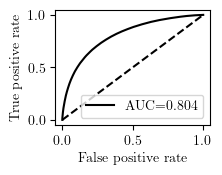

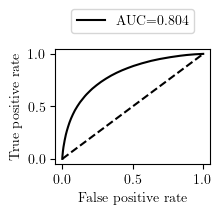


Evaluate_Model() for  BRFC_alpha_0_5_1_0_0_1_Hard
a, b =  0.212 0.9767


y_proba  Neg_1  Pos_1  mProb_1      TN      FP    FN      TP      FP/P
262    0.212    1.0    1.0      0.5  110220  566224  2245  124011  4.484729

c, d =  626 124011
a, b =  0.7215 0.873


y_proba  Neg_10  Pos_10  mProb_10      TN     FP     FN     TP      FP/P
2078   0.7215    24.0    24.0       0.5  645648  30796  85131  41125  0.243917

c, d =  9219 41125
a, b =  0.7323 0.7975


y_proba  Neg_20  Pos_20  mProb_20      TN     FP     FN     TP      FP/P
2121   0.7323    46.0    51.0  0.525773  648747  27697  87654  38602  0.219372

c, d =  24535 38602
a, b =  0.7682 0.7681


y_proba  Neg_50  Pos_50  mProb_50      TN     FP     FN     TP      FP/P
2261   0.7682  2428.0  2435.0   0.50072  657079  19365  94771  31485  0.153379

c, d =  31485 31485
a, b =  0.7733 0.7732


y_proba  Neg_100  Pos_100  mProb_100      TN     FP     FN     TP  \
2280   0.7733   6936.0   6937.0   0.500036  659311  17133  97030  29226   

        FP/P  
2280  0.1357

c, d =  29250 29226
a, b =  0.7658 0.7657


y_proba  Neg_200  Pos_200  mProb_200      TN     FP     FN     TP  \
2254   0.7658  11617.0  11647.0   0.500645  657037  19407  94729  31527   

          FP/P  
2254  0.153712

c, d =  31527 31527
a, b =  0.7732 0.7727


y_proba  Neg_500  Pos_500  mProb_500      TN     FP     FN     TP  \
2279   0.7732  28650.0  29266.0   0.505318  659282  17162  97006  29250   

         FP/P  
2279  0.13593

c, d =  29250 29250
a, b =  nan 0.7808
a, b =  nan 0.6558


-------------------------------------

BRFC_alpha_0_5_1_0_0_1_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_1_0_0_1_Medium
Analyze_Prediction() for  BRFC_alpha_0_5_1_0_0_1_Medium
Value_Counts_y_proba() for  BRFC_alpha_0_5_1_0_0_1_Medium
FP_P_Locate() for  BRFC_alpha_0_5_1_0_0_1_Medium
BRFC_alpha_0_5_1_0_0_1_Medium  has  13745  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_1_0_0_1_Medium
Plot_Prediction_Wide() for  BRFC_alpha_0_5_1_0_0_1_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_0_1_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_0_1_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_0_1_Medium
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_1_0_0_1_Medium
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_1_0_0_1_Medium
ROC() for  BRFC_alpha_0_5_1_0_0_1_Medium
False
False
./Images/Run_1_0_0_1/BRFC_alpha_0_5_1_0_0_1_Medium_ROC.png

ROC() for  BRFC_al

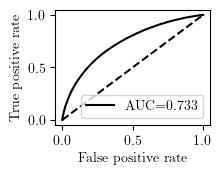

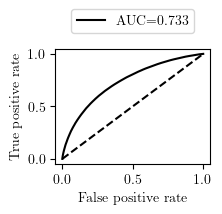


Evaluate_Model() for  BRFC_alpha_0_5_1_0_0_1_Medium
a, b =  0.0049 0.9975


y_proba  Neg_1  Pos_1  mProb_1   TN      FP  FN      TP      FP/P
6   0.0049    0.0    1.0      1.0  239  676205   4  126252  5.355825

c, d =  159 126252
a, b =  0.8396 0.978


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
7911   0.8396   962.0  1006.0  0.511179  662052  14392  110227  16029   

          FP/P  
7911  0.113991

c, d =  797 16029
a, b =  0.8391 0.9626


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
7906   0.8391  1068.0  1071.0  0.500701  662011  14433  110203  16053   

          FP/P  
7906  0.114315

c, d =  1311 16053
a, b =  0.8774 0.9371


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
8266   0.8774  1103.0  1137.0  0.507589  669038  7406  116512  9744  0.058659

c, d =  3231 9744
a, b =  0.8744 0.8834


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
8241   0.8744   2215.0   2220.0   0.500564  668756  7688  116259  9997   

          FP/P  
8241  0.060892

c, d =  8676 9997
a, b =  0.8793 0.8792


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
8284   0.8793   3480.0   3570.0   0.506383  669184  7260  116620  9636   

          FP/P  
8284  0.057502

c, d =  9644 9636
a, b =  0.8823 0.8822


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
8313   0.8823   7492.0   7705.0   0.507008  669957  6487  117477  8779   

         FP/P  
8313  0.05138

c, d =  8780 8779
a, b =  0.8826 0.8825


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
8316   0.8826   15165.0   15167.0    0.500033  669990  6454  117504  8752   

          FP/P  
8316  0.051118

c, d =  8752 8752
a, b =  nan 0.8548


-------------------------------------

BRFC_alpha_0_5_1_0_0_1_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_1_0_0_1_Easy
Analyze_Prediction() for  BRFC_alpha_0_5_1_0_0_1_Easy
Value_Counts_y_proba() for  BRFC_alpha_0_5_1_0_0_1_Easy
FP_P_Locate() for  BRFC_alpha_0_5_1_0_0_1_Easy
BRFC_alpha_0_5_1_0_0_1_Easy  has  63566  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_1_0_0_1_Easy
Plot_Prediction_Wide() for  BRFC_alpha_0_5_1_0_0_1_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_0_1_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_0_1_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_0_1_Easy
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_1_0_0_1_Easy
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_1_0_0_1_Easy
ROC() for  BRFC_alpha_0_5_1_0_0_1_Easy
False
False
./Images/Run_1_0_0_1/BRFC_alpha_0_5_1_0_0_1_Easy_ROC.png

ROC() for  BRFC_alpha_0_5_1_0_0_1_Easy
False
False
./Images/Run_1_0_0

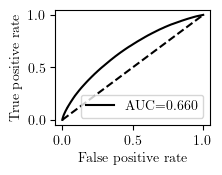

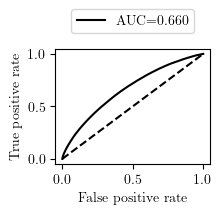


Evaluate_Model() for  BRFC_alpha_0_5_1_0_0_1_Easy
a, b =  0.792 0.9993


y_proba  Neg_1  Pos_1   mProb_1      TN     FP      FN     TP     FP/P
7916    0.792   13.0   14.0  0.518519  647265  29179  109398  16858  0.23111

c, d =  207 16858
a, b =  0.9101 0.9987


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP      FP/P
9097   0.9101    74.0    74.0       0.5  671814  4630  121971  4285  0.036672

c, d =  208 4285
a, b =  0.92 0.9978


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN    TP      FP/P
9196     0.92   162.0   167.0  0.507599  672693  3751  122649  3607  0.029709

c, d =  222 3607
a, b =  0.9206 0.967


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
9202   0.9206   401.0   402.0  0.500623  672730  3714  122682  3574  0.029416

c, d =  1137 3574
a, b =  0.9606 0.9658


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
9602   0.9606    439.0    442.0   0.501703  675329  1115  124875  1381   

          FP/P  
9602  0.008831

c, d =  1165 1381
a, b =  0.964 0.9643


y_proba  Neg_200  Pos_200  mProb_200      TN   FP      FN    TP  \
9636    0.964    819.0    823.0   0.501218  675478  966  125017  1239   

          FP/P  
9636  0.007651

c, d =  1229 1239
a, b =  0.9659 0.9658


y_proba  Neg_500  Pos_500  mProb_500      TN   FP      FN    TP  \
9654   0.9659   2076.0   2083.0   0.500842  675554  890  125093  1163   

          FP/P  
9654  0.007049

c, d =  1165 1163
a, b =  nan 0.942
a, b =  nan 0.892


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Hard
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Hard
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Hard
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Hard
KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Hard  has  105664  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Hard
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Hard
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Hard
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Hard
ROC() for  KBFC_alpha_0_5_gamm

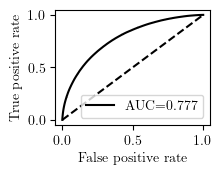

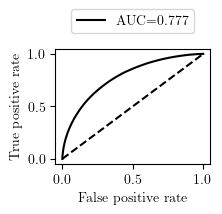


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Hard
a, b =  0.3339 0.9673


y_proba  Neg_1  Pos_1   mProb_1      TN     FP     FN     TP      FP/P
3336   0.3339   23.0   26.0  0.530612  632514  43930  84060  42196  0.347944

c, d =  2 42196
a, b =  0.4379 0.6217


y_proba  Neg_10  Pos_10  mProb_10      TN     FP     FN     TP      FP/P
4376   0.4379   126.0   126.0       0.5  656496  19948  99001  27255  0.157996

c, d =  12006 27255
a, b =  0.4635 0.5568


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
4632   0.4635   214.0   221.0  0.508046  660030  16414  101821  24435   

          FP/P  
4632  0.130006

c, d =  16296 24435
a, b =  0.4797 0.5548


y_proba  Neg_50  Pos_50  mProb_50      TN     FP      FN     TP  \
4794   0.4797   519.0   522.0  0.501441  661822  14622  103406  22850   

          FP/P  
4794  0.115812

c, d =  16441 22850
a, b =  0.4996 0.5165


y_proba  Neg_100  Pos_100  mProb_100      TN     FP      FN     TP  \
4993   0.4996    907.0    914.0   0.501922  663815  12629  105255  21001   

          FP/P  
4993  0.100027

c, d =  19515 21001
a, b =  0.5065 0.5118


y_proba  Neg_200  Pos_200  mProb_200      TN     FP      FN     TP  \
5062   0.5065   1766.0   1767.0   0.500142  664425  12019  105873  20383   

          FP/P  
5062  0.095195

c, d =  19909 20383
a, b =  0.5077 0.508


y_proba  Neg_500  Pos_500  mProb_500      TN     FP      FN     TP  \
5074   0.5077   4393.0   4394.0   0.500057  664541  11903  105967  20289   

          FP/P  
5074  0.094277

c, d =  20264 20289
a, b =  0.511 0.5109


y_proba  Neg_1000  Pos_1000  mProb_1000      TN     FP      FN     TP  \
5107    0.511    8682.0    8685.0    0.500086  664826  11618  106269  19987   

          FP/P  
5107  0.092019

c, d =  20002 19987
a, b =  0.5247 0.5246


y_proba  Neg_2000  Pos_2000  mProb_2000      TN     FP      FN     TP  \
5244   0.5247   17071.0   17072.0    0.500015  665962  10482  107426  18830   

          FP/P  
5244  0.083022

c, d =  18837 18830


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Medium
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Medium
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Medium
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Medium
KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Medium  has  112052  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Medium
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Medium
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Medium
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Medium
ROC() for  KBFC_alpha_0_5_gamma_0_0_1_

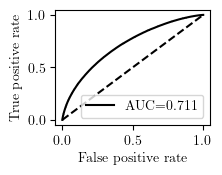

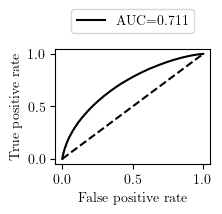


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Medium
a, b =  0.3245 0.8765


y_proba  Neg_1  Pos_1  mProb_1      TN     FP     FN     TP      FP/P
3207   0.3245   28.0   28.0      0.5  636940  39504  97434  28822  0.312888

c, d =  2 28822
a, b =  0.4409 0.7748


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
4371   0.4409   118.0   125.0  0.514403  663147  13297  112748  13508   

          FP/P  
4371  0.105318

c, d =  116 13508
a, b =  0.4639 0.7169


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
4601   0.4639   170.0   175.0  0.507246  665929  10515  114977  11279   

          FP/P  
4601  0.083283

c, d =  449 11279
a, b =  0.4945 0.6344


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
4907   0.4945   401.0   403.0  0.501244  668871  7573  117499  8757  0.059981

c, d =  1767 8757
a, b =  0.4995 0.5474


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
4957   0.4995    774.0    775.0   0.500323  669273  7171  117893  8363   

          FP/P  
4957  0.056797

c, d =  5212 8363
a, b =  0.5355 0.5404


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
5317   0.5355   1227.0   1228.0   0.500204  671866  4578  120364  5892   

         FP/P  
5317  0.03626

c, d =  5582 5892
a, b =  0.534 0.5339


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
5302    0.534   3084.0   3087.0   0.500243  671767  4677  120280  5976   

          FP/P  
5302  0.037044

c, d =  5982 5976
a, b =  0.5283 0.5292


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
5245   0.5283    6442.0    6442.0         0.5  671400  5044  119931  6325   

          FP/P  
5245  0.039951

c, d =  6279 6325
a, b =  0.5536 0.5535


y_proba  Neg_2000  Pos_2000  mProb_2000      TN    FP      FN    TP  \
5498   0.5536   10951.0   10959.0    0.500183  672847  3597  121383  4873   

         FP/P  
5498  0.02849

c, d =  4879 4873


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Easy
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Easy
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Easy
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Easy
KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Easy  has  65163  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Easy
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Easy
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Easy
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Easy
ROC() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Easy
False
False
./Imag

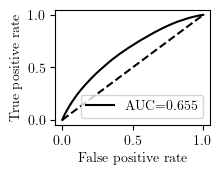

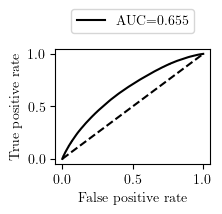


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_1_0_0_1_Easy
a, b =  0.3182 0.5215


y_proba  Neg_1  Pos_1   mProb_1      TN     FP      FN    TP      FP/P
2950   0.3182   25.0   26.0  0.509804  661389  15055  118047  8209  0.119242

c, d =  0 8209
a, b =  0.3838 0.4958


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP      FP/P
3606   0.3838    58.0    63.0  0.520661  673702  2742  124476  1780  0.021718

c, d =  7 1780
a, b =  0.4208 0.494


y_proba  Neg_20  Pos_20  mProb_20      TN   FP      FN   TP      FP/P
3965   0.4208    49.0    49.0       0.5  675620  824  125691  565  0.006526

c, d =  11 565
a, b =  nan 0.4825
a, b =  nan 0.475
a, b =  nan 0.4623
a, b =  nan 0.4396
a, b =  nan 0.4119
a, b =  nan 0.3612

Create_Files_for_Value_Counts_y_Proba
Create_Files_for_Analyze_Prediction()
Create_Files_for_Lengths_of_fpr_tpr
Create_Files_for_ROC_AUC
Create_Files_for_FP_P
Analyze_Results()

-------------------------------------

BRFC_alpha_0_5_1_0_1_0_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_1_0_1_0_Hard
Analyze_Prediction() for  BRFC_alpha_0_5_1_0_1_0_Hard
Value_Counts_y_proba() for  BRFC_alpha_0_5_1_0_1_0_Hard
FP_P_Locate() for  BRFC_alpha_0_5_1_0_1_0_Hard
BRFC_alpha_0_5_1_0_1_0_Hard  has  1300  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_1_0_1_0_Hard
Plot_Prediction_Wide() for  BRFC_alpha_0_5_1_0_1_0_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_1_0_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_1_0_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_1_0_Hard
Plot_Prediction_Zoom_Wide() for  BRFC_a

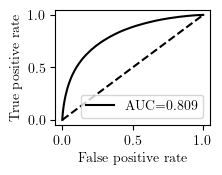

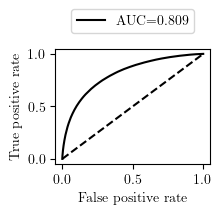


Evaluate_Model() for  BRFC_alpha_0_5_1_0_1_0_Hard
a, b =  0.045 0.9767


y_proba  Neg_1  Pos_1  mProb_1    TN      FP  FN      TP      FP/P
15    0.045    1.0    1.0      0.5  3479  672965  20  126236  5.330163

c, d =  656 126236
a, b =  0.7583 0.8517


y_proba  Neg_10  Pos_10  mProb_10      TN     FP     FN     TP      FP/P
2044   0.7583    18.0    23.0  0.560976  654574  21870  90617  35639  0.173219

c, d =  13962 35639
a, b =  0.763 0.8252


y_proba  Neg_20  Pos_20  mProb_20      TN     FP     FN     TP      FP/P
2060    0.763    64.0    86.0  0.573333  656922  19522  92831  33425  0.154622

c, d =  19825 33425
a, b =  0.765 0.7645


y_proba  Neg_50  Pos_50  mProb_50      TN     FP     FN     TP      FP/P
2069    0.765  4486.0  4565.0  0.504364  656970  19474  92904  33352  0.154242

c, d =  33398 33352
a, b =  0.7643 0.7642


y_proba  Neg_100  Pos_100  mProb_100      TN     FP     FN     TP  \
2066   0.7643   4723.0   4770.0   0.502476  656941  19503  92857  33399   

          FP/P  
2066  0.154472

c, d =  33399 33399
a, b =  0.7675 0.7672


y_proba  Neg_200  Pos_200  mProb_200      TN     FP     FN     TP  \
2079   0.7675  11459.0  11734.0   0.505929  657007  19437  92939  33317   

          FP/P  
2079  0.153949

c, d =  33323 33317
a, b =  0.7675 0.7672


y_proba  Neg_500  Pos_500  mProb_500      TN     FP     FN     TP  \
2079   0.7675  31070.0  31530.0   0.503674  657007  19437  92939  33317   

          FP/P  
2079  0.153949

c, d =  33323 33317
a, b =  nan 0.7773
a, b =  nan 0.645


-------------------------------------

BRFC_alpha_0_5_1_0_1_0_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_1_0_1_0_Medium
Analyze_Prediction() for  BRFC_alpha_0_5_1_0_1_0_Medium
Value_Counts_y_proba() for  BRFC_alpha_0_5_1_0_1_0_Medium
FP_P_Locate() for  BRFC_alpha_0_5_1_0_1_0_Medium
BRFC_alpha_0_5_1_0_1_0_Medium  has  13588  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_1_0_1_0_Medium
Plot_Prediction_Wide() for  BRFC_alpha_0_5_1_0_1_0_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_1_0_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_1_0_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_1_0_Medium
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_1_0_1_0_Medium
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_1_0_1_0_Medium
ROC() for  BRFC_alpha_0_5_1_0_1_0_Medium
False
False
./Images/Run_1_0_1_0/BRFC_alpha_0_5_1_0_1_0_Medium_ROC.png

ROC() for  BRFC_alp

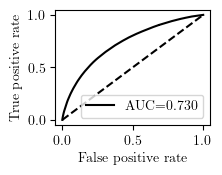

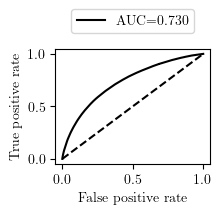


Evaluate_Model() for  BRFC_alpha_0_5_1_0_1_0_Medium
a, b =  0.0153 0.998


y_proba  Neg_1  Pos_1  mProb_1   TN      FP  FN      TP      FP/P
28   0.0153    1.0    1.0      0.5  793  675651  15  126241  5.351437

c, d =  126 126241
a, b =  0.8496 0.9957


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
8004   0.8496   915.0   943.0  0.507535  664498  11946  112946  13310   

          FP/P  
8004  0.094617

c, d =  129 13310
a, b =  0.8494 0.9632


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
8002   0.8494   960.0   962.0   0.50052  664495  11949  112940  13316   

          FP/P  
8002  0.094641

c, d =  1107 13316
a, b =  0.8578 0.9555


y_proba  Neg_50  Pos_50  mProb_50      TN     FP      FN     TP  \
8083   0.8578  1189.0  1196.0  0.501468  666219  10225  114447  11809   

          FP/P  
8083  0.080986

c, d =  1566 11809
a, b =  0.8748 0.882


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
8241   0.8748   2128.0   2131.0   0.500352  669066  7378  117092  9164   

          FP/P  
8241  0.058437

c, d =  7977 9164
a, b =  0.8792 0.8791


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
8283   0.8792   3344.0   3428.0   0.506202  669471  6973  117407  8849   

          FP/P  
8283  0.055229

c, d =  8853 8849
a, b =  0.8817 0.8815


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
8306   0.8817   7440.0   7483.0   0.501441  670205  6239  118267  7989   

          FP/P  
8306  0.049415

c, d =  8019 7989
a, b =  0.8893 0.8892


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
8376   0.8893   13445.0   13504.0    0.501095  670740  5704  118723  7533   

          FP/P  
8376  0.045178

c, d =  7534 7533
a, b =  nan 0.8546


-------------------------------------

BRFC_alpha_0_5_1_0_1_0_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_1_0_1_0_Easy
Analyze_Prediction() for  BRFC_alpha_0_5_1_0_1_0_Easy
Value_Counts_y_proba() for  BRFC_alpha_0_5_1_0_1_0_Easy
FP_P_Locate() for  BRFC_alpha_0_5_1_0_1_0_Easy
BRFC_alpha_0_5_1_0_1_0_Easy  has  63586  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_1_0_1_0_Easy
Plot_Prediction_Wide() for  BRFC_alpha_0_5_1_0_1_0_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_1_0_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_1_0_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_1_0_Easy
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_1_0_1_0_Easy
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_1_0_1_0_Easy
ROC() for  BRFC_alpha_0_5_1_0_1_0_Easy
False
False
./Images/Run_1_0_1_0/BRFC_alpha_0_5_1_0_1_0_Easy_ROC.png

ROC() for  BRFC_alpha_0_5_1_0_1_0_Easy
False
False
./Images/Run_1_0_1

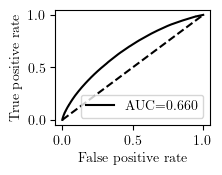

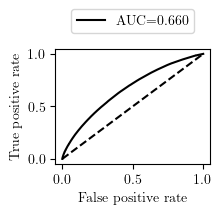


Evaluate_Model() for  BRFC_alpha_0_5_1_0_1_0_Easy
a, b =  0.7531 0.999


y_proba  Neg_1  Pos_1   mProb_1      TN     FP      FN     TP      FP/P
7528   0.7531   11.0   13.0  0.541667  631830  44614  103194  23062  0.353361

c, d =  196 23062
a, b =  0.8843 0.9981


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP      FP/P
8840   0.8843   111.0   111.0       0.5  668758  7686  119934  6322  0.060876

c, d =  200 6322
a, b =  0.9214 0.9887


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN    TP      FP/P
9211   0.9214   147.0   150.0  0.505051  672812  3632  122795  3461  0.028767

c, d =  414 3461
a, b =  0.96 0.9661


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
9593     0.96   235.0   235.0       0.5  675339  1105  124849  1407  0.008752

c, d =  1137 1407
a, b =  0.9629 0.9633


y_proba  Neg_100  Pos_100  mProb_100      TN   FP      FN    TP  \
9621   0.9629    431.0    433.0   0.501157  675465  979  124978  1278   

          FP/P  
9621  0.007754

c, d =  1254 1278
a, b =  0.9648 0.9647


y_proba  Neg_200  Pos_200  mProb_200      TN   FP      FN    TP  \
9640   0.9648    819.0    824.0   0.501522  675549  895  125058  1198   

          FP/P  
9640  0.007089

c, d =  1199 1198
a, b =  0.9647 0.9651


y_proba  Neg_500  Pos_500  mProb_500      TN   FP      FN    TP  \
9639   0.9647   2098.0   2098.0        0.5  675549  895  125057  1199   

          FP/P  
9639  0.007089

c, d =  1175 1199
a, b =  nan 0.9423
a, b =  nan 0.8922


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Hard
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Hard
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Hard
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Hard
KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Hard  has  105782  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Hard
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Hard
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Hard
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Hard
ROC() for  KBFC_alpha_0_5_ga

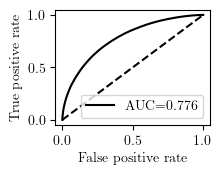

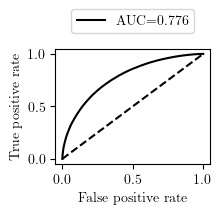


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Hard
a, b =  0.3009 0.965


y_proba  Neg_1  Pos_1   mProb_1      TN     FP     FN     TP      FP/P
3007   0.3009   20.0   28.0  0.583333  620491  55953  78688  47568  0.443171

c, d =  0 47568
a, b =  0.4474 0.9338


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
4472   0.4474   123.0   128.0   0.50996  658177  18267  100339  25917   

          FP/P  
4472  0.144682

c, d =  42 25917
a, b =  0.4476 0.5974


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
4474   0.4476   257.0   258.0  0.500971  658202  18242  100371  25885   

          FP/P  
4474  0.144484

c, d =  13591 25885
a, b =  0.4797 0.5425


y_proba  Neg_50  Pos_50  mProb_50      TN     FP      FN     TP  \
4795   0.4797   501.0   502.0  0.500499  661986  14458  103659  22597   

          FP/P  
4795  0.114513

c, d =  17317 22597
a, b =  0.4945 0.54


y_proba  Neg_100  Pos_100  mProb_100      TN     FP      FN     TP  \
4943   0.4945    912.0    912.0        0.5  663455  12989  105038  21218   

          FP/P  
4943  0.102878

c, d =  17481 21218
a, b =  0.4998 0.5153


y_proba  Neg_200  Pos_200  mProb_200      TN     FP      FN     TP  \
4996   0.4998   1779.0   1782.0   0.500421  663928  12516  105521  20735   

          FP/P  
4996  0.099132

c, d =  19410 20735
a, b =  0.5065 0.5075


y_proba  Neg_500  Pos_500  mProb_500      TN     FP      FN     TP  \
5063   0.5065   4308.0   4308.0        0.5  664529  11915  106124  20132   

          FP/P  
5063  0.094372

c, d =  20058 20132
a, b =  0.5128 0.5127


y_proba  Neg_1000  Pos_1000  mProb_1000      TN     FP      FN     TP  \
5126   0.5128    8472.0    8474.0    0.500059  665042  11402  106629  19627   

          FP/P  
5126  0.090309

c, d =  19639 19627
a, b =  0.525 0.5249


y_proba  Neg_2000  Pos_2000  mProb_2000      TN     FP      FN     TP  \
5248    0.525   16522.0   16525.0    0.500045  666020  10424  107637  18619   

          FP/P  
5248  0.082562

c, d =  18624 18619


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Medium
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Medium
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Medium
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Medium
KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Medium  has  112331  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Medium
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Medium
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Medium
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Medium
ROC() for  KBFC_alpha_0_5_gamma_0_0_1_

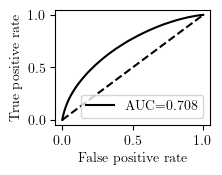

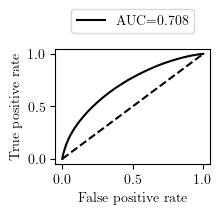


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Medium
a, b =  0.3384 0.8507


y_proba  Neg_1  Pos_1  mProb_1      TN     FP     FN     TP      FP/P
3346   0.3384   30.0   30.0      0.5  640180  36264  99109  27147  0.287226

c, d =  6 27147
a, b =  0.4496 0.7965


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
4458   0.4496   100.0   109.0  0.521531  664013  12431  113684  12572   

          FP/P  
4458  0.098459

c, d =  48 12572
a, b =  0.4802 0.7503


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN    TP      FP/P
4764   0.4802   191.0   191.0       0.5  667486  8958  116483  9773  0.070951

c, d =  180 9773
a, b =  0.5059 0.6492


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
5021   0.5059   367.0   369.0  0.501359  669773  6671  118488  7768  0.052837

c, d =  1302 7768
a, b =  0.5232 0.5614


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
5194   0.5232    689.0    692.0   0.501086  671063  5381  119704  6552   

         FP/P  
5194  0.04262

c, d =  4324 6552
a, b =  0.5292 0.5562


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
5254   0.5292   1282.0   1286.0   0.500779  671460  4984  120106  6150   

          FP/P  
5254  0.039475

c, d =  4573 6150
a, b =  0.538 0.538


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
5342    0.538   3006.0   3006.0        0.5  671993  4451  120631  5625   

          FP/P  
5342  0.035254

c, d =  5625 5625
a, b =  0.5436 0.5438


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
5398   0.5436    5743.0    5748.0    0.500218  672324  4120  120957  5299   

          FP/P  
5398  0.032632

c, d =  5275 5299
a, b =  0.5634 0.5636


y_proba  Neg_2000  Pos_2000  mProb_2000      TN    FP      FN    TP  \
5596   0.5634   10208.0   10212.0    0.500098  673352  3092  122032  4224   

         FP/P  
5596  0.02449

c, d =  4220 4224


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Easy
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Easy
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Easy
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Easy
KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Easy  has  65129  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Easy
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Easy
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Easy
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Easy
ROC() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Easy
False
False
./Imag

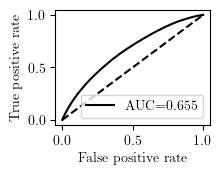

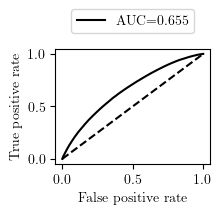


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_0_Easy
a, b =  0.3071 0.5214


y_proba  Neg_1  Pos_1   mProb_1      TN     FP      FN     TP      FP/P
2842   0.3071   32.0   33.0  0.507692  656518  19926  115757  10499  0.157822

c, d =  0 10499
a, b =  0.3994 0.4985


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP      FP/P
3762   0.3994    36.0    36.0       0.5  674743  1701  125130  1126  0.013473

c, d =  0 1126
a, b =  0.4333 0.4919


y_proba  Neg_20  Pos_20  mProb_20      TN   FP      FN   TP      FP/P
4077   0.4333    28.0    30.0  0.517241  675908  536  125883  373  0.004245

c, d =  9 373
a, b =  nan 0.4828
a, b =  nan 0.4742
a, b =  nan 0.4623
a, b =  nan 0.4401
a, b =  nan 0.4122
a, b =  nan 0.3616

Create_Files_for_Value_Counts_y_Proba
Create_Files_for_Analyze_Prediction()
Create_Files_for_Lengths_of_fpr_tpr
Create_Files_for_ROC_AUC
Create_Files_for_FP_P
Analyze_Results()

-------------------------------------

BRFC_alpha_0_5_1_0_1_1_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_1_0_1_1_Hard
Analyze_Prediction() for  BRFC_alpha_0_5_1_0_1_1_Hard
Value_Counts_y_proba() for  BRFC_alpha_0_5_1_0_1_1_Hard
FP_P_Locate() for  BRFC_alpha_0_5_1_0_1_1_Hard
BRFC_alpha_0_5_1_0_1_1_Hard  has  1437  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_1_0_1_1_Hard
Plot_Prediction_Wide() for  BRFC_alpha_0_5_1_0_1_1_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_1_1_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_1_1_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_1_1_Hard
Plot_Prediction_Zoom_Wide() for  BRFC_a

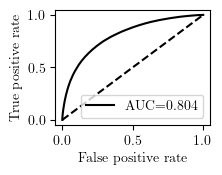

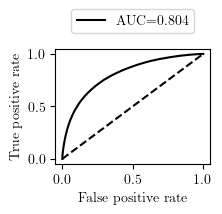


Evaluate_Model() for  BRFC_alpha_0_5_1_0_1_1_Hard
a, b =  0.2123 0.9693


y_proba  Neg_1  Pos_1  mProb_1      TN      FP    FN      TP      FP/P
295   0.2123    0.0    1.0      1.0  111539  564905  2275  123981  4.474282

c, d =  1081 123981
a, b =  0.7077 0.8824


y_proba  Neg_10  Pos_10  mProb_10      TN     FP     FN     TP     FP/P
2089   0.7077    31.0    36.0  0.537313  638393  38051  79738  46518  0.30138

c, d =  8129 46518
a, b =  0.766 0.8074


y_proba  Neg_20  Pos_20  mProb_20      TN     FP     FN     TP      FP/P
2342    0.766    98.0   101.0  0.507538  656620  19824  94236  32020  0.157014

c, d =  22729 32020
a, b =  0.7667 0.7665


y_proba  Neg_50  Pos_50  mProb_50      TN     FP     FN     TP      FP/P
2345   0.7667  2392.0  2408.0  0.501667  656649  19795  94267  31989  0.156785

c, d =  32019 31989
a, b =  0.7681 0.768


y_proba  Neg_100  Pos_100  mProb_100      TN     FP     FN     TP  \
2354   0.7681   6918.0   7034.0   0.504157  656664  19780  94285  31971   

          FP/P  
2354  0.156666

c, d =  31972 31971
a, b =  0.7658 0.7657


y_proba  Neg_200  Pos_200  mProb_200      TN     FP     FN     TP  \
2340   0.7658  11729.0  11770.0   0.500872  656616  19828  94234  32022   

          FP/P  
2340  0.157046

c, d =  32022 32022
a, b =  0.7675 0.7674


y_proba  Neg_500  Pos_500  mProb_500      TN     FP     FN     TP  \
2349   0.7675  27529.0  27597.0   0.500617  656660  19784  94278  31978   

          FP/P  
2349  0.156698

c, d =  31986 31978
a, b =  0.7863 0.786


y_proba  Neg_1000  Pos_1000  mProb_1000      TN     FP     FN     TP  \
2427   0.7863   55601.0   55602.0    0.500004  661137  15307  98966  27290   

          FP/P  
2427  0.121238

c, d =  27290 27290
a, b =  nan 0.6702


-------------------------------------

BRFC_alpha_0_5_1_0_1_1_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_1_0_1_1_Medium
Analyze_Prediction() for  BRFC_alpha_0_5_1_0_1_1_Medium
Value_Counts_y_proba() for  BRFC_alpha_0_5_1_0_1_1_Medium
FP_P_Locate() for  BRFC_alpha_0_5_1_0_1_1_Medium
BRFC_alpha_0_5_1_0_1_1_Medium  has  14993  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_1_0_1_1_Medium
Plot_Prediction_Wide() for  BRFC_alpha_0_5_1_0_1_1_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_1_1_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_1_1_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_1_1_Medium
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_1_0_1_1_Medium
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_1_0_1_1_Medium
ROC() for  BRFC_alpha_0_5_1_0_1_1_Medium
False
False
./Images/Run_1_0_1_1/BRFC_alpha_0_5_1_0_1_1_Medium_ROC.png

ROC() for  BRFC_alpha_0_5_1_0_1_1_Med

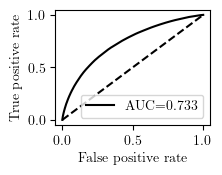

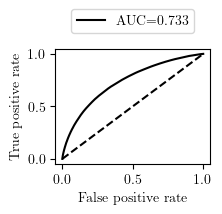


Evaluate_Model() for  BRFC_alpha_0_5_1_0_1_1_Medium
a, b =  0.0347 0.999


y_proba  Neg_1  Pos_1  mProb_1    TN      FP  FN      TP      FP/P
114   0.0347    0.0    1.0      1.0  3062  673382  61  126195  5.333465

c, d =  166 126195
a, b =  0.8496 0.9967


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
8058   0.8496   897.0   934.0  0.510104  663684  12760  111760  14496   

          FP/P  
8058  0.101065

c, d =  168 14496
a, b =  0.8491 0.9741


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
8053   0.8491   994.0   998.0  0.501004  663643  12801  111739  14517   

          FP/P  
8053  0.101389

c, d =  868 14517
a, b =  0.8775 0.9269


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
8324   0.8775  1085.0  1176.0  0.520124  668724  7720  116320  9936  0.061146

c, d =  4132 9936
a, b =  0.8747 0.8782


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN     TP  \
8299   0.8747   2131.0   2210.0   0.509099  668379  8065  116010  10246   

          FP/P  
8299  0.063878

c, d =  9913 10246
a, b =  0.8794 0.8813


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
8342   0.8794   3438.0   3530.0   0.506602  668837  7607  116392  9864   

          FP/P  
8342  0.060251

c, d =  9030 9864
a, b =  0.8822 0.8821


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
8369   0.8822   7619.0   7650.0   0.501015  669570  6874  117270  8986   

          FP/P  
8369  0.054445

c, d =  8987 8986
a, b =  0.8859 0.8858


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
8405   0.8859   14202.0   14207.0    0.500088  669908  6536  117544  8712   

          FP/P  
8405  0.051768

c, d =  8712 8712
a, b =  nan 0.8584


-------------------------------------

BRFC_alpha_0_5_1_0_1_1_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_1_0_1_1_Easy
Analyze_Prediction() for  BRFC_alpha_0_5_1_0_1_1_Easy
Value_Counts_y_proba() for  BRFC_alpha_0_5_1_0_1_1_Easy
FP_P_Locate() for  BRFC_alpha_0_5_1_0_1_1_Easy
BRFC_alpha_0_5_1_0_1_1_Easy  has  63586  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_1_0_1_1_Easy
Plot_Prediction_Wide() for  BRFC_alpha_0_5_1_0_1_1_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_1_1_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_1_1_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_0_1_1_Easy
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_1_0_1_1_Easy
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_1_0_1_1_Easy
ROC() for  BRFC_alpha_0_5_1_0_1_1_Easy
False
False
./Images/Run_1_0_1_1/BRFC_alpha_0_5_1_0_1_1_Easy_ROC.png

ROC() for  BRFC_alpha_0_5_1_0_1_1_Easy
False
False
./Images/Run_1_0_1

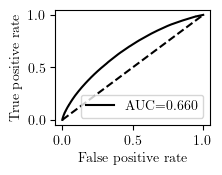

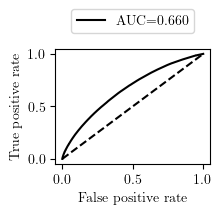


Evaluate_Model() for  BRFC_alpha_0_5_1_0_1_1_Easy
a, b =  0.7531 0.999


y_proba  Neg_1  Pos_1   mProb_1      TN     FP      FN     TP      FP/P
7528   0.7531   11.0   13.0  0.541667  631830  44614  103194  23062  0.353361

c, d =  196 23062
a, b =  0.8843 0.9981


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP      FP/P
8840   0.8843   111.0   111.0       0.5  668758  7686  119934  6322  0.060876

c, d =  200 6322
a, b =  0.9214 0.9887


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN    TP      FP/P
9211   0.9214   147.0   150.0  0.505051  672812  3632  122795  3461  0.028767

c, d =  414 3461
a, b =  0.96 0.9661


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
9593     0.96   235.0   235.0       0.5  675339  1105  124849  1407  0.008752

c, d =  1137 1407
a, b =  0.9629 0.9633


y_proba  Neg_100  Pos_100  mProb_100      TN   FP      FN    TP  \
9621   0.9629    431.0    433.0   0.501157  675465  979  124978  1278   

          FP/P  
9621  0.007754

c, d =  1254 1278
a, b =  0.9648 0.9647


y_proba  Neg_200  Pos_200  mProb_200      TN   FP      FN    TP  \
9640   0.9648    819.0    824.0   0.501522  675549  895  125058  1198   

          FP/P  
9640  0.007089

c, d =  1199 1198
a, b =  0.9647 0.9651


y_proba  Neg_500  Pos_500  mProb_500      TN   FP      FN    TP  \
9639   0.9647   2098.0   2098.0        0.5  675549  895  125057  1199   

          FP/P  
9639  0.007089

c, d =  1175 1199
a, b =  nan 0.9423
a, b =  nan 0.8922


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Hard
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Hard
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Hard
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Hard
KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Hard  has  106171  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Hard
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Hard
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Hard
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Hard
ROC() for  KBFC_alpha_0_5_ga

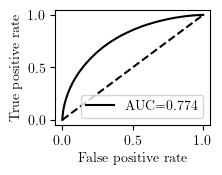

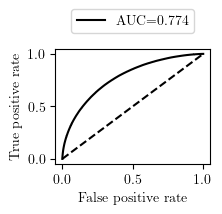


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Hard
a, b =  0.3571 0.9517


y_proba  Neg_1  Pos_1  mProb_1      TN     FP     FN     TP      FP/P
3569   0.3571   17.0   23.0    0.575  630450  45994  83476  42780  0.364292

c, d =  29 42780
a, b =  0.4365 0.6642


y_proba  Neg_10  Pos_10  mProb_10      TN     FP     FN     TP      FP/P
4363   0.4365   174.0   176.0  0.502857  650799  25645  95282  30974  0.203119

c, d =  11105 30974
a, b =  0.4999 0.6118


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
4997   0.4999   214.0   219.0  0.505774  660413  16031  102482  23774   

          FP/P  
4997  0.126972

c, d =  14396 23774
a, b =  0.5148 0.5593


y_proba  Neg_50  Pos_50  mProb_50      TN     FP      FN     TP  \
5146   0.5148   497.0   497.0       0.5  662055  14389  103930  22326   

          FP/P  
5146  0.113967

c, d =  18404 22326
a, b =  0.531 0.5575


y_proba  Neg_100  Pos_100  mProb_100      TN     FP      FN     TP  \
5308    0.531    916.0    924.0   0.502174  663701  12743  105480  20776   

         FP/P  
5308  0.10093

c, d =  18546 20776
a, b =  0.5529 0.5528


y_proba  Neg_200  Pos_200  mProb_200      TN     FP      FN     TP  \
5527   0.5529   1633.0   1636.0   0.500459  665672  10772  107351  18905   

          FP/P  
5527  0.085319

c, d =  18913 18905
a, b =  0.549 0.5489


y_proba  Neg_500  Pos_500  mProb_500      TN     FP      FN     TP  \
5488    0.549   4226.0   4227.0   0.500059  665344  11100  107009  19247   

          FP/P  
5488  0.087917

c, d =  19255 19247
a, b =  0.5471 0.547


y_proba  Neg_1000  Pos_1000  mProb_1000      TN     FP      FN     TP  \
5469   0.5471    8603.0    8618.0    0.500436  665167  11277  106855  19401   

          FP/P  
5469  0.089319

c, d =  19407 19401
a, b =  0.5606 0.5605


y_proba  Neg_2000  Pos_2000  mProb_2000      TN     FP      FN     TP  \
5604   0.5606   16728.0   16730.0     0.50003  666293  10151  107971  18285   

        FP/P  
5604  0.0804

c, d =  18293 18285


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Medium
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Medium
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Medium
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Medium
KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Medium  has  112146  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Medium
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Medium
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Medium
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Medium
ROC() for  KBFC_alpha_0_5_gamma_0_0_1_

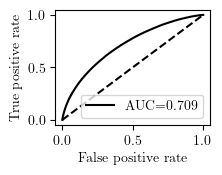

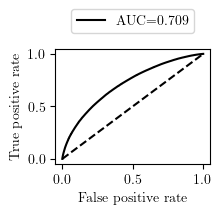


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Medium
a, b =  0.3398 0.9095


y_proba  Neg_1  Pos_1   mProb_1      TN     FP     FN     TP      FP/P
3361   0.3398   24.0   25.0  0.510204  640558  35886  99257  26999  0.284232

c, d =  0 26999
a, b =  0.4519 0.777


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
4482   0.4519   111.0   115.0   0.50885  663921  12523  113328  12928   

          FP/P  
4482  0.099187

c, d =  124 12928
a, b =  0.4673 0.7594


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
4636   0.4673   210.0   212.0   0.50237  665726  10718  114880  11376   

          FP/P  
4636  0.084891

c, d =  200 11376
a, b =  0.5084 0.6564


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
5047   0.5084   343.0   345.0  0.501453  669645  6799  118252  8004  0.053851

c, d =  1393 8004
a, b =  0.5248 0.5514


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
5211   0.5248    683.0    688.0   0.501823  670835  5609  119366  6890   

          FP/P  
5211  0.044426

c, d =  5289 6890
a, b =  0.5291 0.5494


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP    FP/P
5254   0.5291   1291.0   1296.0   0.500966  671116  5328  119661  6595  0.0422

c, d =  5391 6595
a, b =  0.5373 0.5374


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
5336   0.5373   3076.0   3076.0        0.5  671620  4824  120167  6089   

          FP/P  
5336  0.038208

c, d =  6086 6089
a, b =  0.5413 0.5429


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
5376   0.5413    5988.0    5989.0    0.500042  671841  4603  120398  5858   

          FP/P  
5376  0.036458

c, d =  5752 5858
a, b =  0.5605 0.5604


y_proba  Neg_2000  Pos_2000  mProb_2000      TN    FP      FN    TP  \
5568   0.5605   10753.0   10761.0    0.500186  672920  3524  121496  4760   

          FP/P  
5568  0.027912

c, d =  4766 4760


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Easy
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Easy
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Easy
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Easy
KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Easy  has  65129  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Easy
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Easy
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Easy
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Easy
ROC() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Easy
False
False
./Imag

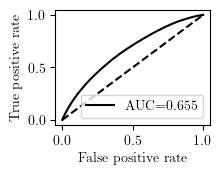

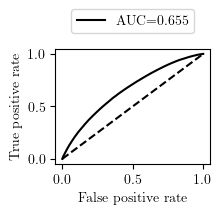


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_1_0_1_1_Easy
a, b =  0.3071 0.5214


y_proba  Neg_1  Pos_1   mProb_1      TN     FP      FN     TP      FP/P
2842   0.3071   32.0   33.0  0.507692  656518  19926  115757  10499  0.157822

c, d =  0 10499
a, b =  0.3994 0.4985


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP      FP/P
3762   0.3994    36.0    36.0       0.5  674743  1701  125130  1126  0.013473

c, d =  0 1126
a, b =  0.4333 0.4919


y_proba  Neg_20  Pos_20  mProb_20      TN   FP      FN   TP      FP/P
4077   0.4333    28.0    30.0  0.517241  675908  536  125883  373  0.004245

c, d =  9 373
a, b =  nan 0.4828
a, b =  nan 0.4742
a, b =  nan 0.4623
a, b =  nan 0.4401
a, b =  nan 0.4122
a, b =  nan 0.3616

Create_Files_for_Value_Counts_y_Proba
Create_Files_for_Analyze_Prediction()
Create_Files_for_Lengths_of_fpr_tpr
Create_Files_for_ROC_AUC
Create_Files_for_FP_P
Analyze_Results()

-------------------------------------

BRFC_alpha_0_5_1_1_0_0_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_1_1_0_0_Hard
Analyze_Prediction() for  BRFC_alpha_0_5_1_1_0_0_Hard
Value_Counts_y_proba() for  BRFC_alpha_0_5_1_1_0_0_Hard
FP_P_Locate() for  BRFC_alpha_0_5_1_1_0_0_Hard
BRFC_alpha_0_5_1_1_0_0_Hard  has  1225  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_1_1_0_0_Hard
Plot_Prediction_Wide() for  BRFC_alpha_0_5_1_1_0_0_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_0_0_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_0_0_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_0_0_Hard
Plot_Prediction_Zoom_Wide() for  BRFC_a

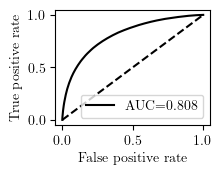

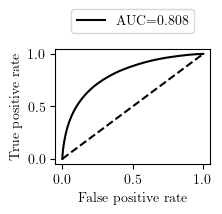


Evaluate_Model() for  BRFC_alpha_0_5_1_1_0_0_Hard
a, b =  0.163 0.9775


y_proba  Neg_1  Pos_1  mProb_1     TN      FP   FN      TP      FP/P
165    0.163    0.0    1.0      1.0  61727  614717  925  125331  4.868814

c, d =  626 125331
a, b =  0.7428 0.8725


y_proba  Neg_10  Pos_10  mProb_10      TN     FP     FN     TP      FP/P
1928   0.7428    34.0    36.0  0.514286  652706  23738  88995  37261  0.188015

c, d =  9669 37261
a, b =  0.754 0.797


y_proba  Neg_20  Pos_20  mProb_20      TN     FP     FN     TP     FP/P
1968    0.754    80.0    81.0  0.503106  655161  21283  91325  34931  0.16857

c, d =  25527 34931
a, b =  0.764 0.7635


y_proba  Neg_50  Pos_50  mProb_50      TN     FP     FN     TP      FP/P
2008    0.764  4563.0  4596.0  0.501802  657534  18910  93656  32600  0.149775

c, d =  32602 32600
a, b =  0.7633 0.763


y_proba  Neg_100  Pos_100  mProb_100      TN     FP     FN     TP  \
2006   0.7633   4769.0   4808.0   0.502036  657532  18912  93651  32605   

          FP/P  
2006  0.149791

c, d =  32616 32605
a, b =  0.762 0.7617


y_proba  Neg_200  Pos_200  mProb_200      TN     FP     FN     TP  \
2001    0.762  13736.0  13910.0   0.503147  657512  18932  93630  32626   

          FP/P  
2001  0.149949

c, d =  32627 32626
a, b =  0.7658 0.7657


y_proba  Neg_500  Pos_500  mProb_500      TN     FP     FN     TP  \
2015   0.7658  30835.0  31710.0   0.506995  657579  18865  93712  32544   

          FP/P  
2015  0.149419

c, d =  32544 32544
a, b =  nan 0.7726
a, b =  nan 0.638


-------------------------------------

BRFC_alpha_0_5_1_1_0_0_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_1_1_0_0_Medium
Analyze_Prediction() for  BRFC_alpha_0_5_1_1_0_0_Medium
Value_Counts_y_proba() for  BRFC_alpha_0_5_1_1_0_0_Medium
FP_P_Locate() for  BRFC_alpha_0_5_1_1_0_0_Medium
BRFC_alpha_0_5_1_1_0_0_Medium  has  12565  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_1_1_0_0_Medium
Plot_Prediction_Wide() for  BRFC_alpha_0_5_1_1_0_0_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_0_0_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_0_0_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_0_0_Medium
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_1_1_0_0_Medium
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_1_1_0_0_Medium
ROC() for  BRFC_alpha_0_5_1_1_0_0_Medium
False
False
./Images/Run_1_1_0_0/BRFC_alpha_0_5_1_1_0_0_Medium_ROC.png

ROC() for  BRFC_alp

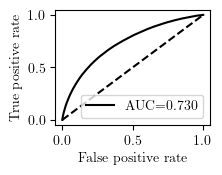

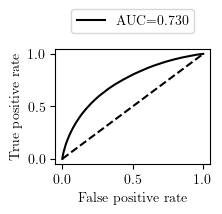


Evaluate_Model() for  BRFC_alpha_0_5_1_1_0_0_Medium
a, b =  0.006 0.9983


y_proba  Neg_1  Pos_1  mProb_1   TN      FP  FN      TP      FP/P
9    0.006    1.0    1.0      0.5  242  676202   3  126253  5.355801

c, d =  127 126253
a, b =  0.8396 0.988


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP     FP/P
7862   0.8396  1045.0  1050.0  0.501193  662927  13517  111290  14966  0.10706

c, d =  321 14966
a, b =  0.8489 0.9767


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
7951   0.8489  1022.0  1071.0  0.511706  664929  11515  112957  13299   

          FP/P  
7951  0.091204

c, d =  623 13299
a, b =  0.852 0.9268


y_proba  Neg_50  Pos_50  mProb_50      TN     FP      FN     TP  \
7980    0.852  1251.0  1252.0    0.5002  665994  10450  114056  12200   

          FP/P  
7980  0.082768

c, d =  3471 12200
a, b =  0.8649 0.8745


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN     TP  \
8102   0.8649   2307.0   2354.0   0.505042  667869  8575  115720  10536   

          FP/P  
8102  0.067918

c, d =  9097 10536
a, b =  0.869 0.8791


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN     TP  \
8143    0.869   3662.0   3713.0   0.503458  668301  8143  116061  10195   

          FP/P  
8143  0.064496

c, d =  8787 10195
a, b =  0.8734 0.8733


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
8181   0.8734   7801.0   7803.0   0.500064  669286  7158  117128  9128   

          FP/P  
8181  0.056694

c, d =  9128 9128
a, b =  0.8819 0.8818


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
8259   0.8819   14494.0   14496.0    0.500034  670433  6011  118325  7931   

         FP/P  
8259  0.04761

c, d =  7932 7931
a, b =  nan 0.8518


-------------------------------------

BRFC_alpha_0_5_1_1_0_0_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_1_1_0_0_Easy
Analyze_Prediction() for  BRFC_alpha_0_5_1_1_0_0_Easy
Value_Counts_y_proba() for  BRFC_alpha_0_5_1_1_0_0_Easy
FP_P_Locate() for  BRFC_alpha_0_5_1_1_0_0_Easy
BRFC_alpha_0_5_1_1_0_0_Easy  has  63642  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_1_1_0_0_Easy
Plot_Prediction_Wide() for  BRFC_alpha_0_5_1_1_0_0_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_0_0_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_0_0_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_0_0_Easy
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_1_1_0_0_Easy
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_1_1_0_0_Easy
ROC() for  BRFC_alpha_0_5_1_1_0_0_Easy
False
False
./Images/Run_1_1_0_0/BRFC_alpha_0_5_1_1_0_0_Easy_ROC.png

ROC() for  BRFC_alpha_0_5_1_1_0_0_Easy
False
False
./Images/Run_1_1_0

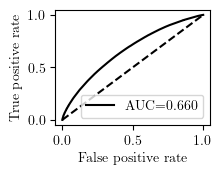

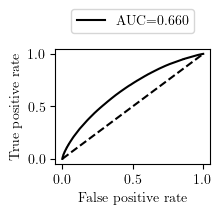


Evaluate_Model() for  BRFC_alpha_0_5_1_1_0_0_Easy
a, b =  0.792 0.9992


y_proba  Neg_1  Pos_1   mProb_1      TN     FP      FN     TP      FP/P
7914    0.792   13.0   16.0  0.551724  647357  29087  109418  16838  0.230381

c, d =  211 16838
a, b =  0.901 0.9968


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP      FP/P
9004    0.901    91.0    93.0  0.505435  670832  5612  121277  4979  0.044449

c, d =  244 4979
a, b =  0.9363 0.9965


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN    TP      FP/P
9357   0.9363   116.0   122.0  0.512605  673959  2485  123707  2549  0.019682

c, d =  256 2549
a, b =  0.9584 0.9684


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
9577   0.9584   215.0   219.0  0.504608  675243  1201  124775  1481  0.009512

c, d =  1084 1481
a, b =  0.9628 0.9669


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
9621   0.9628    406.0    409.0    0.50184  675443  1001  124973  1283   

          FP/P  
9621  0.007928

c, d =  1131 1283
a, b =  0.9634 0.9633


y_proba  Neg_200  Pos_200  mProb_200      TN   FP      FN    TP  \
9627   0.9634    816.0    820.0   0.501222  675467  977  124993  1263   

          FP/P  
9627  0.007738

c, d =  1268 1263
a, b =  0.9637 0.9643


y_proba  Neg_500  Pos_500  mProb_500      TN   FP      FN    TP  \
9630   0.9637   2133.0   2133.0        0.5  675481  963  125005  1251   

          FP/P  
9630  0.007627

c, d =  1223 1251
a, b =  nan 0.9433
a, b =  nan 0.8932


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Hard
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Hard
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Hard
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Hard
KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Hard  has  106017  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Hard
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Hard
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Hard
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Hard
ROC() for  KBFC_alpha_0_5_ga

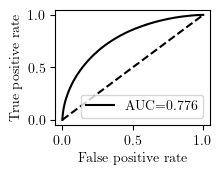

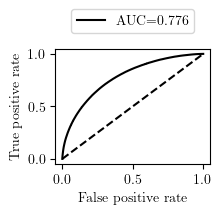


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Hard
a, b =  0.3593 0.9583


y_proba  Neg_1  Pos_1  mProb_1      TN     FP     FN     TP      FP/P
3593   0.3593   29.0   29.0      0.5  631620  44824  83889  42367  0.355025

c, d =  11 42367
a, b =  0.4723 0.9272


y_proba  Neg_10  Pos_10  mProb_10      TN     FP     FN     TP      FP/P
4723   0.4723   113.0   113.0       0.5  656617  19827  99322  26934  0.157038

c, d =  146 26934
a, b =  0.4951 0.6043


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
4951   0.4951   198.0   204.0  0.507463  659644  16800  101661  24595   

          FP/P  
4951  0.133063

c, d =  15194 24595
a, b =  0.5328 0.5849


y_proba  Neg_50  Pos_50  mProb_50      TN     FP      FN     TP  \
5328   0.5328   468.0   471.0  0.501597  663666  12778  105260  20996   

          FP/P  
5328  0.101207

c, d =  16625 20996
a, b =  0.5339 0.5504


y_proba  Neg_100  Pos_100  mProb_100      TN     FP      FN     TP  \
5339   0.5339    928.0    931.0   0.500807  663763  12681  105358  20898   

          FP/P  
5339  0.100439

c, d =  19401 20898
a, b =  0.5345 0.5395


y_proba  Neg_200  Pos_200  mProb_200      TN     FP      FN     TP  \
5345   0.5345   1818.0   1821.0   0.500412  663817  12627  105416  20840   

          FP/P  
5345  0.100011

c, d =  20355 20840
a, b =  0.5388 0.5403


y_proba  Neg_500  Pos_500  mProb_500      TN     FP      FN     TP  \
5388   0.5388   4477.0   4483.0   0.500335  664203  12241  105832  20424   

          FP/P  
5388  0.096954

c, d =  20297 20424
a, b =  0.5441 0.5447


y_proba  Neg_1000  Pos_1000  mProb_1000      TN     FP      FN     TP  \
5441   0.5441    8777.0    8786.0    0.500256  664640  11804  106283  19973   

          FP/P  
5441  0.093493

c, d =  19916 19973
a, b =  0.5603 0.5602


y_proba  Neg_2000  Pos_2000  mProb_2000      TN     FP      FN     TP  \
5603   0.5603   16724.0   16728.0     0.50006  666013  10431  107704  18552   

          FP/P  
5603  0.082618

c, d =  18563 18552


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Medium
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Medium
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Medium
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Medium
KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Medium  has  112152  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Medium
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Medium
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Medium
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Medium
ROC() for  KBFC_alpha_0_5_gamma_0_0_1_

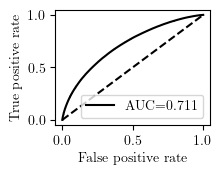

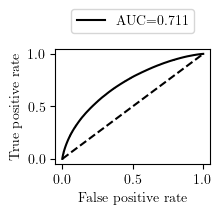


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Medium
a, b =  0.0044 0.8762


y_proba  Neg_1  Pos_1  mProb_1  TN      FP  FN      TP      FP/P
11   0.0044    0.0    1.0      1.0  17  676427   1  126255  5.357583

c, d =  1 126255
a, b =  0.4526 0.8502


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
4493   0.4526   109.0   109.0       0.5  665011  11433  114150  12106   

          FP/P  
4493  0.090554

c, d =  2 12106
a, b =  0.4767 0.7804


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN    TP      FP/P
4734   0.4767   189.0   189.0       0.5  667619  8825  116282  9974  0.069898

c, d =  92 9974
a, b =  0.4906 0.5641


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
4873   0.4906   419.0   420.0  0.500596  668861  7583  117417  8839  0.060061

c, d =  4224 8839
a, b =  0.5115 0.5617


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
5082   0.5115    714.0    720.0   0.502092  670553  5891  119000  7256   

          FP/P  
5082  0.046659

c, d =  4316 7256
a, b =  0.5072 0.5399


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
5039   0.5072   1486.0   1488.0   0.500336  670232  6212  118714  7542   

          FP/P  
5039  0.049202

c, d =  5422 7542
a, b =  0.5219 0.5247


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
5186   0.5219   3279.0   3289.0   0.500761  671233  5211  119779  6477   

          FP/P  
5186  0.041273

c, d =  6303 6477
a, b =  0.5257 0.5256


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
5224   0.5257    6383.0    6386.0    0.500117  671492  4952  120017  6239   

          FP/P  
5224  0.039222

c, d =  6244 6239
a, b =  0.5504 0.5503


y_proba  Neg_2000  Pos_2000  mProb_2000      TN    FP      FN    TP  \
5471   0.5504   10993.0   10998.0    0.500114  672858  3586  121390  4866   

          FP/P  
5471  0.028403

c, d =  4873 4866


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Easy
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Easy
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Easy
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Easy
KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Easy  has  65089  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Easy
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Easy
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Easy
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Easy
ROC() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Easy
False
False
./Imag

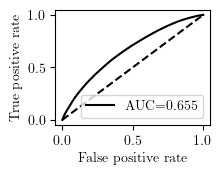

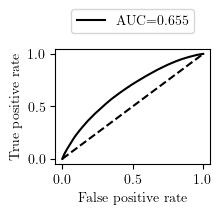


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_0_Easy
a, b =  0.3049 0.5174


y_proba  Neg_1  Pos_1  mProb_1      TN     FP      FN     TP      FP/P
2818   0.3049   27.0   27.0      0.5  655445  20999  115281  10975  0.166321

c, d =  0 10975
a, b =  0.38 0.5016


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP      FP/P
3569     0.38    73.0    74.0  0.503401  673379  3065  124277  1979  0.024276

c, d =  0 1979
a, b =  0.4176 0.492


y_proba  Neg_20  Pos_20  mProb_20      TN   FP      FN   TP      FP/P
3940   0.4176    43.0    44.0  0.505747  675518  926  125620  636  0.007334

c, d =  11 636
a, b =  nan 0.482
a, b =  nan 0.4739
a, b =  nan 0.4623
a, b =  nan 0.4404
a, b =  nan 0.4126
a, b =  nan 0.3621

Create_Files_for_Value_Counts_y_Proba
Create_Files_for_Analyze_Prediction()
Create_Files_for_Lengths_of_fpr_tpr
Create_Files_for_ROC_AUC
Create_Files_for_FP_P
Analyze_Results()

-------------------------------------

BRFC_alpha_0_5_1_1_0_1_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_1_1_0_1_Hard
Analyze_Prediction() for  BRFC_alpha_0_5_1_1_0_1_Hard
Value_Counts_y_proba() for  BRFC_alpha_0_5_1_1_0_1_Hard
FP_P_Locate() for  BRFC_alpha_0_5_1_1_0_1_Hard
BRFC_alpha_0_5_1_1_0_1_Hard  has  1367  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_1_1_0_1_Hard
Plot_Prediction_Wide() for  BRFC_alpha_0_5_1_1_0_1_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_0_1_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_0_1_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_0_1_Hard
Plot_Prediction_Zoom_Wide() for  BRFC_a

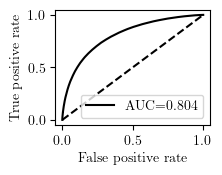

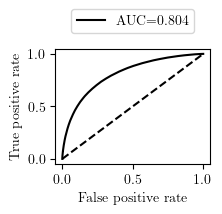


Evaluate_Model() for  BRFC_alpha_0_5_1_1_0_1_Hard
a, b =  0.1803 0.9612


y_proba  Neg_1  Pos_1  mProb_1     TN      FP    FN      TP     FP/P
201   0.1803    0.0    1.0      1.0  80272  596172  1450  124806  4.72193

c, d =  997 124806
a, b =  0.7369 0.8833


y_proba  Neg_10  Pos_10  mProb_10      TN     FP     FN     TP      FP/P
2095   0.7369    38.0    39.0  0.506494  648796  27648  87544  38712  0.218984

c, d =  7925 38712
a, b =  0.7522 0.8082


y_proba  Neg_20  Pos_20  mProb_20      TN     FP     FN     TP      FP/P
2163   0.7522    46.0    53.0  0.535354  654227  22217  92300  33956  0.175968

c, d =  22496 33956
a, b =  0.7767 0.782


y_proba  Neg_50  Pos_50  mProb_50      TN     FP     FN     TP      FP/P
2272   0.7767  2263.0  2263.0       0.5  659180  17264  97064  29192  0.136738

c, d =  27080 29192
a, b =  0.7756 0.7755


y_proba  Neg_100  Pos_100  mProb_100      TN     FP     FN     TP  \
2267   0.7756   6507.0   6744.0   0.508943  659146  17298  97041  29215   

          FP/P  
2267  0.137007

c, d =  29216 29215
a, b =  0.773 0.7729


y_proba  Neg_200  Pos_200  mProb_200      TN     FP     FN     TP  \
2253    0.773   9182.0   9263.0   0.502196  659077  17367  96958  29298   

          FP/P  
2253  0.137554

c, d =  29298 29298
a, b =  0.7736 0.7735


y_proba  Neg_500  Pos_500  mProb_500      TN     FP     FN     TP  \
2256   0.7736  28614.0  29202.0   0.505085  659099  17345  96976  29280   

         FP/P  
2256  0.13738

c, d =  29281 29280
a, b =  0.7862 0.786


y_proba  Neg_1000  Pos_1000  mProb_1000      TN     FP     FN     TP  \
2305   0.7862   55708.0   55835.0    0.500569  661381  15063  99265  26991   

          FP/P  
2305  0.119305

c, d =  26992 26991
a, b =  nan 0.664


-------------------------------------

BRFC_alpha_0_5_1_1_0_1_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_1_1_0_1_Medium
Analyze_Prediction() for  BRFC_alpha_0_5_1_1_0_1_Medium
Value_Counts_y_proba() for  BRFC_alpha_0_5_1_1_0_1_Medium
FP_P_Locate() for  BRFC_alpha_0_5_1_1_0_1_Medium
BRFC_alpha_0_5_1_1_0_1_Medium  has  14021  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_1_1_0_1_Medium
Plot_Prediction_Wide() for  BRFC_alpha_0_5_1_1_0_1_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_0_1_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_0_1_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_0_1_Medium
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_1_1_0_1_Medium
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_1_1_0_1_Medium
ROC() for  BRFC_alpha_0_5_1_1_0_1_Medium
False
False
./Images/Run_1_1_0_1/BRFC_alpha_0_5_1_1_0_1_Medium_ROC.png

ROC() for  BRFC_alpha_0_5_1_1_0_1_Medi

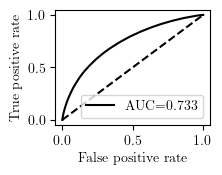

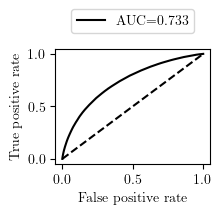


Evaluate_Model() for  BRFC_alpha_0_5_1_1_0_1_Medium
a, b =  0.0111 0.999


y_proba  Neg_1  Pos_1  mProb_1   TN      FP  FN      TP      FP/P
22   0.0111    0.0    1.0      1.0  663  675781  13  126243  5.352466

c, d =  162 126243
a, b =  0.8395 0.9967


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
7912   0.8395   963.0  1001.0  0.509674  662116  14328  110287  15969   

          FP/P  
7912  0.113484

c, d =  163 15969
a, b =  0.8395 0.9724


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
7912   0.8395  1026.0  1030.0  0.500973  662116  14328  110287  15969   

          FP/P  
7912  0.113484

c, d =  820 15969
a, b =  0.8678 0.9134


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN     TP      FP/P
8185   0.8678  1068.0  1079.0  0.502562  667521  8923  115075  11181  0.070674

c, d =  5093 11181
a, b =  0.8747 0.8805


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN     TP  \
8246   0.8747   2196.0   2236.0   0.504513  668666  7778  116187  10069   

          FP/P  
8246  0.061605

c, d =  8891 10069
a, b =  0.8791 0.879


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
8287   0.8791   3507.0   3626.0   0.508342  669104  7340  116510  9746   

          FP/P  
8287  0.058136

c, d =  9746 9746
a, b =  0.8807 0.8807


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
8301   0.8807   7141.0   7141.0        0.5  669798  6646  117369  8887   

          FP/P  
8301  0.052639

c, d =  8887 8887
a, b =  0.8826 0.8825


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
8319   0.8826   15115.0   15148.0    0.500545  669913  6531  117469  8787   

          FP/P  
8319  0.051728

c, d =  8787 8787
a, b =  nan 0.8554


-------------------------------------

BRFC_alpha_0_5_1_1_0_1_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_1_1_0_1_Easy
Analyze_Prediction() for  BRFC_alpha_0_5_1_1_0_1_Easy
Value_Counts_y_proba() for  BRFC_alpha_0_5_1_1_0_1_Easy
FP_P_Locate() for  BRFC_alpha_0_5_1_1_0_1_Easy
BRFC_alpha_0_5_1_1_0_1_Easy  has  63642  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_1_1_0_1_Easy
Plot_Prediction_Wide() for  BRFC_alpha_0_5_1_1_0_1_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_0_1_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_0_1_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_0_1_Easy
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_1_1_0_1_Easy
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_1_1_0_1_Easy
ROC() for  BRFC_alpha_0_5_1_1_0_1_Easy
False
False
./Images/Run_1_1_0_1/BRFC_alpha_0_5_1_1_0_1_Easy_ROC.png

ROC() for  BRFC_alpha_0_5_1_1_0_1_Easy
False
False
./Images/Run_1_1_0

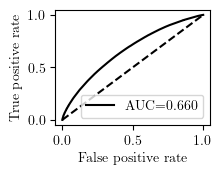

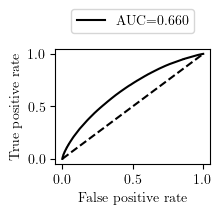


Evaluate_Model() for  BRFC_alpha_0_5_1_1_0_1_Easy
a, b =  0.792 0.9992


y_proba  Neg_1  Pos_1   mProb_1      TN     FP      FN     TP      FP/P
7914    0.792   13.0   16.0  0.551724  647357  29087  109418  16838  0.230381

c, d =  211 16838
a, b =  0.901 0.9968


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP      FP/P
9004    0.901    91.0    93.0  0.505435  670832  5612  121277  4979  0.044449

c, d =  244 4979
a, b =  0.9363 0.9965


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN    TP      FP/P
9357   0.9363   116.0   122.0  0.512605  673959  2485  123707  2549  0.019682

c, d =  256 2549
a, b =  0.9584 0.9684


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
9577   0.9584   215.0   219.0  0.504608  675243  1201  124775  1481  0.009512

c, d =  1084 1481
a, b =  0.9628 0.9669


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
9621   0.9628    406.0    409.0    0.50184  675443  1001  124973  1283   

          FP/P  
9621  0.007928

c, d =  1131 1283
a, b =  0.9634 0.9633


y_proba  Neg_200  Pos_200  mProb_200      TN   FP      FN    TP  \
9627   0.9634    816.0    820.0   0.501222  675467  977  124993  1263   

          FP/P  
9627  0.007738

c, d =  1268 1263
a, b =  0.9637 0.9643


y_proba  Neg_500  Pos_500  mProb_500      TN   FP      FN    TP  \
9630   0.9637   2133.0   2133.0        0.5  675481  963  125005  1251   

          FP/P  
9630  0.007627

c, d =  1223 1251
a, b =  nan 0.9433
a, b =  nan 0.8932


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Hard
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Hard
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Hard
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Hard
KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Hard  has  105955  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Hard
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Hard
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Hard
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Hard
ROC() for  KBFC_alpha_0_5_ga

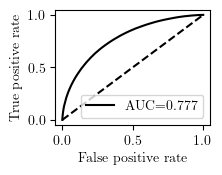

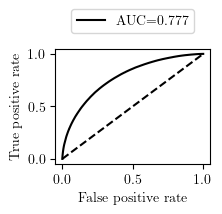


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Hard
a, b =  0.3596 0.9754


y_proba  Neg_1  Pos_1  mProb_1      TN     FP     FN     TP      FP/P
3595   0.3596   26.0   26.0      0.5  631476  44968  83548  42708  0.356165

c, d =  1 42708
a, b =  0.4615 0.9609


y_proba  Neg_10  Pos_10  mProb_10      TN     FP     FN     TP      FP/P
4614   0.4615   132.0   135.0  0.505618  654924  21520  97812  28444  0.170447

c, d =  10 28444
a, b =  0.4902 0.6419


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
4901   0.4902   242.0   246.0  0.504098  658990  17454  101033  25223   

          FP/P  
4901  0.138243

c, d =  12927 25223
a, b =  0.5094 0.5539


y_proba  Neg_50  Pos_50  mProb_50      TN     FP      FN     TP     FP/P
5093   0.5094   519.0   519.0       0.5  661239  15205  103002  23254  0.12043

c, d =  19261 23254
a, b =  0.5344 0.5514


y_proba  Neg_100  Pos_100  mProb_100      TN     FP      FN     TP  \
5343   0.5344    905.0    908.0   0.500827  663802  12642  105323  20933   

         FP/P  
5343  0.10013

c, d =  19471 20933
a, b =  0.5401 0.5459


y_proba  Neg_200  Pos_200  mProb_200      TN     FP      FN     TP  \
5400   0.5401   1735.0   1738.0   0.500432  664308  12136  105851  20405   

          FP/P  
5400  0.096122

c, d =  19931 20405
a, b =  0.5465 0.5464


y_proba  Neg_500  Pos_500  mProb_500      TN     FP      FN     TP  \
5464   0.5465   4232.0   4234.0   0.500118  664845  11599  106366  19890   

          FP/P  
5464  0.091869

c, d =  19898 19890
a, b =  0.5467 0.5466


y_proba  Neg_1000  Pos_1000  mProb_1000      TN     FP      FN     TP  \
5466   0.5467    8654.0    8663.0     0.50026  664863  11581  106389  19867   

          FP/P  
5466  0.091726

c, d =  19875 19867
a, b =  0.5591 0.559


y_proba  Neg_2000  Pos_2000  mProb_2000      TN     FP      FN     TP  \
5590   0.5591   16843.0   16850.0    0.500104  665868  10576  107443  18813   

          FP/P  
5590  0.083766

c, d =  18823 18813


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Medium
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Medium
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Medium
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Medium
KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Medium  has  111805  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Medium
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Medium
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Medium
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Medium
ROC() for  KBFC_alpha_0_5_gamma_0_0_1_

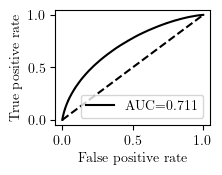

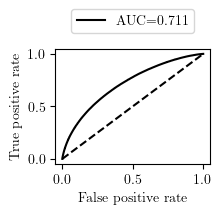


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Medium
a, b =  0.3466 0.8895


y_proba  Neg_1  Pos_1  mProb_1      TN     FP      FN     TP      FP/P
3417   0.3466   23.0   23.0      0.5  642383  34061  100037  26219  0.269777

c, d =  0 26219
a, b =  0.4363 0.8114


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
4314   0.4363   108.0   112.0  0.509091  661405  15039  111496  14760   

          FP/P  
4314  0.119115

c, d =  37 14760
a, b =  0.4735 0.7991


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
4686   0.4735   189.0   191.0  0.502632  666087  10357  115080  11176   

          FP/P  
4686  0.082032

c, d =  54 11176
a, b =  0.5003 0.6319


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
4954   0.5003   427.0   427.0       0.5  668682  7762  117334  8922  0.061478

c, d =  2089 8922
a, b =  0.5108 0.5771


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
5059   0.5108    749.0    756.0   0.502326  669528  6916  118125  8131   

          FP/P  
5059  0.054778

c, d =  4112 8131
a, b =  0.527 0.5719


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
5221    0.527   1287.0   1289.0   0.500388  670662  5782  119225  7031   

          FP/P  
5221  0.045796

c, d =  4333 7031
a, b =  0.5209 0.5261


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
5160   0.5209   3530.0   3530.0        0.5  670253  6191  118836  7420   

          FP/P  
5160  0.049035

c, d =  7091 7420
a, b =  0.5379 0.5378


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
5330   0.5379    6306.0    6307.0     0.50004  671334  5110  119924  6332   

          FP/P  
5330  0.040473

c, d =  6334 6332
a, b =  0.5624 0.5623


y_proba  Neg_2000  Pos_2000  mProb_2000      TN    FP      FN    TP  \
5575   0.5624   10923.0   10924.0    0.500023  672760  3684  121448  4808   

          FP/P  
5575  0.029179

c, d =  4814 4808


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Easy
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Easy
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Easy
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Easy
KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Easy  has  65089  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Easy
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Easy
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Easy
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Easy
ROC() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Easy
False
False
./Imag

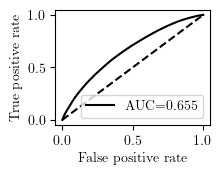

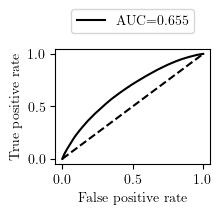


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_1_1_0_1_Easy
a, b =  0.3049 0.5174


y_proba  Neg_1  Pos_1  mProb_1      TN     FP      FN     TP      FP/P
2818   0.3049   27.0   27.0      0.5  655445  20999  115281  10975  0.166321

c, d =  0 10975
a, b =  0.38 0.5016


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP      FP/P
3569     0.38    73.0    74.0  0.503401  673379  3065  124277  1979  0.024276

c, d =  0 1979
a, b =  0.4176 0.492


y_proba  Neg_20  Pos_20  mProb_20      TN   FP      FN   TP      FP/P
3940   0.4176    43.0    44.0  0.505747  675518  926  125620  636  0.007334

c, d =  11 636
a, b =  nan 0.482
a, b =  nan 0.4739
a, b =  nan 0.4623
a, b =  nan 0.4404
a, b =  nan 0.4126
a, b =  nan 0.3621

Create_Files_for_Value_Counts_y_Proba
Create_Files_for_Analyze_Prediction()
Create_Files_for_Lengths_of_fpr_tpr
Create_Files_for_ROC_AUC
Create_Files_for_FP_P
Analyze_Results()

-------------------------------------

BRFC_alpha_0_5_1_1_1_0_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_1_1_1_0_Hard
Analyze_Prediction() for  BRFC_alpha_0_5_1_1_1_0_Hard
Value_Counts_y_proba() for  BRFC_alpha_0_5_1_1_1_0_Hard
FP_P_Locate() for  BRFC_alpha_0_5_1_1_1_0_Hard
BRFC_alpha_0_5_1_1_1_0_Hard  has  1263  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_1_1_1_0_Hard
Plot_Prediction_Wide() for  BRFC_alpha_0_5_1_1_1_0_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_1_0_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_1_0_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_1_0_Hard
Plot_Prediction_Zoom_Wide() for  BRFC_a

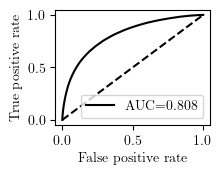

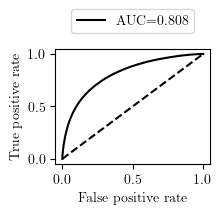


Evaluate_Model() for  BRFC_alpha_0_5_1_1_1_0_Hard
a, b =  0.0429 0.981


y_proba  Neg_1  Pos_1  mProb_1    TN      FP  FN      TP      FP/P
14   0.0429    1.0    1.0      0.5  3418  673026  22  126234  5.330646

c, d =  374 126234
a, b =  0.7358 0.8232


y_proba  Neg_10  Pos_10  mProb_10      TN     FP     FN     TP      FP/P
1917   0.7358    84.0    85.0  0.502959  649512  26932  86096  40160  0.213313

c, d =  19424 40160
a, b =  0.7368 0.7964


y_proba  Neg_20  Pos_20  mProb_20      TN     FP     FN     TP      FP/P
1922   0.7368   105.0   106.0   0.50237  649538  26906  86132  40124  0.213107

c, d =  26004 40124
a, b =  0.7637 0.7643


y_proba  Neg_50  Pos_50  mProb_50      TN     FP     FN     TP      FP/P
2022   0.7637  4569.0  4576.0  0.500383  657192  19252  93260  32996  0.152484

c, d =  32991 32996
a, b =  0.7637 0.7633


y_proba  Neg_100  Pos_100  mProb_100      TN     FP     FN     TP  \
2022   0.7637   4761.0   4804.0   0.502248  657192  19252  93260  32996   

          FP/P  
2022  0.152484

c, d =  32996 32996
a, b =  0.7625 0.762


y_proba  Neg_200  Pos_200  mProb_200      TN     FP     FN     TP  \
2018   0.7625  13938.0  14079.0   0.502516  657172  19272  93238  33018   

          FP/P  
2018  0.152642

c, d =  33024 33018
a, b =  0.7683 0.768


y_proba  Neg_500  Pos_500  mProb_500      TN     FP     FN     TP  \
2040   0.7683  31028.0  31919.0   0.507077  657274  19170  93359  32897   

          FP/P  
2040  0.151834

c, d =  32906 32897
a, b =  nan 0.7747
a, b =  nan 0.638


-------------------------------------

BRFC_alpha_0_5_1_1_1_0_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_1_1_1_0_Medium
Analyze_Prediction() for  BRFC_alpha_0_5_1_1_1_0_Medium
Value_Counts_y_proba() for  BRFC_alpha_0_5_1_1_1_0_Medium
FP_P_Locate() for  BRFC_alpha_0_5_1_1_1_0_Medium
BRFC_alpha_0_5_1_1_1_0_Medium  has  13384  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_1_1_1_0_Medium
Plot_Prediction_Wide() for  BRFC_alpha_0_5_1_1_1_0_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_1_0_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_1_0_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_1_0_Medium
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_1_1_1_0_Medium
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_1_1_1_0_Medium
ROC() for  BRFC_alpha_0_5_1_1_1_0_Medium
False
False
./Images/Run_1_1_1_0/BRFC_alpha_0_5_1_1_1_0_Medium_ROC.png

ROC() for  BRFC_alp

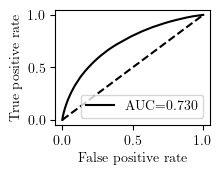

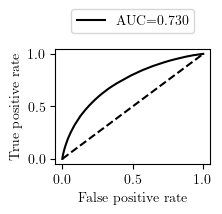


Evaluate_Model() for  BRFC_alpha_0_5_1_1_1_0_Medium
a, b =  0.0213 0.995


y_proba  Neg_1  Pos_1  mProb_1    TN      FP  FN      TP      FP/P
49   0.0213    1.0    1.0      0.5  1337  675107  29  126227  5.347128

c, d =  127 126227
a, b =  0.84 0.9875


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP     FP/P
7934     0.84   957.0   960.0  0.500782  663581  12863  112266  13990  0.10188

c, d =  356 13990
a, b =  0.8495 0.9855


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP     FP/P
8025   0.8495   949.0   951.0  0.500526  664634  11810  112959  13297  0.09354

c, d =  362 13297
a, b =  0.8576 0.9366


y_proba  Neg_50  Pos_50  mProb_50      TN     FP      FN     TP  \
8101   0.8576  1134.0  1150.0  0.503503  666295  10149  114418  11838   

          FP/P  
8101  0.080384

c, d =  2848 11838
a, b =  0.8647 0.8793


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN     TP  \
8168   0.8647   2322.0   2351.0   0.503103  667556  8888  115650  10606   

          FP/P  
8168  0.070397

c, d =  8883 10606
a, b =  0.879 0.8825


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
8300    0.879   3363.0   3481.0   0.508621  669489  6955  117361  8895   

          FP/P  
8300  0.055086

c, d =  7973 8895
a, b =  0.8824 0.8822


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
8330   0.8824   7198.0   7312.0   0.503928  670209  6235  118256  8000   

          FP/P  
8330  0.049384

c, d =  8000 8000
a, b =  0.8884 0.8883


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
8384   0.8884   13255.0   13260.0    0.500094  670702  5742  118666  7590   

          FP/P  
8384  0.045479

c, d =  7590 7590
a, b =  nan 0.8527


-------------------------------------

BRFC_alpha_0_5_1_1_1_0_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_1_1_1_0_Easy
Analyze_Prediction() for  BRFC_alpha_0_5_1_1_1_0_Easy
Value_Counts_y_proba() for  BRFC_alpha_0_5_1_1_1_0_Easy
FP_P_Locate() for  BRFC_alpha_0_5_1_1_1_0_Easy
BRFC_alpha_0_5_1_1_1_0_Easy  has  63586  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_1_1_1_0_Easy
Plot_Prediction_Wide() for  BRFC_alpha_0_5_1_1_1_0_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_1_0_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_1_0_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_1_0_Easy
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_1_1_1_0_Easy
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_1_1_1_0_Easy
ROC() for  BRFC_alpha_0_5_1_1_1_0_Easy
False
False
./Images/Run_1_1_1_0/BRFC_alpha_0_5_1_1_1_0_Easy_ROC.png

ROC() for  BRFC_alpha_0_5_1_1_1_0_Easy
False
False
./Images/Run_1_1_1

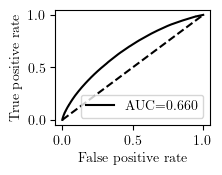

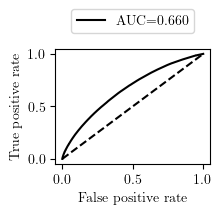


Evaluate_Model() for  BRFC_alpha_0_5_1_1_1_0_Easy
a, b =  0.7531 0.999


y_proba  Neg_1  Pos_1   mProb_1      TN     FP      FN     TP      FP/P
7528   0.7531   11.0   13.0  0.541667  631830  44614  103194  23062  0.353361

c, d =  196 23062
a, b =  0.8843 0.9981


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP      FP/P
8840   0.8843   111.0   111.0       0.5  668758  7686  119934  6322  0.060876

c, d =  200 6322
a, b =  0.9214 0.9887


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN    TP      FP/P
9211   0.9214   147.0   150.0  0.505051  672812  3632  122795  3461  0.028767

c, d =  414 3461
a, b =  0.96 0.9661


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
9593     0.96   235.0   235.0       0.5  675339  1105  124849  1407  0.008752

c, d =  1137 1407
a, b =  0.9629 0.9633


y_proba  Neg_100  Pos_100  mProb_100      TN   FP      FN    TP  \
9621   0.9629    431.0    433.0   0.501157  675465  979  124978  1278   

          FP/P  
9621  0.007754

c, d =  1254 1278
a, b =  0.9648 0.9647


y_proba  Neg_200  Pos_200  mProb_200      TN   FP      FN    TP  \
9640   0.9648    819.0    824.0   0.501522  675549  895  125058  1198   

          FP/P  
9640  0.007089

c, d =  1199 1198
a, b =  0.9647 0.9651


y_proba  Neg_500  Pos_500  mProb_500      TN   FP      FN    TP  \
9639   0.9647   2098.0   2098.0        0.5  675549  895  125057  1199   

          FP/P  
9639  0.007089

c, d =  1175 1199
a, b =  nan 0.9423
a, b =  nan 0.8922


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Hard
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Hard
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Hard
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Hard
KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Hard  has  106151  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Hard
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Hard
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Hard
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Hard
ROC() for  KBFC_alpha_0_5_ga

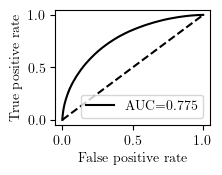

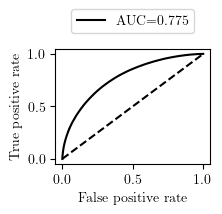


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Hard
a, b =  0.3549 0.9569


y_proba  Neg_1  Pos_1   mProb_1      TN     FP     FN     TP      FP/P
3548   0.3549   25.0   28.0  0.528302  636113  40331  86343  39913  0.319438

c, d =  13 39913
a, b =  0.4407 0.9367


y_proba  Neg_10  Pos_10  mProb_10      TN     FP     FN     TP      FP/P
4406   0.4407   121.0   121.0       0.5  654717  21727  97947  28309  0.172087

c, d =  71 28309
a, b =  0.4941 0.5751


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
4940   0.4941   207.0   210.0  0.503597  661604  14840  103496  22760   

          FP/P  
4940  0.117539

c, d =  16133 22760
a, b =  0.4994 0.5631


y_proba  Neg_50  Pos_50  mProb_50      TN     FP      FN     TP  \
4993   0.4994   472.0   481.0  0.504722  662136  14308  103992  22264   

          FP/P  
4993  0.113325

c, d =  17027 22264
a, b =  0.5277 0.533


y_proba  Neg_100  Pos_100  mProb_100      TN     FP      FN     TP  \
5276   0.5277    832.0    833.0     0.5003  664764  11680  106436  19820   

         FP/P  
5276  0.09251

c, d =  19373 19820
a, b =  0.5261 0.5323


y_proba  Neg_200  Pos_200  mProb_200      TN     FP      FN     TP  \
5260   0.5261   1673.0   1674.0   0.500149  664639  11805  106308  19948   

          FP/P  
5260  0.093501

c, d =  19420 19948
a, b =  0.5339 0.5346


y_proba  Neg_500  Pos_500  mProb_500      TN     FP      FN     TP  \
5338   0.5339   4072.0   4073.0   0.500061  665299  11145  106957  19299   

          FP/P  
5338  0.088273

c, d =  19248 19299
a, b =  0.5333 0.5333


y_proba  Neg_1000  Pos_1000  mProb_1000      TN     FP      FN     TP  \
5332   0.5333    8254.0    8254.0         0.5  665243  11201  106903  19353   

          FP/P  
5332  0.088717

c, d =  19353 19353
a, b =  0.5426 0.5428


y_proba  Neg_2000  Pos_2000  mProb_2000      TN     FP      FN     TP  \
5425   0.5426   16431.0   16433.0     0.50003  665997  10447  107679  18577   

          FP/P  
5425  0.082745

c, d =  18562 18577


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Medium
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Medium
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Medium
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Medium
KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Medium  has  112275  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Medium
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Medium
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Medium
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Medium
ROC() for  KBFC_alpha_0_5_gamma_0_0_1_

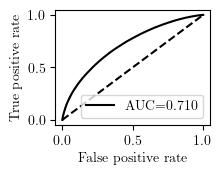

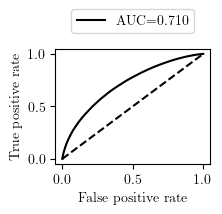


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Medium
a, b =  0.326 0.8428


y_proba  Neg_1  Pos_1  mProb_1      TN     FP     FN     TP      FP/P
3230    0.326   26.0   26.0      0.5  641119  35325  99553  26703  0.279789

c, d =  7 26703
a, b =  0.4006 0.8202


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
3976   0.4006   136.0   141.0  0.509025  658506  17938  109504  16752   

          FP/P  
3976  0.142076

c, d =  25 16752
a, b =  0.4647 0.7288


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN     TP      FP/P
4617   0.4647   186.0   187.0   0.50134  666978  9466  115981  10275  0.074975

c, d =  284 10275
a, b =  0.4903 0.5793


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
4873   0.4903   393.0   393.0       0.5  669393  7051  118052  8204  0.055847

c, d =  3184 8204
a, b =  0.5062 0.5245


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
5032   0.5062    697.0    698.0   0.500358  670626  5818  119184  7072   

          FP/P  
5032  0.046081

c, d =  5882 7072
a, b =  0.5071 0.5083


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
5041   0.5071   1397.0   1399.0   0.500358  670690  5754  119242  7014   

          FP/P  
5041  0.045574

c, d =  6926 7014
a, b =  0.517 0.5173


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP    FP/P
5140    0.517   3204.0   3207.0   0.500234  671318  5126  119932  6324  0.0406

c, d =  6304 6324
a, b =  0.5243 0.5248


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
5213   0.5243    6076.0    6080.0    0.500165  671756  4688  120367  5889   

          FP/P  
5213  0.037131

c, d =  5868 5889
a, b =  0.5493 0.5492


y_proba  Neg_2000  Pos_2000  mProb_2000      TN    FP      FN    TP  \
5463   0.5493   10437.0   10438.0    0.500024  673078  3366  121760  4496   

         FP/P  
5463  0.02666

c, d =  4503 4496


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Easy
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Easy
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Easy
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Easy
KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Easy  has  65129  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Easy
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Easy
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Easy
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Easy
ROC() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Easy
False
False
./Imag

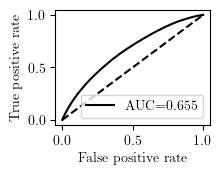

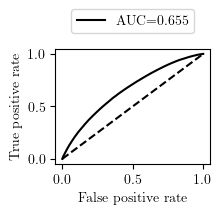


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_0_Easy
a, b =  0.3071 0.5214


y_proba  Neg_1  Pos_1   mProb_1      TN     FP      FN     TP      FP/P
2842   0.3071   32.0   33.0  0.507692  656518  19926  115757  10499  0.157822

c, d =  0 10499
a, b =  0.3994 0.4985


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP      FP/P
3762   0.3994    36.0    36.0       0.5  674743  1701  125130  1126  0.013473

c, d =  0 1126
a, b =  0.4333 0.4919


y_proba  Neg_20  Pos_20  mProb_20      TN   FP      FN   TP      FP/P
4077   0.4333    28.0    30.0  0.517241  675908  536  125883  373  0.004245

c, d =  9 373
a, b =  nan 0.4828
a, b =  nan 0.4742
a, b =  nan 0.4623
a, b =  nan 0.4401
a, b =  nan 0.4122
a, b =  nan 0.3616

Create_Files_for_Value_Counts_y_Proba
Create_Files_for_Analyze_Prediction()
Create_Files_for_Lengths_of_fpr_tpr
Create_Files_for_ROC_AUC
Create_Files_for_FP_P
Analyze_Results()

-------------------------------------

BRFC_alpha_0_5_1_1_1_1_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_1_1_1_1_Hard
Analyze_Prediction() for  BRFC_alpha_0_5_1_1_1_1_Hard
Value_Counts_y_proba() for  BRFC_alpha_0_5_1_1_1_1_Hard
FP_P_Locate() for  BRFC_alpha_0_5_1_1_1_1_Hard
BRFC_alpha_0_5_1_1_1_1_Hard  has  1439  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_1_1_1_1_Hard
Plot_Prediction_Wide() for  BRFC_alpha_0_5_1_1_1_1_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_1_1_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_1_1_Hard
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_1_1_Hard
Plot_Prediction_Zoom_Wide() for  BRFC_a

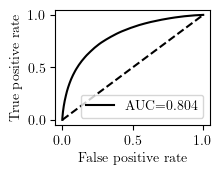

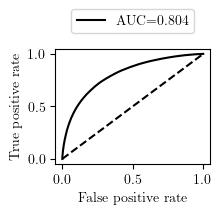


Evaluate_Model() for  BRFC_alpha_0_5_1_1_1_1_Hard
a, b =  0.118 0.9742


y_proba  Neg_1  Pos_1  mProb_1     TN      FP   FN      TP      FP/P
106    0.118    1.0    1.0      0.5  27791  648653  339  125917  5.137601

c, d =  712 125917
a, b =  0.7411 0.872


y_proba  Neg_10  Pos_10  mProb_10      TN     FP     FN     TP      FP/P
2198   0.7411    11.0    11.0       0.5  651438  25006  89517  36739  0.198058

c, d =  9600 36739
a, b =  0.7527 0.8129


y_proba  Neg_20  Pos_20  mProb_20      TN     FP     FN     TP      FP/P
2242   0.7527   106.0   108.0  0.504673  654210  22234  92004  34252  0.176103

c, d =  20602 34252
a, b =  0.764 0.7657


y_proba  Neg_50  Pos_50  mProb_50      TN     FP     FN     TP      FP/P
2294    0.764  4632.0  4637.0   0.50027  656737  19707  94436  31820  0.156088

c, d =  31766 31820
a, b =  0.7609 0.7683


y_proba  Neg_100  Pos_100  mProb_100      TN     FP     FN     TP  \
2282   0.7609   4845.0   4847.0   0.500103  656690  19754  94397  31859   

         FP/P  
2282  0.15646

c, d =  31718 31859
a, b =  0.7658 0.7657


y_proba  Neg_200  Pos_200  mProb_200      TN     FP     FN     TP  \
2303   0.7658  11751.0  11791.0    0.50085  656805  19639  94491  31765   

          FP/P  
2303  0.155549

c, d =  31766 31765
a, b =  0.7717 0.7715


y_proba  Neg_500  Pos_500  mProb_500      TN     FP     FN     TP  \
2324   0.7717  28855.0  29246.0   0.503365  659002  17442  96782  29474   

          FP/P  
2324  0.138148

c, d =  29477 29474
a, b =  0.7852 0.785


y_proba  Neg_1000  Pos_1000  mProb_1000      TN     FP     FN     TP  \
2381   0.7852   56046.0   56206.0    0.500713  661320  15124  99142  27114   

          FP/P  
2381  0.119788

c, d =  27114 27114
a, b =  nan 0.6617


-------------------------------------

BRFC_alpha_0_5_1_1_1_1_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_1_1_1_1_Medium
Analyze_Prediction() for  BRFC_alpha_0_5_1_1_1_1_Medium
Value_Counts_y_proba() for  BRFC_alpha_0_5_1_1_1_1_Medium
FP_P_Locate() for  BRFC_alpha_0_5_1_1_1_1_Medium
BRFC_alpha_0_5_1_1_1_1_Medium  has  14855  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_1_1_1_1_Medium
Plot_Prediction_Wide() for  BRFC_alpha_0_5_1_1_1_1_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_1_1_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_1_1_Medium
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_1_1_Medium
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_1_1_1_1_Medium
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_1_1_1_1_Medium
ROC() for  BRFC_alpha_0_5_1_1_1_1_Medium
False
False
./Images/Run_1_1_1_1/BRFC_alpha_0_5_1_1_1_1_Medium_ROC.png

ROC() for  BRFC_alpha_0_5_1_1_1_1_Med

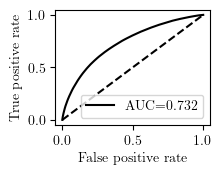

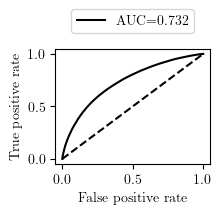


Evaluate_Model() for  BRFC_alpha_0_5_1_1_1_1_Medium
a, b =  0.0185 0.994


y_proba  Neg_1  Pos_1  mProb_1   TN      FP  FN      TP      FP/P
42   0.0185    0.0    1.0      1.0  968  675476  15  126241  5.350051

c, d =  190 126241
a, b =  0.8396 0.9723


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
7969   0.8396   966.0  1007.0   0.51039  661779  14665  109959  16297   

          FP/P  
7969  0.116153

c, d =  945 16297
a, b =  0.8395 0.9619


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
7968   0.8395  1013.0  1029.0  0.503918  661778  14666  109957  16299   

          FP/P  
7968  0.116161

c, d =  1459 16299
a, b =  0.8584 0.9332


y_proba  Neg_50  Pos_50  mProb_50      TN     FP      FN     TP  \
8153   0.8584  1200.0  1201.0  0.500208  665653  10791  113369  12887   

          FP/P  
8153  0.085469

c, d =  3494 12887
a, b =  0.865 0.8849


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN     TP  \
8218    0.865   2380.0   2445.0   0.506736  667026  9418  114729  11527   

          FP/P  
8218  0.074594

c, d =  8760 11527
a, b =  0.8797 0.889


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
8361   0.8797   3410.0   3509.0   0.507154  668944  7500  116519  9737   

          FP/P  
8361  0.059403

c, d =  8446 9737
a, b =  0.8825 0.8824


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
8388   0.8825   6922.0   6946.0   0.500865  669744  6700  117367  8889   

          FP/P  
8388  0.053067

c, d =  8908 8889
a, b =  0.8841 0.884


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
8402   0.8841   14158.0   14168.0    0.500177  669852  6592  117470  8786   

          FP/P  
8402  0.052211

c, d =  8788 8786
a, b =  nan 0.8599


-------------------------------------

BRFC_alpha_0_5_1_1_1_1_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  BRFC_alpha_0_5_1_1_1_1_Easy
Analyze_Prediction() for  BRFC_alpha_0_5_1_1_1_1_Easy
Value_Counts_y_proba() for  BRFC_alpha_0_5_1_1_1_1_Easy
FP_P_Locate() for  BRFC_alpha_0_5_1_1_1_1_Easy
BRFC_alpha_0_5_1_1_1_1_Easy  has  63586  custom_cut intervals of minCut 100
Plot_Prediction() for  BRFC_alpha_0_5_1_1_1_1_Easy
Plot_Prediction_Wide() for  BRFC_alpha_0_5_1_1_1_1_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_1_1_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_1_1_Easy
Plot_Prediction_Zoom() for  BRFC_alpha_0_5_1_1_1_1_Easy
Plot_Prediction_Zoom_Wide() for  BRFC_alpha_0_5_1_1_1_1_Easy
Plot_Prediction_Zoom_Wide_Right() for  BRFC_alpha_0_5_1_1_1_1_Easy
ROC() for  BRFC_alpha_0_5_1_1_1_1_Easy
False
False
./Images/Run_1_1_1_1/BRFC_alpha_0_5_1_1_1_1_Easy_ROC.png

ROC() for  BRFC_alpha_0_5_1_1_1_1_Easy
False
False
./Images/Run_1_1_1

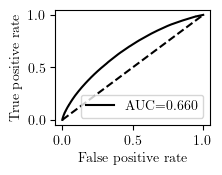

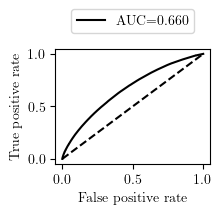


Evaluate_Model() for  BRFC_alpha_0_5_1_1_1_1_Easy
a, b =  0.7531 0.999


y_proba  Neg_1  Pos_1   mProb_1      TN     FP      FN     TP      FP/P
7528   0.7531   11.0   13.0  0.541667  631830  44614  103194  23062  0.353361

c, d =  196 23062
a, b =  0.8843 0.9981


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP      FP/P
8840   0.8843   111.0   111.0       0.5  668758  7686  119934  6322  0.060876

c, d =  200 6322
a, b =  0.9214 0.9887


y_proba  Neg_20  Pos_20  mProb_20      TN    FP      FN    TP      FP/P
9211   0.9214   147.0   150.0  0.505051  672812  3632  122795  3461  0.028767

c, d =  414 3461
a, b =  0.96 0.9661


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
9593     0.96   235.0   235.0       0.5  675339  1105  124849  1407  0.008752

c, d =  1137 1407
a, b =  0.9629 0.9633


y_proba  Neg_100  Pos_100  mProb_100      TN   FP      FN    TP  \
9621   0.9629    431.0    433.0   0.501157  675465  979  124978  1278   

          FP/P  
9621  0.007754

c, d =  1254 1278
a, b =  0.9648 0.9647


y_proba  Neg_200  Pos_200  mProb_200      TN   FP      FN    TP  \
9640   0.9648    819.0    824.0   0.501522  675549  895  125058  1198   

          FP/P  
9640  0.007089

c, d =  1199 1198
a, b =  0.9647 0.9651


y_proba  Neg_500  Pos_500  mProb_500      TN   FP      FN    TP  \
9639   0.9647   2098.0   2098.0        0.5  675549  895  125057  1199   

          FP/P  
9639  0.007089

c, d =  1175 1199
a, b =  nan 0.9423
a, b =  nan 0.8922


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Hard
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Hard
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Hard
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Hard
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Hard
KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Hard  has  106030  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Hard
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Hard
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Hard
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Hard
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Hard
ROC() for  KBFC_alpha_0_5_ga

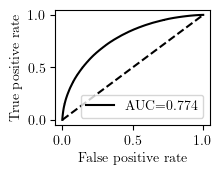

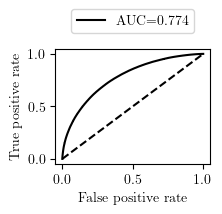


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Hard
a, b =  0.3484 0.9612


y_proba  Neg_1  Pos_1   mProb_1      TN     FP     FN     TP      FP/P
3482   0.3484   26.0   27.0  0.509434  628455  47989  82519  43737  0.380093

c, d =  13 43737
a, b =  0.4566 0.9361


y_proba  Neg_10  Pos_10  mProb_10      TN     FP     FN     TP      FP/P
4564   0.4566   117.0   119.0  0.504237  654785  21659  97941  28315  0.171548

c, d =  76 28315
a, b =  0.4738 0.5926


y_proba  Neg_20  Pos_20  mProb_20      TN     FP     FN     TP      FP/P
4736   0.4738   227.0   228.0  0.501099  657286  19158  99790  26466  0.151739

c, d =  15877 26466
a, b =  0.507 0.5584


y_proba  Neg_50  Pos_50  mProb_50      TN     FP      FN     TP  \
5068    0.507   515.0   517.0  0.500969  661392  15052  103227  23029   

          FP/P  
5068  0.119218

c, d =  18498 23029
a, b =  0.5208 0.557


y_proba  Neg_100  Pos_100  mProb_100      TN     FP      FN     TP  \
5206   0.5208    955.0    955.0        0.5  662864  13580  104606  21650   

          FP/P  
5206  0.107559

c, d =  18604 21650
a, b =  0.5405 0.5535


y_proba  Neg_200  Pos_200  mProb_200      TN     FP      FN     TP  \
5403   0.5405   1704.0   1704.0        0.5  664645  11799  106346  19910   

          FP/P  
5403  0.093453

c, d =  18866 19910
a, b =  0.5421 0.5458


y_proba  Neg_500  Pos_500  mProb_500      TN     FP      FN     TP  \
5419   0.5421   4225.0   4236.0    0.50065  664783  11661  106474  19782   

         FP/P  
5419  0.09236

c, d =  19487 19782
a, b =  0.542 0.5421


y_proba  Neg_1000  Pos_1000  mProb_1000      TN     FP      FN     TP  \
5418    0.542    8615.0    8617.0    0.500058  664778  11666  106463  19793   

        FP/P  
5418  0.0924

c, d =  19782 19793
a, b =  0.5554 0.5553


y_proba  Neg_2000  Pos_2000  mProb_2000      TN     FP      FN     TP  \
5552   0.5554   16727.0   16729.0     0.50003  665874  10570  107539  18717   

          FP/P  
5552  0.083719

c, d =  18726 18717


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Medium
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Medium
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Medium
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Medium
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Medium
KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Medium  has  112057  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Medium
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Medium
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Medium
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Medium
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Medium
ROC() for  KBFC_alpha_0_5_gamma_0_0_1_

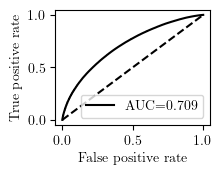

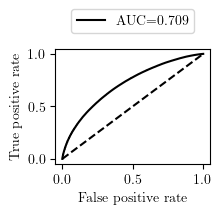


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Medium
a, b =  0.3291 0.8734


y_proba  Neg_1  Pos_1  mProb_1      TN     FP     FN     TP      FP/P
3256   0.3291   26.0   26.0      0.5  638049  38395  98087  28169  0.304104

c, d =  0 28169
a, b =  0.423 0.8332


y_proba  Neg_10  Pos_10  mProb_10      TN     FP      FN     TP  \
4195    0.423   130.0   131.0  0.501916  659886  16558  110556  15700   

          FP/P  
4195  0.131146

c, d =  14 15700
a, b =  0.4593 0.803


y_proba  Neg_20  Pos_20  mProb_20      TN     FP      FN     TP  \
4558   0.4593   203.0   205.0  0.502451  664744  11700  114140  12116   

          FP/P  
4558  0.092669

c, d =  53 12116
a, b =  0.4913 0.6078


y_proba  Neg_50  Pos_50  mProb_50      TN    FP      FN    TP      FP/P
4878   0.4913   423.0   423.0       0.5  668100  8344  116878  9378  0.066088

c, d =  2741 9378
a, b =  0.5143 0.5496


y_proba  Neg_100  Pos_100  mProb_100      TN    FP      FN    TP  \
5108   0.5143    739.0    745.0   0.502022  670028  6416  118593  7663   

          FP/P  
5108  0.050817

c, d =  5382 7663
a, b =  0.5248 0.5311


y_proba  Neg_200  Pos_200  mProb_200      TN    FP      FN    TP  \
5213   0.5248   1360.0   1362.0   0.500367  670786  5658  119323  6933   

          FP/P  
5213  0.044814

c, d =  6527 6933
a, b =  0.5282 0.5285


y_proba  Neg_500  Pos_500  mProb_500      TN    FP      FN    TP  \
5247   0.5282   3326.0   3327.0   0.500075  671014  5430  119553  6703   

          FP/P  
5247  0.043008

c, d =  6690 6703
a, b =  0.5383 0.5382


y_proba  Neg_1000  Pos_1000  mProb_1000      TN    FP      FN    TP  \
5348   0.5383    6150.0    6152.0    0.500081  671649  4795  120206  6050   

          FP/P  
5348  0.037978

c, d =  6054 6050
a, b =  0.5627 0.5626


y_proba  Neg_2000  Pos_2000  mProb_2000      TN    FP      FN    TP  \
5592   0.5627   10580.0   10589.0    0.500213  672941  3503  121591  4665   

          FP/P  
5592  0.027745

c, d =  4671 4665


-------------------------------------

KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Easy
802700
802700
num_prec =  4
Charts_and_Plots() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Easy
Analyze_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Easy
Value_Counts_y_proba() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Easy
FP_P_Locate() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Easy
KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Easy  has  65129  custom_cut intervals of minCut 100
Plot_Prediction() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Easy
Plot_Prediction_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Easy
Plot_Prediction_Zoom() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Easy
Plot_Prediction_Zoom_Wide() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Easy
Plot_Prediction_Zoom_Wide_Right() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Easy
ROC() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Easy
False
False
./Imag

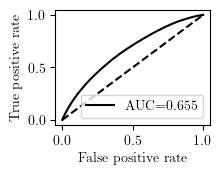

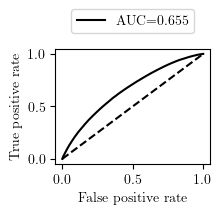


Evaluate_Model() for  KBFC_alpha_0_5_gamma_0_0_1_1_1_1_Easy
a, b =  0.3071 0.5214


y_proba  Neg_1  Pos_1   mProb_1      TN     FP      FN     TP      FP/P
2842   0.3071   32.0   33.0  0.507692  656518  19926  115757  10499  0.157822

c, d =  0 10499
a, b =  0.3994 0.4985


y_proba  Neg_10  Pos_10  mProb_10      TN    FP      FN    TP      FP/P
3762   0.3994    36.0    36.0       0.5  674743  1701  125130  1126  0.013473

c, d =  0 1126
a, b =  0.4333 0.4919


y_proba  Neg_20  Pos_20  mProb_20      TN   FP      FN   TP      FP/P
4077   0.4333    28.0    30.0  0.517241  675908  536  125883  373  0.004245

c, d =  9 373
a, b =  nan 0.4828
a, b =  nan 0.4742
a, b =  nan 0.4623
a, b =  nan 0.4401
a, b =  nan 0.4122
a, b =  nan 0.3616

CPU times: user 2h 20min 45s, sys: 2min 59s, total: 2h 23min 44s
Wall time: 2h 21min 58s


In [22]:
%%time
Runs = [
    '_0_0_0_0',
    '_0_0_0_1',
    '_0_0_1_0',
    '_0_0_1_1',
    '_0_1_0_0',
    '_0_1_0_1',
    '_0_1_1_0',
    '_0_1_1_1',
    '_1_0_0_0',
    '_1_0_0_1',
    '_1_0_1_0',
    '_1_0_1_1',
    '_1_1_0_0',
    '_1_1_0_1',
    '_1_1_1_0',
    '_1_1_1_1',
]

#Runs = ['_0_0_1_0_1']

# Globally defined
Directory = './Analyze_Proba_1/'

data_directory = Directory + 'All'
if not os.path.exists(data_directory):
    os.makedirs(data_directory)
Create_Files('All')

for run in Runs:
    data_directory = Directory + 'Run' + run
    if not os.path.exists(data_directory):
        os.makedirs(data_directory)
    images_directory = './Images/Run' + run
    if not os.path.exists(images_directory):
        os.makedirs(images_directory)
    Create_Files('Run' + run)
    Analyze_Results(run)
    
    
        

#CPU times: user 1h 3min 10s, sys: 1min 51s, total: 1h 5min 2s
#Wall time: 1h 3min 56s

## Threshold Illustrations

In [23]:
def Plot_Prediction_Wide_Threshold(y_test, y_proba, threshold, filename, title):
    print ('Plot_Prediction()')
    print (filename)
    
#    print ('y_test = ', y_test)
#    print ('y_proba = ',y_proba)

#    y_test = y_test.numpy()
    A = pd.DataFrame(y_proba, columns=['HOSPITAL'])
    B = pd.DataFrame(y_test, columns=['HOSPITAL'])
    B = B.reset_index(drop=True)
    C = A[B['HOSPITAL']==0]
    D = A[B['HOSPITAL']==1]
    TN = C[A['HOSPITAL'] <= threshold]
    FP = C[A['HOSPITAL'] > threshold]
    FN = D[A['HOSPITAL'] <= threshold]
    TP = D[A['HOSPITAL'] > threshold]
    print ("len(C), len(D), len(TN), len(FP), len(FN), len(TP)")
    print (len(C), len(D), len(TN), len(FP), len(FN), len(TP))
    print ()
#    print ("A = pd.DataFrame(y_proba, columns=['HOSPITAL'])")
#    display(A)
#    print ("B = pd.DataFrame(y_test, columns=['HOSPITAL'])")
#    display(B)
#    print ("C = A[B['HOSPITAL']==0]")
#    display(C)
#    print ("D = A[B['HOSPITAL']==1]")
#    display(D)
    n = 20
#    bins= [x/n - 1/(2*n) for x in range (-1, n+3)]
    bins= [x/n for x in range (-1, n+1)]
#    print ('Bins = ', bins)
    TN_cut = pd.cut(TN['HOSPITAL'], bins=bins, include_lowest=True)
    FP_cut = pd.cut(FP['HOSPITAL'], bins=bins, include_lowest=True)
    FN_cut = pd.cut(FN['HOSPITAL'], bins=bins, include_lowest=True)
    TP_cut = pd.cut(TP['HOSPITAL'], bins=bins, include_lowest=True)
#    print ("E = pd.cut(C['HOSPITAL'], bins=bins, include_lowest=True)")
#    display(E)
#    print ("F = pd.cut(D['HOSPITAL'], bins=bins, include_lowest=True)")
#    display(F)
    
    TN_vc = TN_cut.value_counts(sort=False)
    FP_vc = FP_cut.value_counts(sort=False)
    FN_vc = FN_cut.value_counts(sort=False)
    TP_vc = TP_cut.value_counts(sort=False)

    TN_vc = TN_vc/len(y_proba)*100
    FP_vc = FP_vc/len(y_proba)*100
    FN_vc = FN_vc/len(y_proba)*100
    TP_vc = TP_vc/len(y_proba)*100
    print ("len(TP_vc) = ", len(TP_vc))

    fig = plt.figure(figsize=(4.5,1.5)) # Create matplotlib figure
    ax = fig.add_subplot(111) # Create matplotlib axes
    
    Fake = [0.0]*21
    Fake = pd.Series(Fake)
    
    tn_p = round(len(TN)/len(y_proba)*100,1)
    fp_p = round(len(FP)/len(y_proba)*100,1)
    fn_p = round(len(FN)/len(y_proba)*100,1)
    tp_p = round(len(TP)/len(y_proba)*100,1)
#    tns = '\\begin{tabular}{@{}p{.45in}p{.5in}}TN & \\hfill ' + str(tn) + '\\%\\cr\\end{tabular}'
#    fps = '\\begin{tabular}{@{}p{.45in}p{.5in}}FP & \\hfill ' + str(fp) + '\\%\\cr\\end{tabular}'
#    fns = '\\begin{tabular}{@{}p{.45in}p{.5in}}FN & \\hfill ' + str(fn) + '\\%\\cr\\end{tabular}'
#    tps = '\\begin{tabular}{@{}p{.45in}p{.5in}}TP & \\hfill ' + str(tp) + '\\%\\cr\\end{tabular}'
    
    tn = '{:,}'.format(len(TN))
    fp = '{:,}'.format(len(FP))
    fn = '{:,}'.format(len(FN))
    tp = '{:,}'.format(len(TP))
    tns = '\\begin{tabular}{@{}p{.25in}@{}p{.7in}@{}p{.6in}}TN & \\hfill ' + str(tn) + ' & \\hfill ' + str(tn_p) + '\\%\\cr\\end{tabular}'
    fps = '\\begin{tabular}{@{}p{.25in}@{}p{.7in}@{}p{.6in}}FP & \\hfill ' + str(fp) + ' & \\hfill ' + str(fp_p) + '\\%\\cr\\end{tabular}'
    fns = '\\begin{tabular}{@{}p{.25in}@{}p{.7in}@{}p{.6in}}FN & \\hfill ' + str(fn) + ' & \\hfill ' + str(fn_p) + '\\%\\cr\\end{tabular}'
    tps = '\\begin{tabular}{@{}p{.25in}@{}p{.7in}@{}p{.6in}}TP & \\hfill ' + str(tp) + ' & \\hfill ' + str(tp_p) + '\\%\\cr\\end{tabular}'
    
    
    precision = len(TP)/(len(FP)+len(TP))
    recall = len(TP)/(len(FN)+len(TP))
    fp_p = len(FP)/(len(FN)+len(TP))
    f1 = 2/(1/precision + 1/recall)

    precision = round(precision,3)
    recall = round(recall, 3)
    fp_p = round(fp_p,3)   
    f1 = round(f1,3)   

    precision = '{:<05}'.format(precision)
    recall = '{:<05}'.format(recall)
    fp_p = '{:<05}'.format(fp_p)
    f1 = '{:<05}'.format(f1)

    prs = '\\begin{tabular}{@{}p{.45in}p{.5in}}Precision & \\hfill ' + str(precision) + ' \\cr\\end{tabular}'
    res = '\\begin{tabular}{@{}p{.45in}p{.5in}}Recall & \\hfill ' + str(recall) + ' \\cr\\end{tabular}'
    fp_p = '\\begin{tabular}{@{}p{.45in}p{.5in}}FP/P & \\hfill ' + str(fp_p) + ' \\cr\\end{tabular}'
    f1s = '\\begin{tabular}{@{}p{.45in}p{.5in}}F1 & \\hfill ' + str(f1) + ' \\cr\\end{tabular}'
    
    p = TN_vc.plot(kind='bar', edgecolor='k', fill=False, ax=ax, width=0.35, position=0)
    q = FP_vc.plot(kind='bar', edgecolor='#ce181e', fill=False, ax=ax, width=0.35, position=0)
    r = FN_vc.plot(kind='bar', color='#ce181e', fill=True, ax=ax, width=0.35, position=1)
    s = TP_vc.plot(kind='bar', color='k', fill=True, ax=ax, width=0.35, position=1)
    t = Fake.plot(kind='bar', edgecolor='w', color='w', fill=False, ax=ax, width=0.0, position=1)
    u = Fake.plot(kind='bar', edgecolor='w', color='w', fill=False, ax=ax, width=0.0, position=1)
    v = Fake.plot(kind='bar', edgecolor='w', color='w', fill=False, ax=ax, width=0.0, position=1)
#    t = plt.axhline(y = 0.0, color = 'k', linestyle = '-', linewidth=0.0) 
    ticks = [n/20*i for i in range (-1,22)]
#    print ('ticks = ', ticks)
    plt.xticks(
        ticks = ticks,
        labels = ['','0.0', '', '0.1', '', '0.2', '', '0.3', '', '0.4', '', '0.5', '', '0.6', '', '0.7', '', '0.8', '', '0.9', '', '1.0', ''],
        rotation=0
    )


    ax.legend(
        [
            tns,
            fps,
            fns,
            tps,
            prs,
            res,
#            f1s,
            fp_p
        ], 
         loc='upper left', ncol=1, bbox_to_anchor=(1, 1.1),
        labelspacing=0.15,
        frameon = False
         )
#    plt.title(title)
    plt.xlabel('$p$')
    plt.ylabel('Percent of Dataset')
    ax.yaxis.set_label_coords(-0.1,0.4)    
    
    if threshold>0:
        plt.axvline(20*threshold, color='k', linestyle='dashed', linewidth=1)

        min_ylim, max_ylim = plt.ylim()
        if (threshold<0.8):
            plt.text(threshold*21, max_ylim*0.825, '$\\theta =  {}$'.format(threshold), horizontalalignment='left')
        else:
            plt.text(threshold*19, max_ylim*0.825, '$\\theta =  {}$'.format(threshold), horizontalalignment='right')
    
        patch_indices = [x for x in range (21) if x/20 >= threshold]
        for patch_index in patch_indices:
            p.patches[patch_index].set_color('#ce181e')

    
    Filename = '../../Paper_07_14_24/Figures/' + filename + '_Pred_Wide_Threshold_' + str(int(threshold*100))
#    plt.savefig('../../Dissertation_03_26_24/Figures/' + filename + '_Pred_Wide_Threshold.png', bbox_inches="tight", pad_inches=0.05)
    plt.savefig(Filename + '.pgf', bbox_inches="tight", pad_inches=0.05)
    plt.savefig(Filename + '.png', bbox_inches="tight", pad_inches=0.05)
    print (Filename)
    plt.show()
    plt.close()
    print ()



802700
802700
min =  0.0 , max =  1.0 , num_prec =  4
Plot_Prediction()
CRSS_05_BRFC_alpha_0_5_0_0_0_0_Hard
len(C), len(D), len(TN), len(FP), len(FN), len(TP)
676444 126256 495410 181034 33646 92610

len(TP_vc) =  21
../../Paper_07_14_24/Figures/CRSS_05_BRFC_alpha_0_5_0_0_0_0_Hard_Pred_Wide_Threshold_50


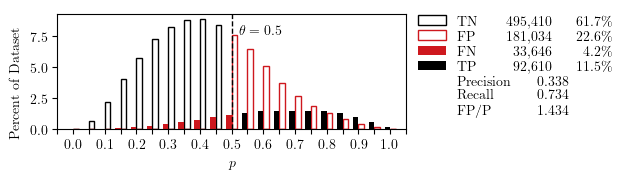


802700
802700
min =  0.0 , max =  1.0 , num_prec =  4
Plot_Prediction()
CRSS_05_BRFC_alpha_0_5_0_0_0_0_Hard
len(C), len(D), len(TN), len(FP), len(FN), len(TP)
676444 126256 588043 88401 55577 70679

len(TP_vc) =  21
../../Paper_07_14_24/Figures/CRSS_05_BRFC_alpha_0_5_0_0_0_0_Hard_Pred_Wide_Threshold_60


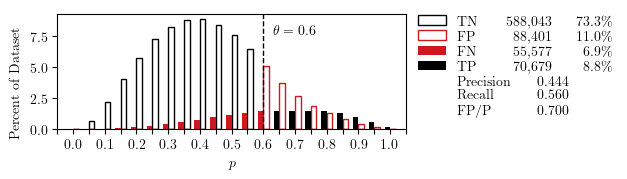


802700
802700
min =  0.0 , max =  1.0 , num_prec =  4
Plot_Prediction()
CRSS_05_BRFC_alpha_0_5_0_0_0_0_Hard
len(C), len(D), len(TN), len(FP), len(FN), len(TP)
676444 126256 639523 36921 78942 47314

len(TP_vc) =  21
../../Paper_07_14_24/Figures/CRSS_05_BRFC_alpha_0_5_0_0_0_0_Hard_Pred_Wide_Threshold_70


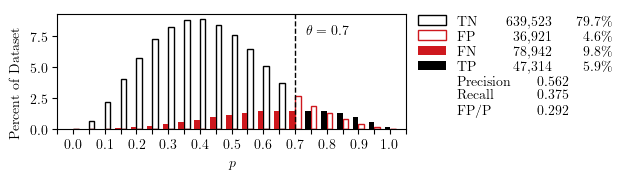


802700
802700
min =  0.0 , max =  1.0 , num_prec =  4
Plot_Prediction()
CRSS_05_BRFC_alpha_0_5_0_0_0_0_Hard
len(C), len(D), len(TN), len(FP), len(FN), len(TP)
676444 126256 665016 11428 102033 24223

len(TP_vc) =  21
../../Paper_07_14_24/Figures/CRSS_05_BRFC_alpha_0_5_0_0_0_0_Hard_Pred_Wide_Threshold_80


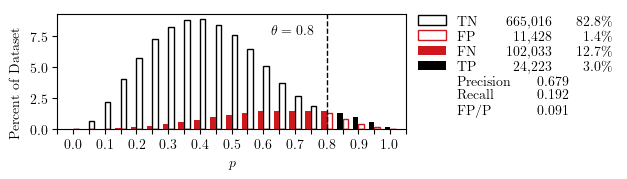


802700
802700
min =  0.0 , max =  1.0 , num_prec =  4
Plot_Prediction()
CRSS_05_BRFC_alpha_0_5_0_0_0_0_Hard
len(C), len(D), len(TN), len(FP), len(FN), len(TP)
676444 126256 674988 1456 120376 5880

len(TP_vc) =  21
../../Paper_07_14_24/Figures/CRSS_05_BRFC_alpha_0_5_0_0_0_0_Hard_Pred_Wide_Threshold_90


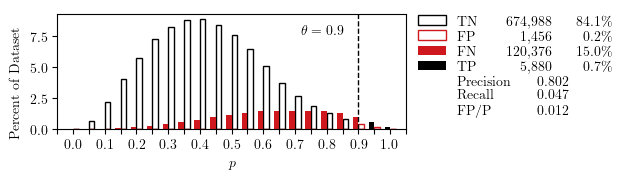

In [24]:
def Threshold_Illustrations(filename, threshold):

    """
    matplotlib.rcParams.update({
    #    "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,
        'font.size': 10,
    })
    """
    
    title = ''
    
    df = pd.read_csv('../../Big_Files/' + filename + '.csv')
    
    print (len(df))
    df.dropna(inplace=True)
    print (len(df))
            
    m = df['y_proba'].min()
    M = df['y_proba'].max()
    num_prec = 4 - int(math.log10(M-m))
    print ('min = ', m, ', max = ', M, ', num_prec = ', num_prec)

    y_test = df['y_test'].to_numpy()
    y_proba = df['y_proba'].to_numpy()
    y_pred = df['y_pred'].to_numpy()
    
    
    
    Plot_Prediction_Wide_Threshold(y_test, y_proba, threshold, filename, title)
    

for filename, threshold in [
    ['CRSS_05_BRFC_alpha_0_5_0_0_0_0_Hard', 0.5],
    ['CRSS_05_BRFC_alpha_0_5_0_0_0_0_Hard', 0.6],
    ['CRSS_05_BRFC_alpha_0_5_0_0_0_0_Hard', 0.7],
    ['CRSS_05_BRFC_alpha_0_5_0_0_0_0_Hard', 0.8],
    ['CRSS_05_BRFC_alpha_0_5_0_0_0_0_Hard', 0.9],
#    ['BRFC_alpha_0_5_Hard_Run_3', 0.86],
#    ['BRFC_alpha_0_5_Medium_Run_3', 0.89],
#    ['BRFC_alpha_0_5_Easy_Run_3', 0.8873],
#    ['KBFC_alpha_0_5_gamma_2_0_Hard_Run_3', 0.5446],
]:
    Threshold_Illustrations(filename, threshold)